# College Data Project, ML
### by Chelle Davies, Dec 2022-2023
The development and testing environment.

In [1]:
# import the libraries
import csv
import pandas as pd
import geopy
import folium
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import spacy # NLP Library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import classification_report
from sklearn.svm import SVR

#### List of Data Source Links:
1. https://www.kaggle.com/datasets/tunguz/college-majors
2. https://www.kaggle.com/code/tayyarhussain/economic-values-of-college-majors-data-analysis/data
3. https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their

In [2]:
# import data to be explored
myVars = vars() # for make vars for dataframes
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "ref_data/*.csv"))
# loop over the list of csv files
for f in csv_files:
    p = Path(f)
    vname = p.stem
    vname = vname.replace("-", "_")
    # read the csv file
    df = pd.read_csv(f)
    myVars[vname] = df
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    # print the content
    print('Content:')
    display(df)
    print("Column Types:")
    print(df.dtypes)
    print("\n")

Location: /Users/michelledavies/Documents/curri-app/ref_data/college_majors_dmgrph.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/college_majors_dmgrph.csv
Content:


Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering      0.1206           36   
1      679.0     77.0               Engineering      0.1019            7   
2      725.0    131.0               Engineering      0.1530            3   
3     1123.0    135.0               Engineering      0.1073           16   
4    21239.0  11021.0               Engineering      0.3416          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science      0.6373           47   
169    522.0   2332.0  Psychology & Social Work      0.8171            7   
170    568.0   2270.0  Psychology & Social Work      0.7999           13   
171    931.0   3695.0  Psychology & Social Work      0.7987           21   
172    134.0    964.0                 Education      0.8780            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0               0.0184  110000  95000  125000          1534               364   
1               0.1172   75000  55000   90000           350               257   
2               0.0241   73000  50000  105000           456               176   
3               0.0501   70000  43000   80000           529               102   
4               0.0611   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168             0.0463   26000  20000   39000          2771              2947   
169             0.0651   25000  24000   34000          1488               615   
170             0.1490   25000  25000   40000           986               870   
171             0.0536   23400  19200   26000          2403              1245   
172             0.1049   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

Column Types:
Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/college_majors.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/college_majors.csv
Content:


Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering      0.1206           36   
1      679.0     77.0               Engineering      0.1019            7   
2      725.0    131.0               Engineering      0.1530            3   
3     1123.0    135.0               Engineering      0.1073           16   
4    21239.0  11021.0               Engineering      0.3416          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science      0.6373           47   
169    522.0   2332.0  Psychology & Social Work      0.8171            7   
170    568.0   2270.0  Psychology & Social Work      0.7999           13   
171    931.0   3695.0  Psychology & Social Work      0.7987           21   
172    134.0    964.0                 Education      0.8780            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0               0.0184  110000  95000  125000          1534               364   
1               0.1172   75000  55000   90000           350               257   
2               0.0241   73000  50000  105000           456               176   
3               0.0501   70000  43000   80000           529               102   
4               0.0611   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168             0.0463   26000  20000   39000          2771              2947   
169             0.0651   25000  24000   34000          1488               615   
170             0.1490   25000  25000   40000           986               870   
171             0.0536   23400  19200   26000          2403              1245   
172             0.1049   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

Column Types:
Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/majors-list.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/majors-list.csv
Content:


FOD1P                                  Major  \
0    1100                    GENERAL AGRICULTURE   
1    1101  AGRICULTURE PRODUCTION AND MANAGEMENT   
2    1102                 AGRICULTURAL ECONOMICS   
3    1103                        ANIMAL SCIENCES   
4    1104                           FOOD SCIENCE   
..    ...                                    ...   
169  5504                              GEOGRAPHY   
170  5505                INTERNATIONAL RELATIONS   
171  5506       POLITICAL SCIENCE AND GOVERNMENT   
172  5507                              SOCIOLOGY   
173  5599          MISCELLANEOUS SOCIAL SCIENCES   

                      Major_Category  
0    Agriculture & Natural Resources  
1    Agriculture & Natural Resources  
2    Agriculture & Natural Resources  
3    Agriculture & Natural Resources  
4    Agriculture & Natural Resources  
..                               ...  
169                   Social Science  
170                   Social Science  
171                   Social Science  
172                   Social Science  
173                   Social Science  

[174 rows x 3 columns]

Column Types:
FOD1P             object
Major             object
Major_Category    object
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/all-ages.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/all-ages.csv
Content:


Major_code                                            Major  \
0          1100                              GENERAL AGRICULTURE   
1          1101            AGRICULTURE PRODUCTION AND MANAGEMENT   
2          1102                           AGRICULTURAL ECONOMICS   
3          1103                                  ANIMAL SCIENCES   
4          1104                                     FOOD SCIENCE   
..          ...                                              ...   
168        6211                           HOSPITALITY MANAGEMENT   
169        6212    MANAGEMENT INFORMATION SYSTEMS AND STATISTICS   
170        6299  MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION   
171        6402                                          HISTORY   
172        6403                            UNITED STATES HISTORY   

                      Major_category   Total  Employed  \
0    Agriculture & Natural Resources  128148     90245   
1    Agriculture & Natural Resources   95326     76865   
2    Agriculture & Natural Resources   33955     26321   
3    Agriculture & Natural Resources  103549     81177   
4    Agriculture & Natural Resources   24280     17281   
..                               ...     ...       ...   
168                         Business  200854    163393   
169                         Business  156673    134478   
170                         Business  102753     77471   
171        Humanities & Liberal Arts  712509    478416   
172        Humanities & Liberal Arts   17746     11887   

     Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                            74078        2423           0.026147   50000   
1                            64240        2266           0.028636   54000   
2                            22810         821           0.030248   63000   
3                            64937        3619           0.042679   46000   
4                            12722         894           0.049188   62000   
..                             ...         ...                ...     ...   
168                         122499        8862           0.051447   49000   
169                         118249        6186           0.043977   72000   
170                          61603        4308           0.052679   53000   
171                         354163       33725           0.065851   50000   
172                           8204         943           0.073500   50000   

     P25th     P75th  
0    34000   80000.0  
1    36000   80000.0  
2    40000   98000.0  
3    30000   72000.0  
4    38500   90000.0  
..     ...       ...  
168  33000   70000.0  
169  50000  100000.0  
170  36000   83000.0  
171  35000   80000.0  
172  39000   81000.0  

[173 rows x 11 columns]

Column Types:
Major_code                         int64
Major                             object
Major_category                    object
Total                              int64
Employed                           int64
Employed_full_time_year_round      int64
Unemployed                         int64
Unemployment_rate                float64
Median                             int64
P25th                              int64
P75th                            float64
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/women-stem.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/women-stem.csv
Content:


Rank  Major_code                                          Major  \
0      1        2419                          PETROLEUM ENGINEERING   
1      2        2416                 MINING AND MINERAL ENGINEERING   
2      3        2415                      METALLURGICAL ENGINEERING   
3      4        2417      NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4      5        2418                            NUCLEAR ENGINEERING   
..   ...         ...                                            ...   
71    72        3604                                        ECOLOGY   
72    73        6109                  TREATMENT THERAPY PROFESSIONS   
73    74        6100            GENERAL MEDICAL AND HEALTH SERVICES   
74    75        6102  COMMUNICATION DISORDERS SCIENCES AND SERVICES   
75    76        3609                                        ZOOLOGY   

            Major_category  Total    Men  Women  ShareWomen  Median  
0              Engineering   2339   2057    282    0.120564  110000  
1              Engineering    756    679     77    0.101852   75000  
2              Engineering    856    725    131    0.153037   73000  
3              Engineering   1258   1123    135    0.107313   70000  
4              Engineering   2573   2200    373    0.144967   65000  
..                     ...    ...    ...    ...         ...     ...  
71  Biology & Life Science   9154   3878   5276    0.576360   33000  
72                  Health  48491  13487  35004    0.721866   33000  
73                  Health  33599   7574  26025    0.774577   32400  
74                  Health  38279   1225  37054    0.967998   28000  
75  Biology & Life Science   8409   3050   5359    0.637293   26000  

[76 rows x 9 columns]

Column Types:
Rank                int64
Major_code          int64
Major              object
Major_category     object
Total               int64
Men                 int64
Women               int64
ShareWomen        float64
Median              int64
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/recent-grads.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/recent-grads.csv
Content:


Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering    0.120564           36   
1      679.0     77.0               Engineering    0.101852            7   
2      725.0    131.0               Engineering    0.153037            3   
3     1123.0    135.0               Engineering    0.107313           16   
4    21239.0  11021.0               Engineering    0.341631          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science    0.637293           47   
169    522.0   2332.0  Psychology & Social Work    0.817099            7   
170    568.0   2270.0  Psychology & Social Work    0.799859           13   
171    931.0   3695.0  Psychology & Social Work    0.798746           21   
172    134.0    964.0                 Education    0.877960            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0             0.018381  110000  95000  125000          1534               364   
1             0.117241   75000  55000   90000           350               257   
2             0.024096   73000  50000  105000           456               176   
3             0.050125   70000  43000   80000           529               102   
4             0.061098   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168           0.046320   26000  20000   39000          2771              2947   
169           0.065112   25000  24000   34000          1488               615   
170           0.149048   25000  25000   40000           986               870   
171           0.053621   23400  19200   26000          2403              1245   
172           0.104946   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

Column Types:
Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/grad-students.csv
File Name: /Users/michelledavies/Documents/curri-app/ref_data/grad-students.csv
Content:


Major_code                                       Major  \
0          5601                       CONSTRUCTION SERVICES   
1          6004           COMMERCIAL ART AND GRAPHIC DESIGN   
2          6211                      HOSPITALITY MANAGEMENT   
3          2201      COSMETOLOGY SERVICES AND CULINARY ARTS   
4          2001                  COMMUNICATION TECHNOLOGIES   
..          ...                                         ...   
168        5203                       COUNSELING PSYCHOLOGY   
169        5202                         CLINICAL PSYCHOLOGY   
170        6106     HEALTH AND MEDICAL PREPARATORY PROGRAMS   
171        2303                   SCHOOL STUDENT COUNSELING   
172        2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION   

                          Major_category  Grad_total  Grad_sample_size  \
0    Industrial Arts & Consumer Services        9173               200   
1                                   Arts       53864               882   
2                               Business       24417               437   
3    Industrial Arts & Consumer Services        5411                72   
4                Computers & Mathematics        9109               171   
..                                   ...         ...               ...   
168             Psychology & Social Work       51812               724   
169             Psychology & Social Work       22716               355   
170                               Health      114971              1766   
171                            Education       19841               260   
172                            Education       54159               841   

     Grad_employed  Grad_full_time_year_round  Grad_unemployed  \
0             7098                       6511              681   
1            40492                      29553             2482   
2            18368                      14784             1465   
3             3590                       2701              316   
4             7512                       5622              466   
..             ...                        ...              ...   
168          38468                      28808             1420   
169          16612                      12022              782   
170          78132                      58825             1732   
171          11313                       8130              613   
172          34142                      26850              582   

     Grad_unemployment_rate  Grad_median  ...  Nongrad_total  \
0                  0.087543      75000.0  ...          86062   
1                  0.057756      60000.0  ...         461977   
2                  0.073867      65000.0  ...         179335   
3                  0.080901      47000.0  ...          37575   
4                  0.058411      57000.0  ...          53819   
..                      ...          ...  ...            ...   
168                0.035600      50000.0  ...          16781   
169                0.044958      70000.0  ...           6519   
170                0.021687     135000.0  ...          26320   
171                0.051400      56000.0  ...           2232   
172                0.016761      65000.0  ...           4003   

     Nongrad_employed  Nongrad_full_time_year_round  Nongrad_unemployed  \
0               73607                         62435                3928   
1              347166                        250596               25484   
2              145597                        113579                7409   
3               29738                         23249                1661   
4               43163                         34231                3389   
..                ...                           ...                 ...   
168             12377                          8502                 835   
169              4368                          3033                 357   
170             16221                         12185                1012   
171              1328                          

Column Types:
Major_code                        int64
Major                            object
Major_category                   object
Grad_total                        int64
Grad_sample_size                  int64
Grad_employed                     int64
Grad_full_time_year_round         int64
Grad_unemployed                   int64
Grad_unemployment_rate          float64
Grad_median                     float64
Grad_P25                          int64
Grad_P75                        float64
Nongrad_total                     int64
Nongrad_employed                  int64
Nongrad_full_time_year_round      int64
Nongrad_unemployed                int64
Nongrad_unemployment_rate       float64
Nongrad_median                  float64
Nongrad_P25                       int64
Nongrad_P75                     float64
Grad_share                      float64
Grad_premium                    float64
dtype: object


Location: /Users/michelledavies/Documents/curri-app/ref_data/students_data.csv
File Name: 

ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
0    1141     A    male     1  73.47       64         81         87   
1    1142     A  female     1  71.22       57         50         51   
2    1143     A  female     2  74.56       47         48         71   
3    1144     A  female     1  72.89       46         72         38   
4    1145     A  female     1  70.11       49         45         63   
..    ...   ...     ...   ...    ...      ...        ...        ...   
100  1241     A  female     1  88.34       87         83         92   
101  1242     B    male     1  89.84       98         77         95   
102  1243     B    male     1  88.82       83         80         91   
103  1244     A    male     1  86.60       92         82         91   
104  1245     A    male     1  93.71       93         97         99   

     Statistics  Probability  Measure  Functional_analysis from1 from2 from3  \
0            60           74       71                   60     A     A     A   
1            51           55       62                   61     B     A     A   
2            60           61       68                   64     C     A     A   
3            60           29       54                   51     D     A     A   
4            60           66       66                   61     E     A     A   
..          ...          ...      ...                  ...   ...   ...   ...   
100          98           93       86                   90     M     B     A   
101          98           96       88                  100     A     B     A   
102          98           93       95                   71     T     B     A   
103          99           94       82                   78     S     B     A   
104         100           97       90                   90     K     B     A   

     from4  y  
0        3  0  
1        2  0  
2        0  1  
3        0  0  
4        0  0  
..     ... ..  
100      0  1  
101      0  1  
102      0  2  
103      0  2  
104      0  2  

[105 rows x 17 columns]

Column Types:
ID                       int64
class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object




In [3]:
# list var names
v = list(myVars.keys())
variables_list = v[v.index('college_majors_dmgrph'):v.index('grad_students')+1]
print("The variables are: \n {}".format(v))
print("The variables I want are: \n {}".format(variables_list))

The variables are: 
 ['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'csv', 'pd', 'geopy', 'folium', 'np', 'os', 'Path', 'glob', 'plt', 'sns', 'WordCloud', 'STOPWORDS', 'ImageColorGenerator', 'train_test_split', 'PassiveAggressiveRegressor', 'spacy', 'cross_val_score', 'StratifiedKFold', 'classification_report', 'confusion_matrix', 'accuracy_score', 'LogisticRegression', 'LinearRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis', 'GaussianNB', 'SVC', 'KFold', 'ClassificationModel', 'MultiOutputClassifier', 'MultiOutputRegressor', 'SVR', '_i2', 'myVars', 'path', 'csv_files', 'f', 'p', 'vname', 'df', 'college_majors_dmgrph', 'college_majors', 'majors_list', 'all_ages', 'women_stem', 'recent_grads', 'grad_students', 'students_data', '_i3']
The variables I want are: 
 ['college_majors_dmgrph', 

### Data Exploration
I want to look for some patterns in the dataset that will allow me to build a foundation for my model.

#### List of Analysis to Perform:
1. Word cloud on major names
2. Demographics per major category (pie chart, histograms, bar graphs)
3. Demographics per major code
4. Rank distribution by category

In [4]:
# First, I'm checking for nulls
print("grad_students Nulls:")
print(grad_students.isnull().sum(), "\n")
print("recent_grads Nulls:")
print(recent_grads.isnull().sum(), "\n")
print("women_stem Nulls:")
print(women_stem.isnull().sum(), "\n")
print("all_ages Nulls:")
print(all_ages.isnull().sum(), "\n")
print("majors_list Nulls:")
print(majors_list.isnull().sum(), "\n")
print("college_majors Nulls:")
print(college_majors.isnull().sum(), "\n")
print("college_majors_dmgrph Nulls:")
print(college_majors_dmgrph.isnull().sum())

grad_students Nulls:
Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64 

recent_grads Nulls:
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen    

For the nulls, they seem to be connected to demographic information. I'm going to change the NaNs so that I can note it without throwing the record out or getting an error.

In [5]:
# replace nans
values = {"Men":0, "Women":0, "Major_Category":"Other", "ShareWomen":0, "Total":0} # assuming the total that is NaN is the row where the Men and Wome counts are not available
grad_students = grad_students.fillna(value=values)
recent_grads = recent_grads.fillna(value=values)
women_stem = women_stem.fillna(value=values)
all_ages = all_ages.fillna(value=values)
majors_list = majors_list.fillna(value=values)
college_majors = college_majors.fillna(value=values)
college_majors_dmgrph = college_majors_dmgrph.fillna(value=values)

In [6]:
# confirm changes
display(grad_students)
print("grad_students Nulls:")
print(grad_students.isnull().sum(), "\n")
display(recent_grads)
print("recent_grads Nulls:")
print(recent_grads.isnull().sum(), "\n")
display(women_stem)
print("women_stem Nulls:")
print(women_stem.isnull().sum(), "\n")
display(all_ages)
print("all_ages Nulls:")
print(all_ages.isnull().sum(), "\n")
display(majors_list)
print("majors_list Nulls:")
print(majors_list.isnull().sum(), "\n")
display(college_majors)
print("college_majors Nulls:")
print(college_majors.isnull().sum(), "\n")
display(college_majors_dmgrph)
print("college_majors_dmgrph Nulls:")
print(college_majors_dmgrph.isnull().sum())

Major_code                                       Major  \
0          5601                       CONSTRUCTION SERVICES   
1          6004           COMMERCIAL ART AND GRAPHIC DESIGN   
2          6211                      HOSPITALITY MANAGEMENT   
3          2201      COSMETOLOGY SERVICES AND CULINARY ARTS   
4          2001                  COMMUNICATION TECHNOLOGIES   
..          ...                                         ...   
168        5203                       COUNSELING PSYCHOLOGY   
169        5202                         CLINICAL PSYCHOLOGY   
170        6106     HEALTH AND MEDICAL PREPARATORY PROGRAMS   
171        2303                   SCHOOL STUDENT COUNSELING   
172        2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION   

                          Major_category  Grad_total  Grad_sample_size  \
0    Industrial Arts & Consumer Services        9173               200   
1                                   Arts       53864               882   
2                               Business       24417               437   
3    Industrial Arts & Consumer Services        5411                72   
4                Computers & Mathematics        9109               171   
..                                   ...         ...               ...   
168             Psychology & Social Work       51812               724   
169             Psychology & Social Work       22716               355   
170                               Health      114971              1766   
171                            Education       19841               260   
172                            Education       54159               841   

     Grad_employed  Grad_full_time_year_round  Grad_unemployed  \
0             7098                       6511              681   
1            40492                      29553             2482   
2            18368                      14784             1465   
3             3590                       2701              316   
4             7512                       5622              466   
..             ...                        ...              ...   
168          38468                      28808             1420   
169          16612                      12022              782   
170          78132                      58825             1732   
171          11313                       8130              613   
172          34142                      26850              582   

     Grad_unemployment_rate  Grad_median  ...  Nongrad_total  \
0                  0.087543      75000.0  ...          86062   
1                  0.057756      60000.0  ...         461977   
2                  0.073867      65000.0  ...         179335   
3                  0.080901      47000.0  ...          37575   
4                  0.058411      57000.0  ...          53819   
..                      ...          ...  ...            ...   
168                0.035600      50000.0  ...          16781   
169                0.044958      70000.0  ...           6519   
170                0.021687     135000.0  ...          26320   
171                0.051400      56000.0  ...           2232   
172                0.016761      65000.0  ...           4003   

     Nongrad_employed  Nongrad_full_time_year_round  Nongrad_unemployed  \
0               73607                         62435                3928   
1              347166                        250596               25484   
2              145597                        113579                7409   
3               29738                         23249                1661   
4               43163                         34231                3389   
..                ...                           ...                 ...   
168             12377                          8502                 835   
169              4368                          3033                 357   
170             16221                         12185                1012   
171              1328                          

grad_students Nulls:
Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64 



Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering    0.120564           36   
1      679.0     77.0               Engineering    0.101852            7   
2      725.0    131.0               Engineering    0.153037            3   
3     1123.0    135.0               Engineering    0.107313           16   
4    21239.0  11021.0               Engineering    0.341631          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science    0.637293           47   
169    522.0   2332.0  Psychology & Social Work    0.817099            7   
170    568.0   2270.0  Psychology & Social Work    0.799859           13   
171    931.0   3695.0  Psychology & Social Work    0.798746           21   
172    134.0    964.0                 Education    0.877960            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0             0.018381  110000  95000  125000          1534               364   
1             0.117241   75000  55000   90000           350               257   
2             0.024096   73000  50000  105000           456               176   
3             0.050125   70000  43000   80000           529               102   
4             0.061098   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168           0.046320   26000  20000   39000          2771              2947   
169           0.065112   25000  24000   34000          1488               615   
170           0.149048   25000  25000   40000           986               870   
171           0.053621   23400  19200   26000          2403              1245   
172           0.104946   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

recent_grads Nulls:
Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64 



Rank  Major_code                                          Major  \
0      1        2419                          PETROLEUM ENGINEERING   
1      2        2416                 MINING AND MINERAL ENGINEERING   
2      3        2415                      METALLURGICAL ENGINEERING   
3      4        2417      NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4      5        2418                            NUCLEAR ENGINEERING   
..   ...         ...                                            ...   
71    72        3604                                        ECOLOGY   
72    73        6109                  TREATMENT THERAPY PROFESSIONS   
73    74        6100            GENERAL MEDICAL AND HEALTH SERVICES   
74    75        6102  COMMUNICATION DISORDERS SCIENCES AND SERVICES   
75    76        3609                                        ZOOLOGY   

            Major_category  Total    Men  Women  ShareWomen  Median  
0              Engineering   2339   2057    282    0.120564  110000  
1              Engineering    756    679     77    0.101852   75000  
2              Engineering    856    725    131    0.153037   73000  
3              Engineering   1258   1123    135    0.107313   70000  
4              Engineering   2573   2200    373    0.144967   65000  
..                     ...    ...    ...    ...         ...     ...  
71  Biology & Life Science   9154   3878   5276    0.576360   33000  
72                  Health  48491  13487  35004    0.721866   33000  
73                  Health  33599   7574  26025    0.774577   32400  
74                  Health  38279   1225  37054    0.967998   28000  
75  Biology & Life Science   8409   3050   5359    0.637293   26000  

[76 rows x 9 columns]

women_stem Nulls:
Rank              0
Major_code        0
Major             0
Major_category    0
Total             0
Men               0
Women             0
ShareWomen        0
Median            0
dtype: int64 



Major_code                                            Major  \
0          1100                              GENERAL AGRICULTURE   
1          1101            AGRICULTURE PRODUCTION AND MANAGEMENT   
2          1102                           AGRICULTURAL ECONOMICS   
3          1103                                  ANIMAL SCIENCES   
4          1104                                     FOOD SCIENCE   
..          ...                                              ...   
168        6211                           HOSPITALITY MANAGEMENT   
169        6212    MANAGEMENT INFORMATION SYSTEMS AND STATISTICS   
170        6299  MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION   
171        6402                                          HISTORY   
172        6403                            UNITED STATES HISTORY   

                      Major_category   Total  Employed  \
0    Agriculture & Natural Resources  128148     90245   
1    Agriculture & Natural Resources   95326     76865   
2    Agriculture & Natural Resources   33955     26321   
3    Agriculture & Natural Resources  103549     81177   
4    Agriculture & Natural Resources   24280     17281   
..                               ...     ...       ...   
168                         Business  200854    163393   
169                         Business  156673    134478   
170                         Business  102753     77471   
171        Humanities & Liberal Arts  712509    478416   
172        Humanities & Liberal Arts   17746     11887   

     Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                            74078        2423           0.026147   50000   
1                            64240        2266           0.028636   54000   
2                            22810         821           0.030248   63000   
3                            64937        3619           0.042679   46000   
4                            12722         894           0.049188   62000   
..                             ...         ...                ...     ...   
168                         122499        8862           0.051447   49000   
169                         118249        6186           0.043977   72000   
170                          61603        4308           0.052679   53000   
171                         354163       33725           0.065851   50000   
172                           8204         943           0.073500   50000   

     P25th     P75th  
0    34000   80000.0  
1    36000   80000.0  
2    40000   98000.0  
3    30000   72000.0  
4    38500   90000.0  
..     ...       ...  
168  33000   70000.0  
169  50000  100000.0  
170  36000   83000.0  
171  35000   80000.0  
172  39000   81000.0  

[173 rows x 11 columns]

all_ages Nulls:
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64 



FOD1P                                  Major  \
0    1100                    GENERAL AGRICULTURE   
1    1101  AGRICULTURE PRODUCTION AND MANAGEMENT   
2    1102                 AGRICULTURAL ECONOMICS   
3    1103                        ANIMAL SCIENCES   
4    1104                           FOOD SCIENCE   
..    ...                                    ...   
169  5504                              GEOGRAPHY   
170  5505                INTERNATIONAL RELATIONS   
171  5506       POLITICAL SCIENCE AND GOVERNMENT   
172  5507                              SOCIOLOGY   
173  5599          MISCELLANEOUS SOCIAL SCIENCES   

                      Major_Category  
0    Agriculture & Natural Resources  
1    Agriculture & Natural Resources  
2    Agriculture & Natural Resources  
3    Agriculture & Natural Resources  
4    Agriculture & Natural Resources  
..                               ...  
169                   Social Science  
170                   Social Science  
171                   Social Science  
172                   Social Science  
173                   Social Science  

[174 rows x 3 columns]

majors_list Nulls:
FOD1P             0
Major             0
Major_Category    0
dtype: int64 



Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering      0.1206           36   
1      679.0     77.0               Engineering      0.1019            7   
2      725.0    131.0               Engineering      0.1530            3   
3     1123.0    135.0               Engineering      0.1073           16   
4    21239.0  11021.0               Engineering      0.3416          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science      0.6373           47   
169    522.0   2332.0  Psychology & Social Work      0.8171            7   
170    568.0   2270.0  Psychology & Social Work      0.7999           13   
171    931.0   3695.0  Psychology & Social Work      0.7987           21   
172    134.0    964.0                 Education      0.8780            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0               0.0184  110000  95000  125000          1534               364   
1               0.1172   75000  55000   90000           350               257   
2               0.0241   73000  50000  105000           456               176   
3               0.0501   70000  43000   80000           529               102   
4               0.0611   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168             0.0463   26000  20000   39000          2771              2947   
169             0.0651   25000  24000   34000          1488               615   
170             0.1490   25000  25000   40000           986               870   
171             0.0536   23400  19200   26000          2403              1245   
172             0.1049   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

college_majors Nulls:
Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64 



Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_category  ShareWomen  Sample_size  \
0     2057.0    282.0               Engineering      0.1206           36   
1      679.0     77.0               Engineering      0.1019            7   
2      725.0    131.0               Engineering      0.1530            3   
3     1123.0    135.0               Engineering      0.1073           16   
4    21239.0  11021.0               Engineering      0.3416          289   
..       ...      ...                       ...         ...          ...   
168   3050.0   5359.0    Biology & Life Science      0.6373           47   
169    522.0   2332.0  Psychology & Social Work      0.8171            7   
170    568.0   2270.0  Psychology & Social Work      0.7999           13   
171    931.0   3695.0  Psychology & Social Work      0.7987           21   
172    134.0    964.0                 Education      0.8780            2   

     Employed  ...  Part_time  Full_time_year_round  Unemployed  \
0        1976  ...        270                  1207          37   
1         640  ...        170                   388          85   
2         648  ...        133                   340          16   
3         758  ...        150                   692          40   
4       25694  ...       5180                 16697        1672   
..        ...  ...        ...                   ...         ...   
168      6259  ...       2190                  3602         304   
169      2125  ...        572                  1211         148   
170      2101  ...        648                  1293         368   
171      3777  ...        965                  2738         214   
172       742  ...        237                   410          87   

     Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0               0.0184  110000  95000  125000          1534               364   
1               0.1172   75000  55000   90000           350               257   
2               0.0241   73000  50000  105000           456               176   
3               0.0501   70000  43000   80000           529               102   
4               0.0611   65000  50000   75000         18314              4440   
..                 ...     ...    ...     ...           ...               ...   
168             0.0463   26000  20000   39000          2771              2947   
169             0.0651   25000  24000   34000          1488               615   
170             0.1490   25000  25000   40000           986               870   
171             0.0536   23400  19200   26000          2403              1245   
172             0.1049   22000  20000   22000           288               338   

     Low_wage_jobs  
0              193  
1               50  
2                0  
3                0  
4              972  
..             ...  
168            743  
169             82  
170            622  
171            308  
172            192  

[173 rows x 21 columns]

college_majors_dmgrph Nulls:
Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


#### Word Cloud - Major Names

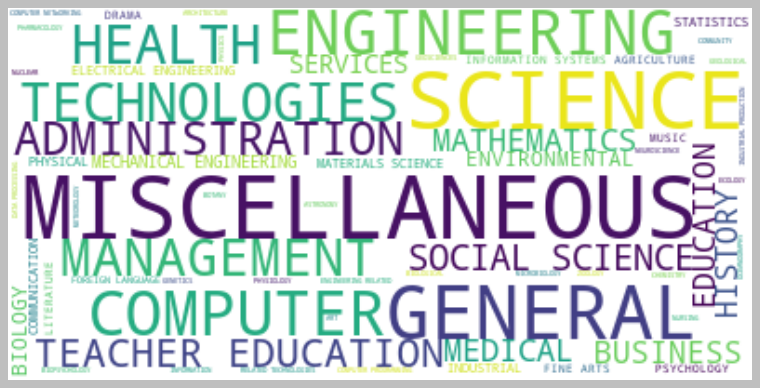

In [7]:
# wordcloud of the Major name column to look at the most common majors in the dataset
## first, i need to get the majors together in a series / list
majors = grad_students["Major"].tolist() + recent_grads["Major"].tolist() + women_stem["Major"].tolist() + all_ages["Major"].tolist() + majors_list["Major"].tolist() + college_majors["Major"].tolist() + college_majors_dmgrph["Major"].tolist()
## now, I can build the cloud
text = " ".join(i for i in majors) 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

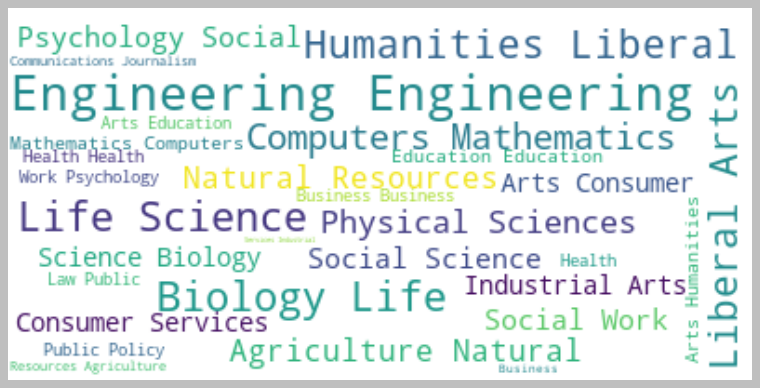

In [8]:
# wordcloud of the Major category name column to look at the most common types in the dataset
## first, i need to get the majors together in a series / list
majors = grad_students["Major_category"].tolist() + recent_grads["Major_category"].tolist() + women_stem["Major_category"].tolist() + all_ages["Major_category"].tolist() + majors_list["Major_Category"].tolist() + college_majors["Major_category"].tolist() + college_majors_dmgrph["Major_category"].tolist()
## now, I can build the cloud
text = " ".join(i for i in majors) 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Demographics by Major Category

In [9]:
college_majors_dmgrph.drop(["Major_code", "Rank"], axis=1).describe()

Total            Men          Women  ShareWomen  Sample_size  \
count     173.000000     173.000000     173.000000  173.000000   173.000000   
mean    39142.508671   16626.739884   22515.768786    0.519205   356.080925   
std     63369.409510   28069.374395   40973.996360    0.233924   618.361022   
min         0.000000       0.000000       0.000000    0.000000     2.000000   
25%      4321.000000    2110.000000    1761.000000    0.325100    39.000000   
50%     15058.000000    5347.000000    8284.000000    0.532300   130.000000   
75%     38844.000000   14440.000000   22456.000000    0.702000   338.000000   
max    393735.000000  173809.000000  307087.000000    0.969000  4212.000000   

            Employed      Full_time      Part_time  Full_time_year_round  \
count     173.000000     173.000000     173.000000            173.000000   
mean    31192.763006   26029.306358    8832.398844          19694.427746   
std     50675.002241   42869.655092   14648.179473          33160.941514   
min         0.000000     111.000000       0.000000            111.000000   
25%      3608.000000    3154.000000    1030.000000           2453.000000   
50%     11797.000000   10048.000000    3299.000000           7413.000000   
75%     31433.000000   25147.000000    9948.000000          16891.000000   
max    307933.000000  251540.000000  115172.000000         199897.000000   

         Unemployed  Unemployment_rate         Median         P25th  \
count    173.000000         173.000000     173.000000    173.000000   
mean    2416.329480           0.068190   40151.445087  29501.445087   
std     4112.803148           0.030329   11470.181802   9166.005235   
min        0.000000           0.000000   22000.000000  18500.000000   
25%      304.000000           0.050300   33000.000000  24000.000000   
50%      893.000000           0.068000   36000.000000  27000.000000   
75%     2393.000000           0.087600   45000.000000  33000.000000   
max    28169.000000           0.177200  110000.000000  95000.000000   

               P75th   College_jobs  Non_college_jobs  Low_wage_jobs  
count     173.000000     173.000000        173.000000     173.000000  
mean    51494.219653   12322.635838      13284.497110    3859.017341  
std     14906.279740   21299.868863      23789.655363    6944.998579  
min     22000.000000       0.000000          0.000000       0.000000  
25%     42000.000000    1675.000000       1591.000000     340.000000  
50%     47000.000000    4390.000000       4595.000000    1231.000000  
75%     60000.000000   14444.000000      11783.000000    3466.000000  
max    125000.000000  151643.000000     148395.000000   48207.000000

{'Communications & Journalism', 'Agriculture & Natural Resources', 'Humanities & Liberal Arts', 'Law & Public Policy', 'Business', 'Physical Sciences', 'Arts', 'Biology & Life Science', 'Psychology & Social Work', 'Social Science', 'Engineering', 'Industrial Arts & Consumer Services', 'Computers & Mathematics', 'Interdisciplinary', 'Education', 'Health'}


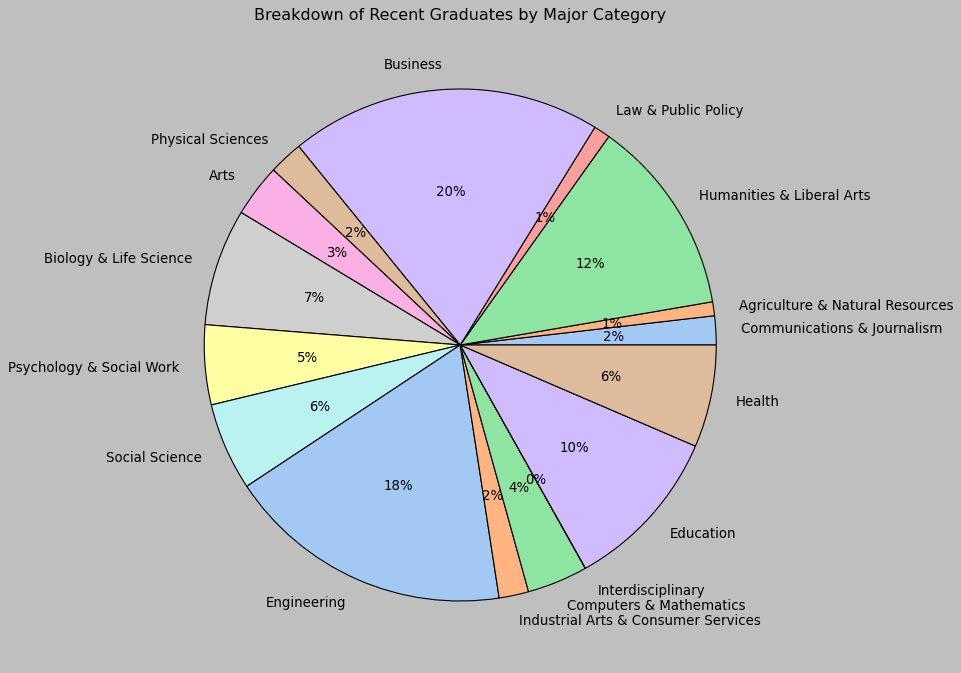

In [10]:
# distribution of major categories, recent grads
plt.figure(figsize=(16, 10))
m_categories_rg = set(recent_grads["Major_category"])
print(m_categories_rg)
tallies_rg = {}
for category in m_categories_rg:
    v = recent_grads['Major_category'].loc[recent_grads['Major_category'] == category].count() * recent_grads['Total'].loc[recent_grads['Major_category'] == category].sum()
    tallies_rg[category] = v

labels = list(m_categories_rg)
values = list(tallies_rg.values())
colors = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('Breakdown of Recent Graduates by Major Category')
plt.show()

{'Communications & Journalism', 'Agriculture & Natural Resources', 'Humanities & Liberal Arts', 'Law & Public Policy', 'Business', 'Physical Sciences', 'Arts', 'Biology & Life Science', 'Psychology & Social Work', 'Social Science', 'Engineering', 'Industrial Arts & Consumer Services', 'Computers & Mathematics', 'Interdisciplinary', 'Education', 'Health'}


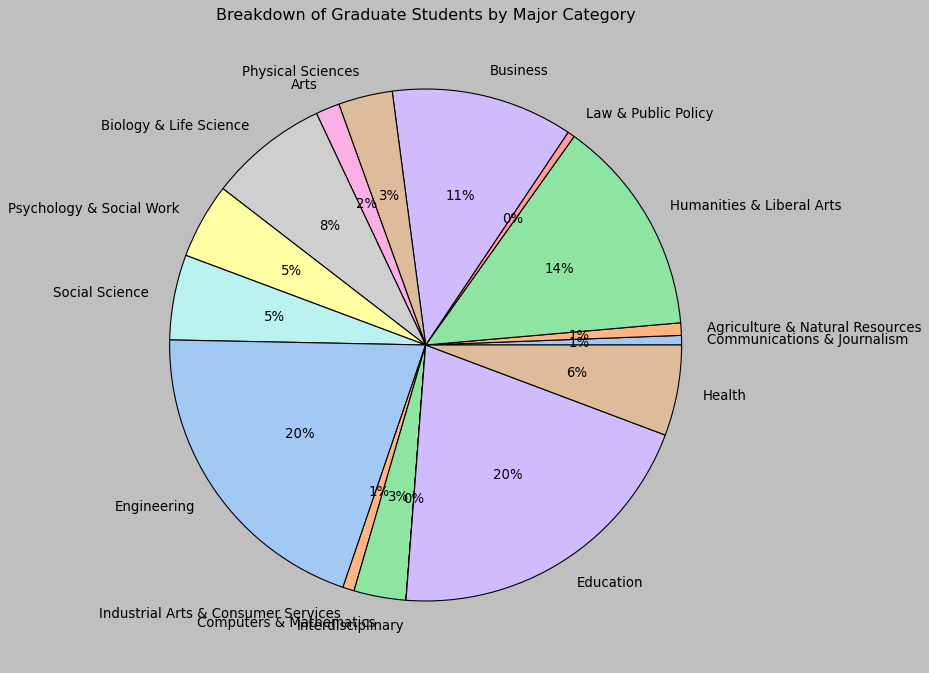

In [11]:
# distribution of major categories, grad students
plt.figure(figsize=(16, 10))
m_categories_gs = set(grad_students["Major_category"])
print(m_categories_gs)
tallies_gs = {}
for category in m_categories_gs:
    v = grad_students['Major_category'].loc[grad_students['Major_category'] == category].count() * grad_students['Grad_total'].loc[grad_students['Major_category'] == category].sum()
    tallies_gs[category] = v

labels = list(m_categories_gs)
values = list(tallies_gs.values())
colors = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('Breakdown of Graduate Students by Major Category')
plt.show()

{'Communications & Journalism', 'Agriculture & Natural Resources', 'Humanities & Liberal Arts', 'Law & Public Policy', 'Business', 'Physical Sciences', 'Arts', 'Biology & Life Science', 'Psychology & Social Work', 'Social Science', 'Engineering', 'Industrial Arts & Consumer Services', 'Computers & Mathematics', 'Interdisciplinary', 'Education', 'Health'}


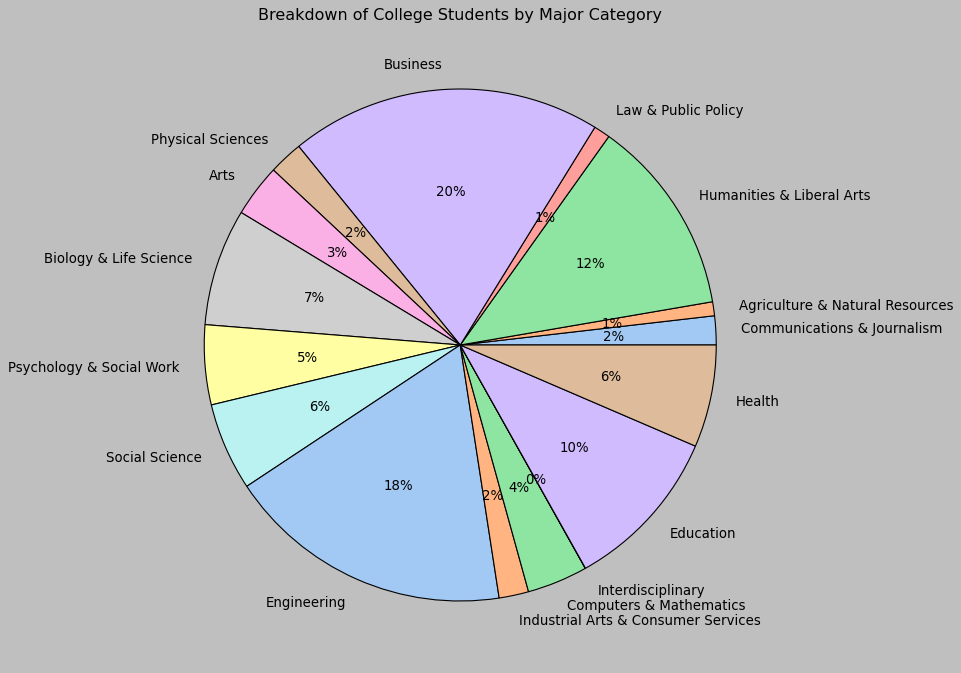

In [12]:
# distribution of major categories, college students
plt.figure(figsize=(16, 10))
m_categories_c = set(college_majors["Major_category"])
print(m_categories_c)
tallies_c = {}
for category in m_categories_c:
    v = college_majors['Major_category'].loc[college_majors['Major_category'] == category].count() * college_majors['Total'].loc[college_majors['Major_category'] == category].sum()
    tallies_gs[category] = v
    tallies_c[category] = v

labels = list(m_categories_c)
values = list(tallies_c.values())
colors = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors = colors, autopct='%.0f%%')
plt.title('Breakdown of College Students by Major Category')
plt.show()

The breakdown seems to vary a bit by population, as expected.

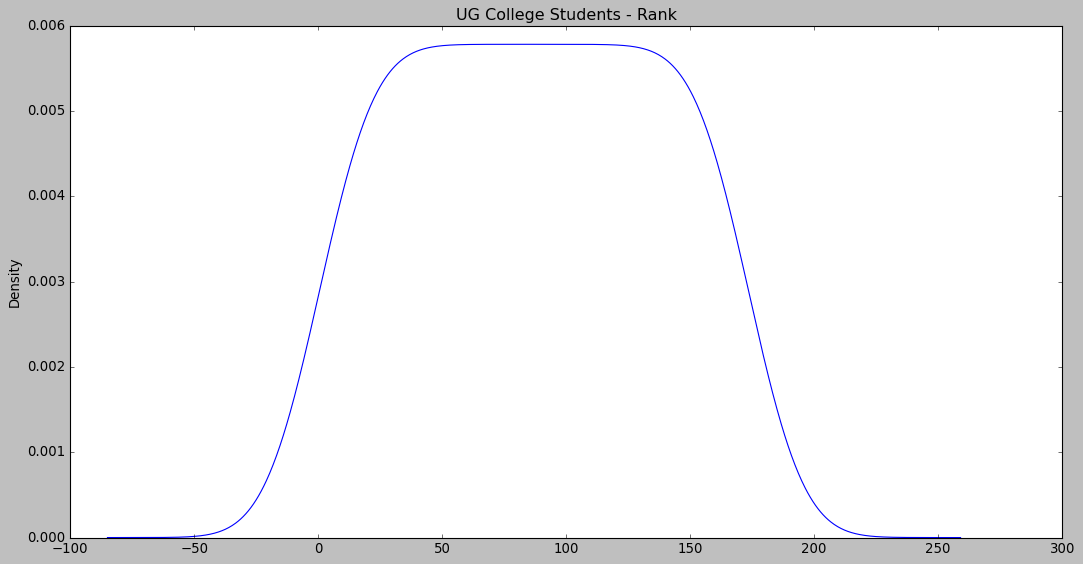

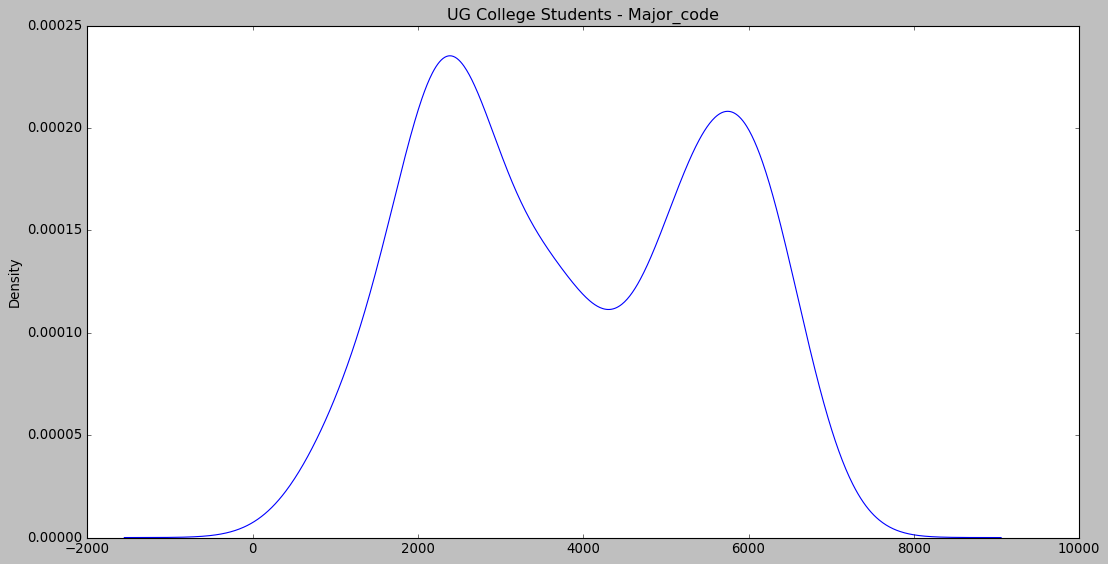

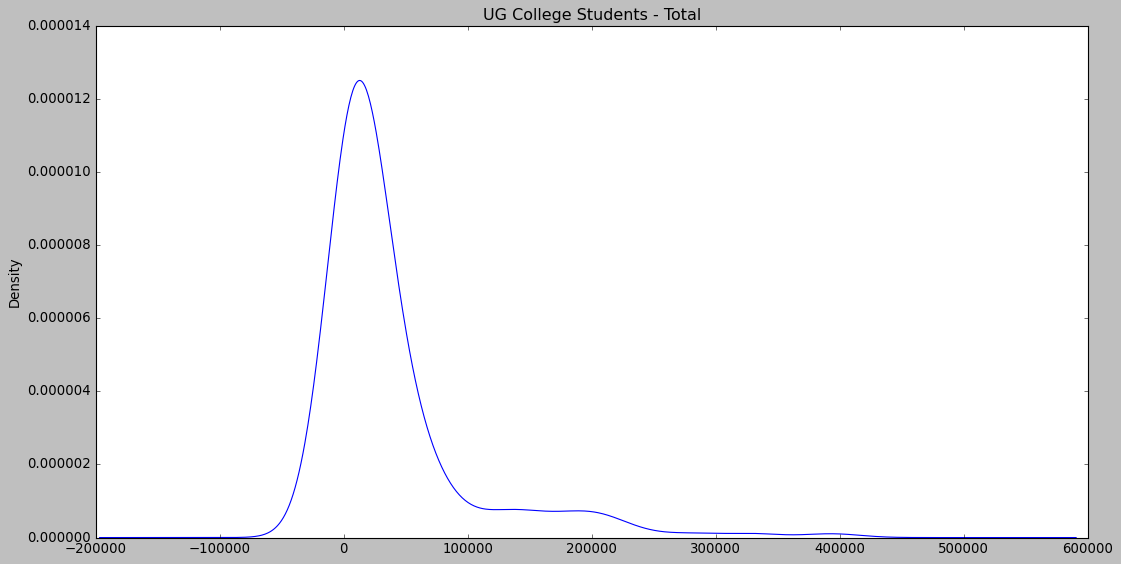

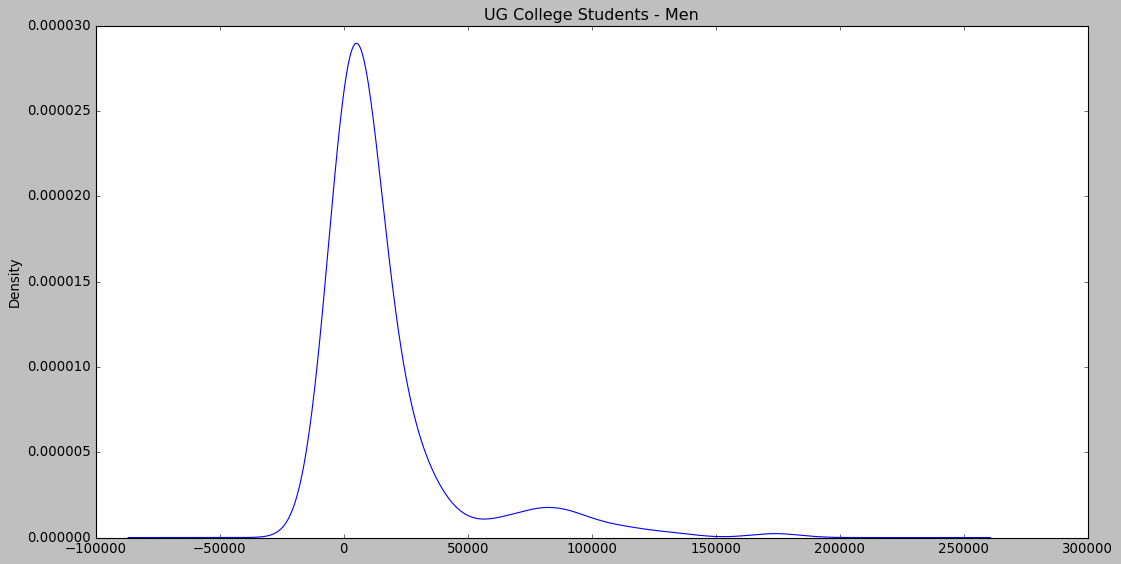

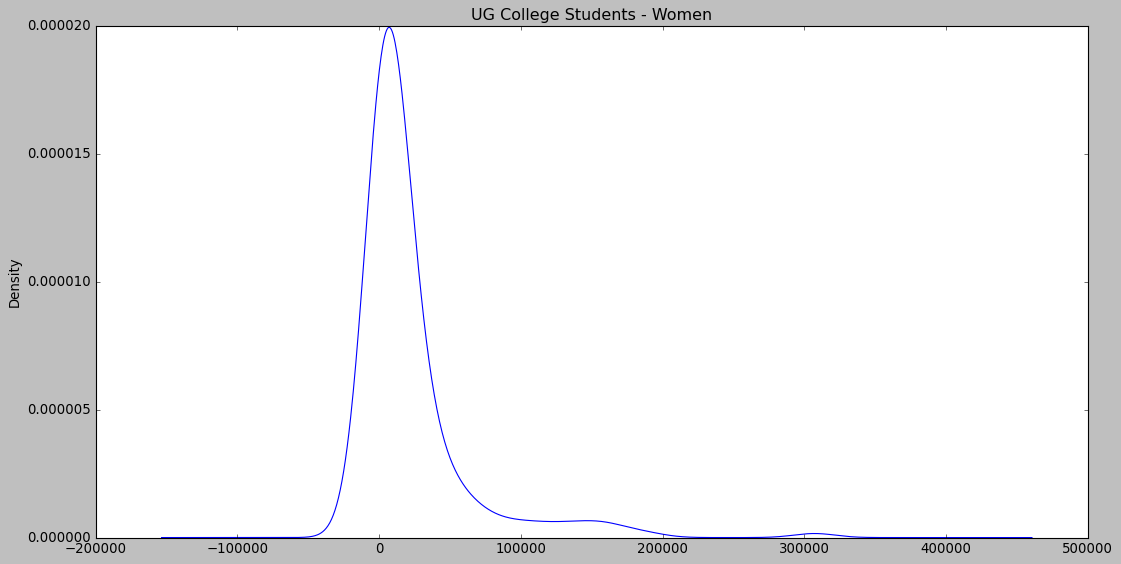

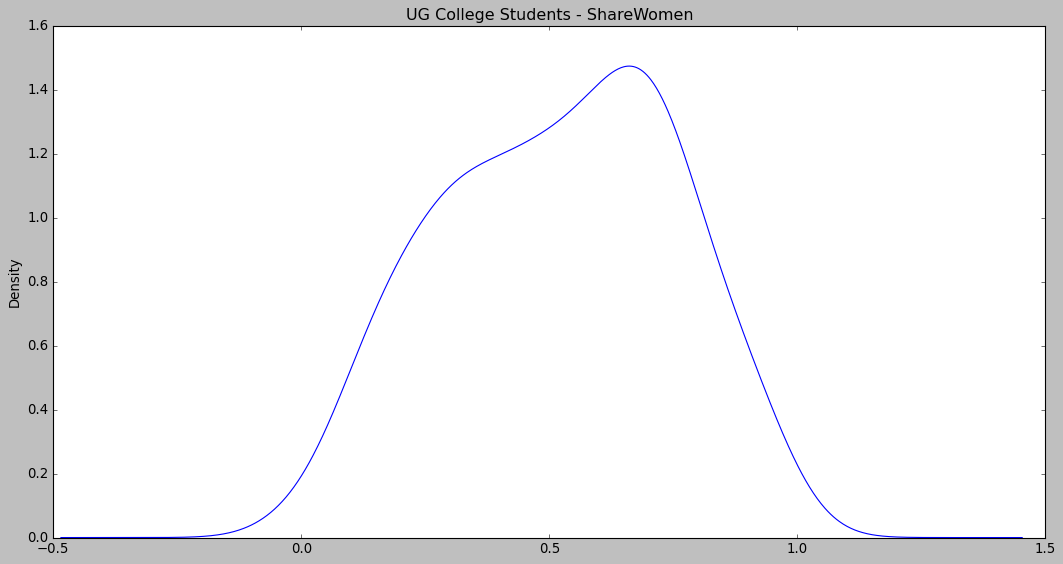

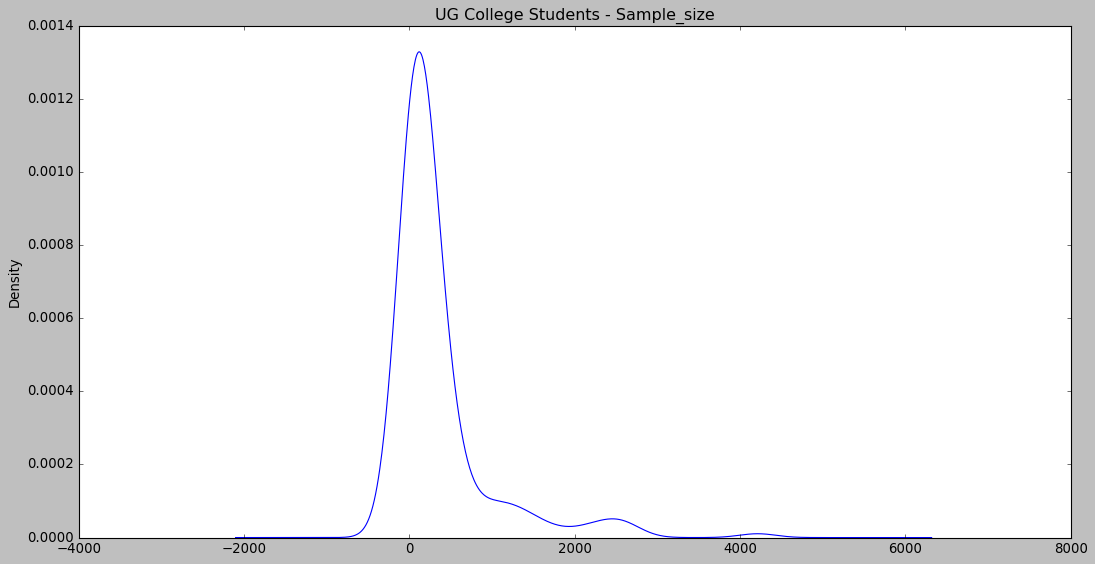

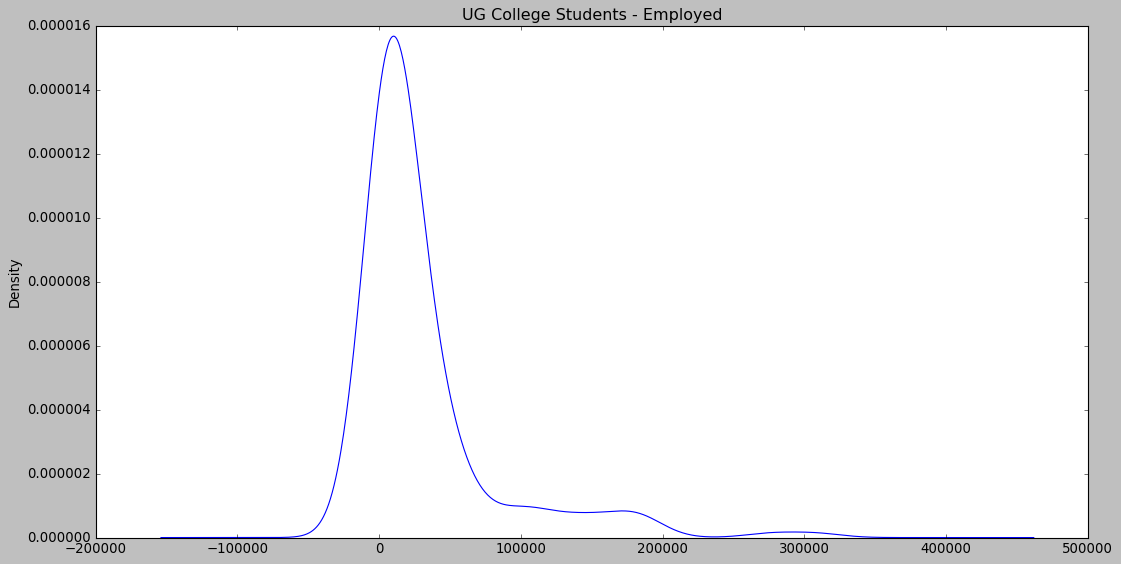

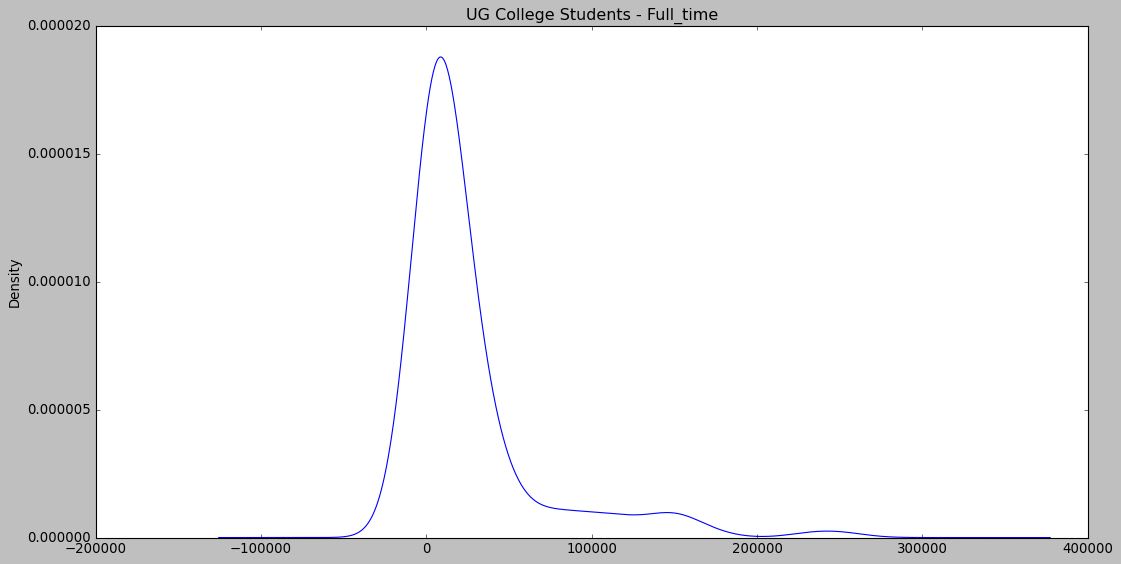

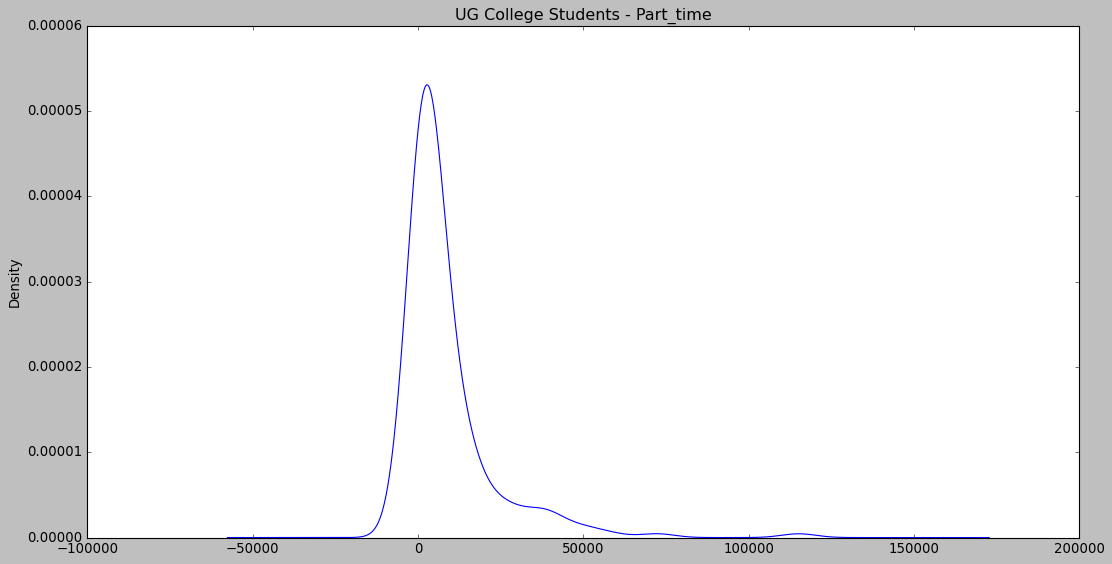

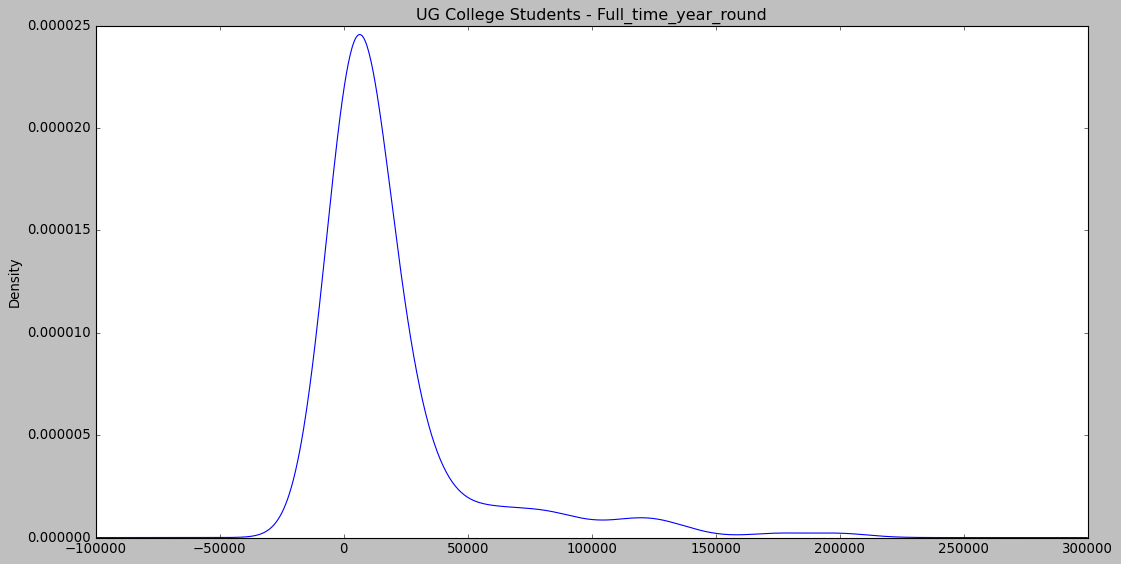

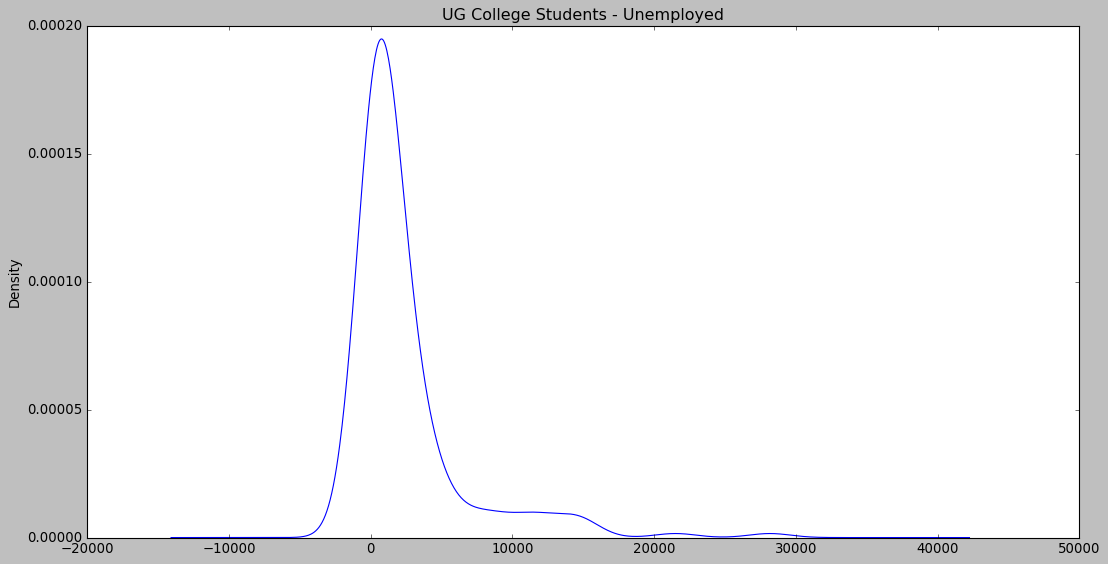

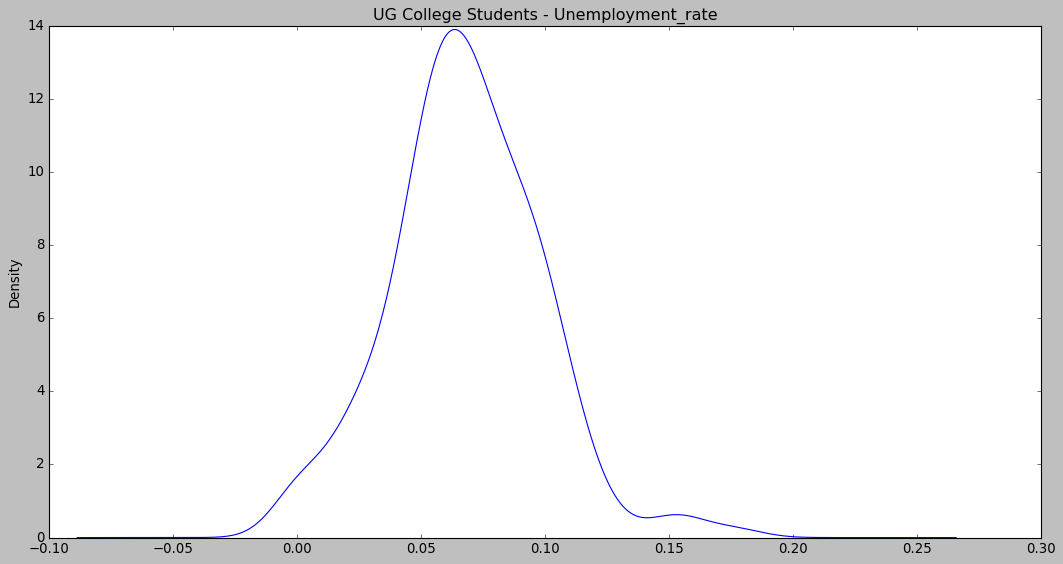

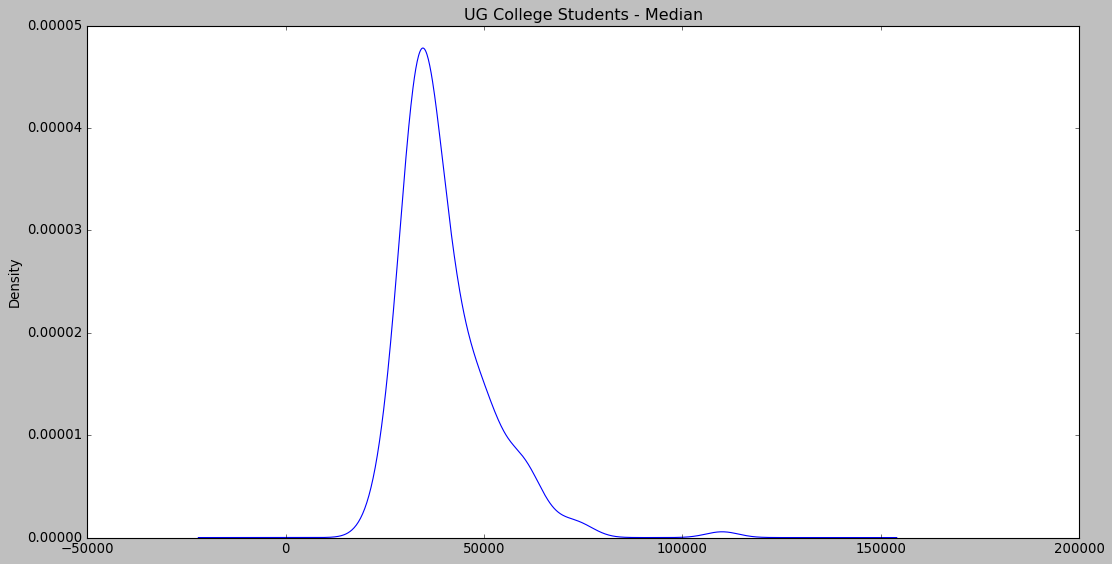

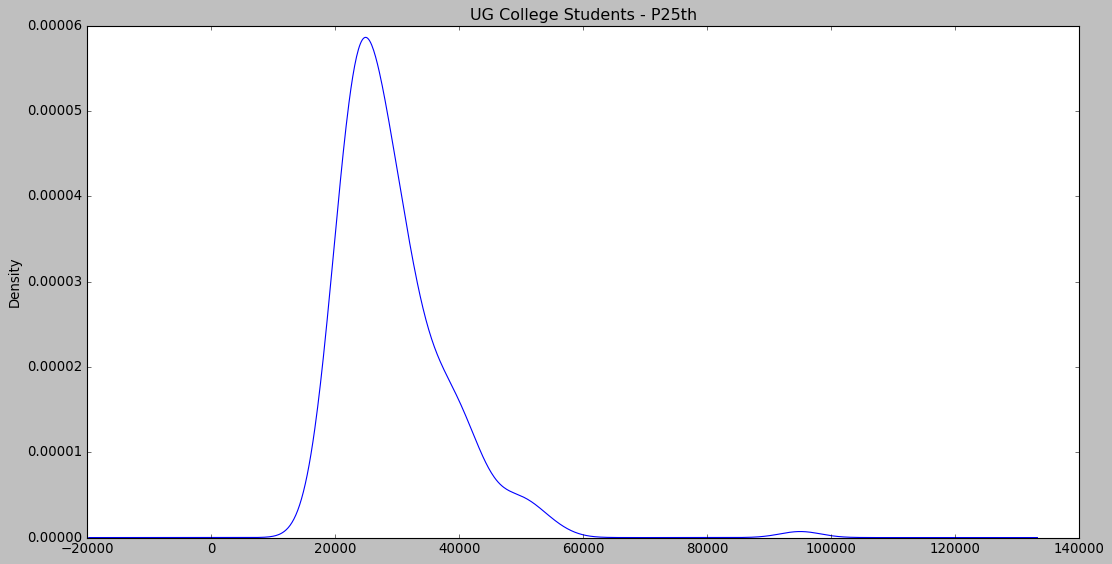

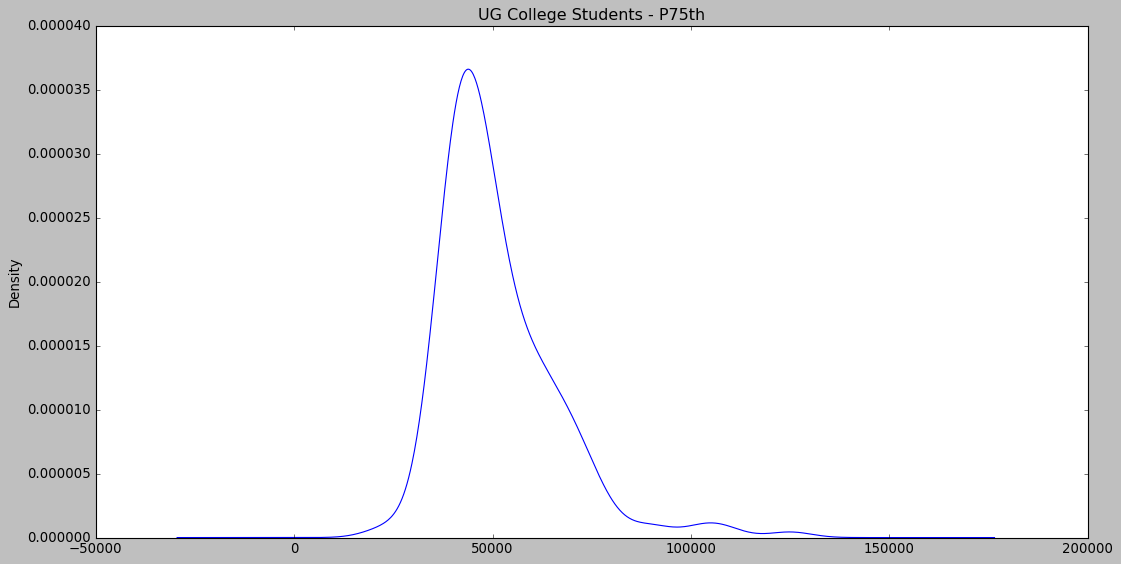

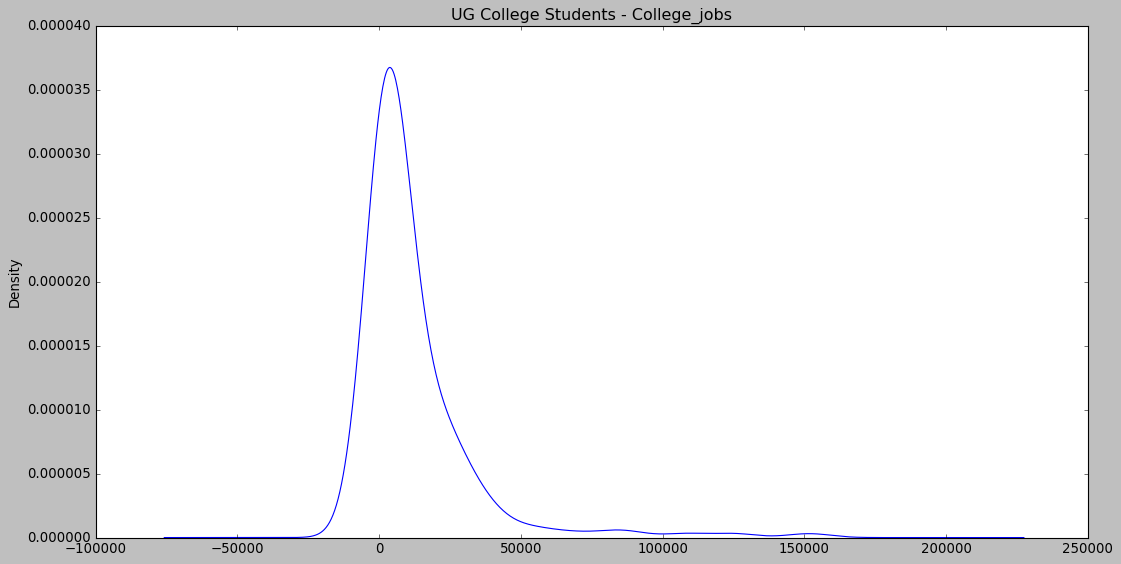

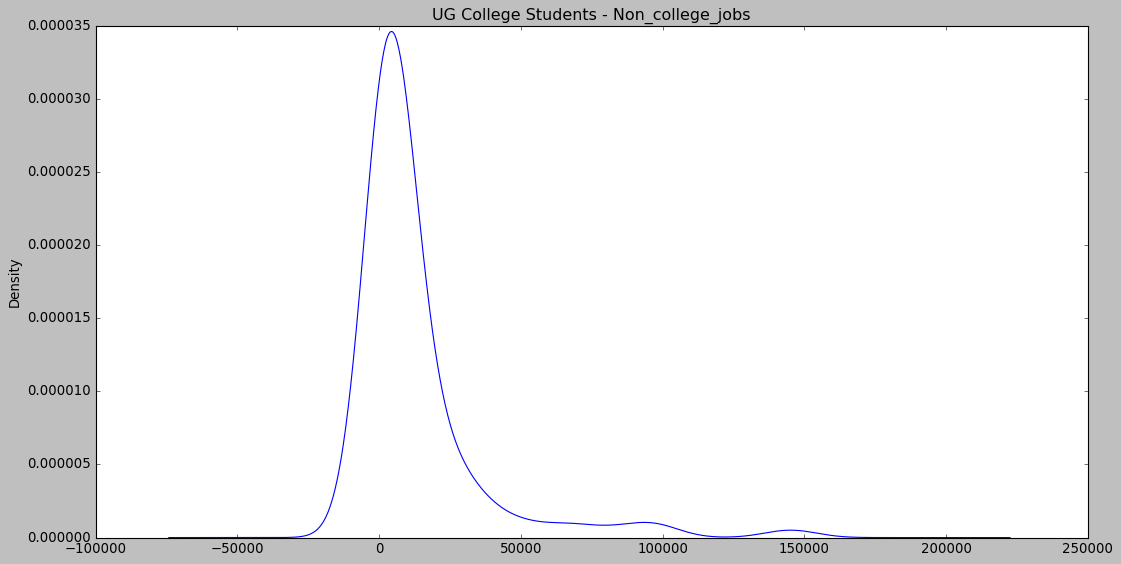

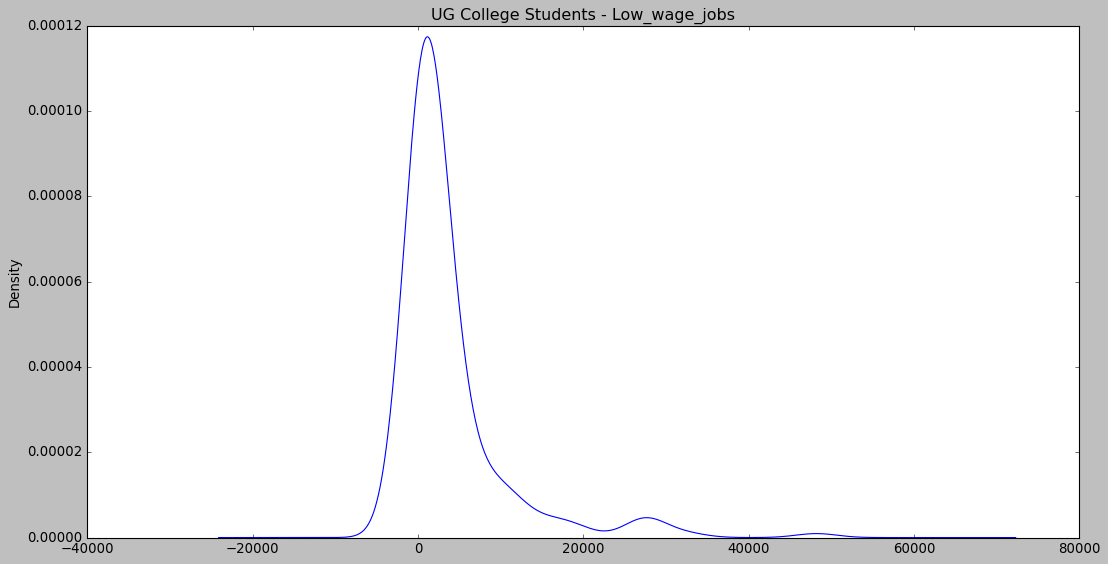

In [13]:
# distribution of major categories, college students
for column in college_majors.columns:
    if college_majors[column].dtype in ['float64','int64']:
        college_majors[column].plot.kde(figsize=(16,8),title="{} - {}".format("UG College Students", column))
        plt.show()

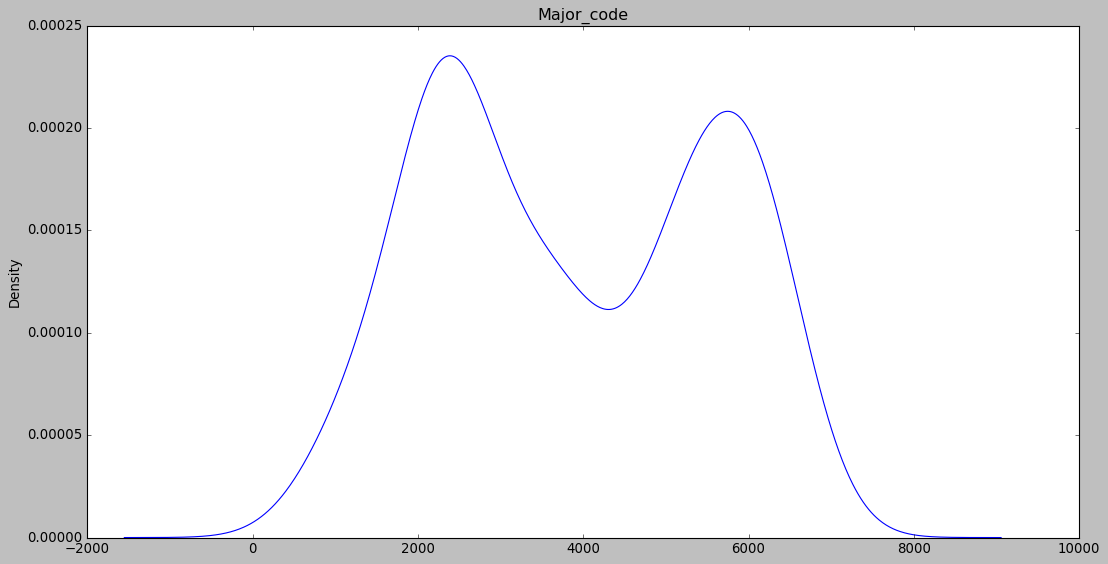

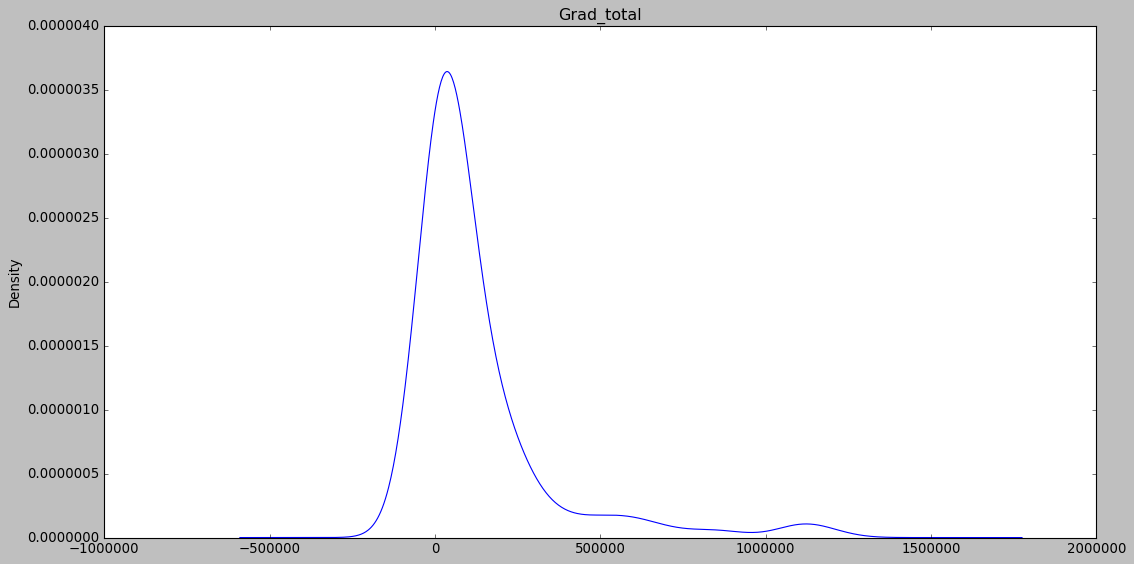

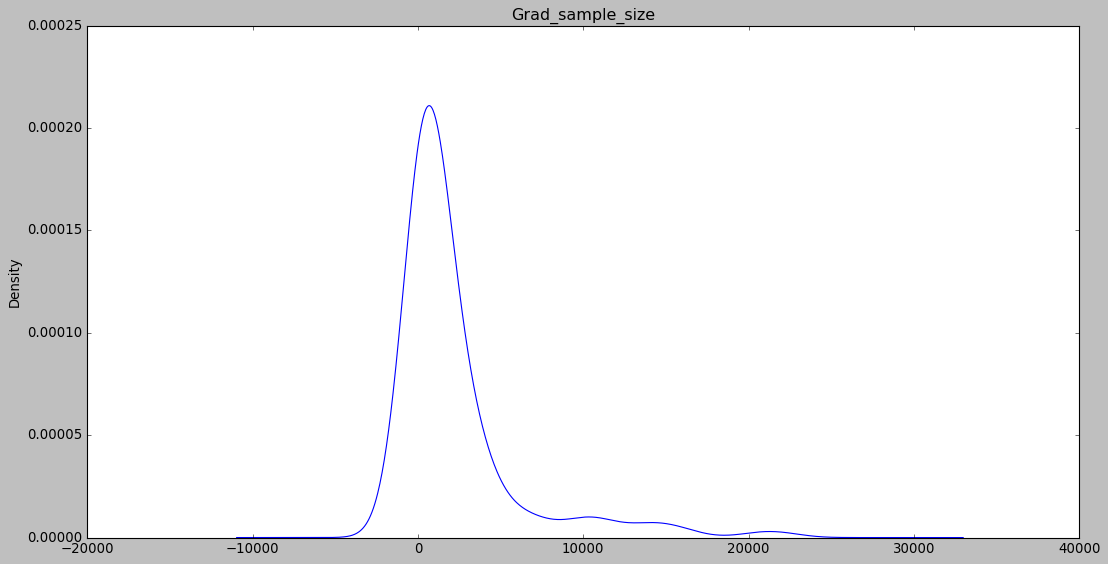

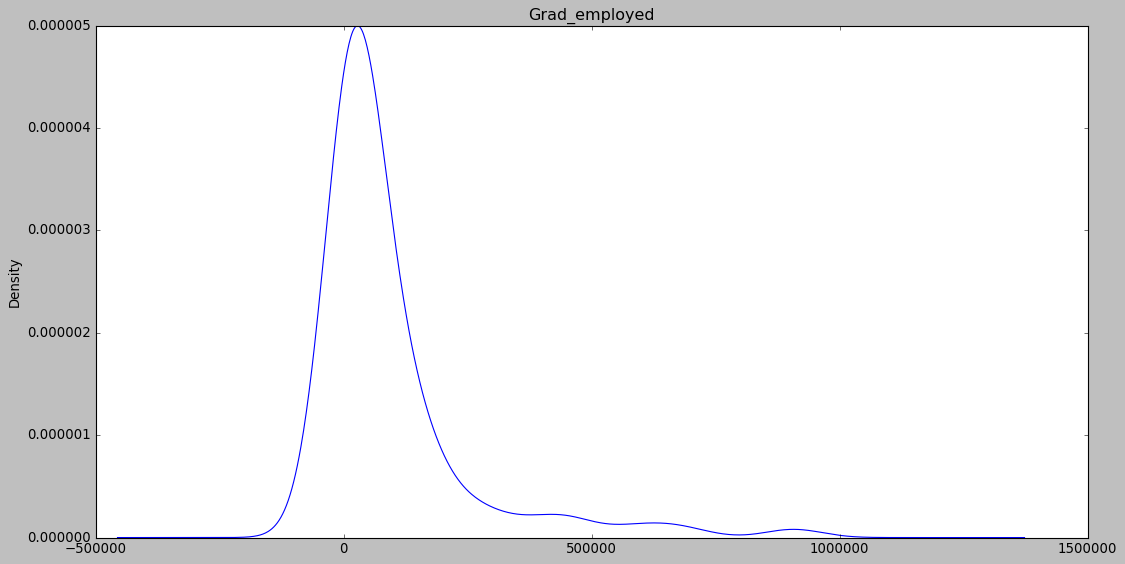

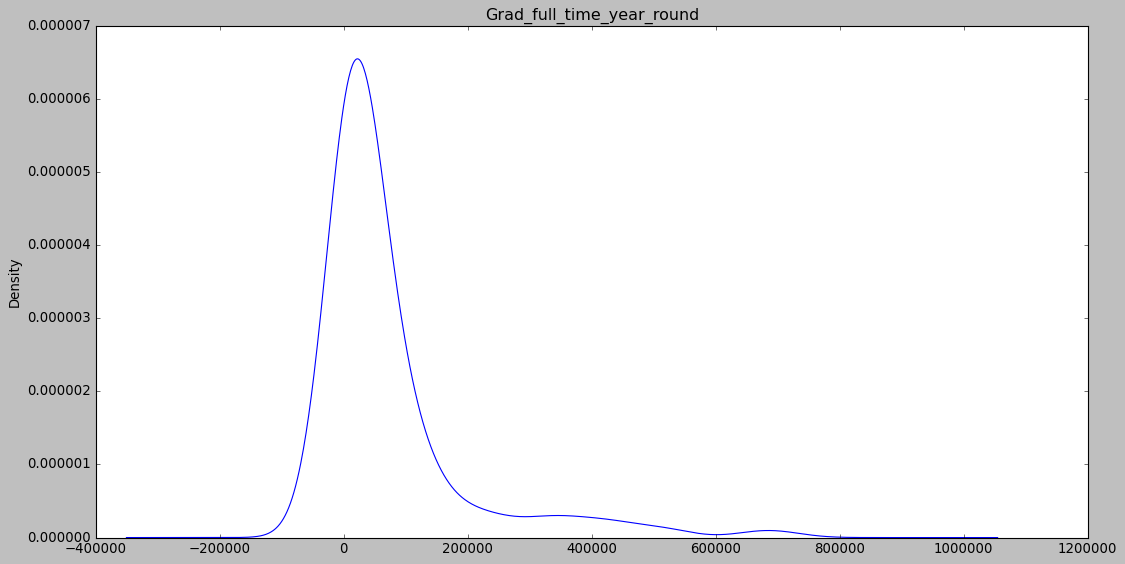

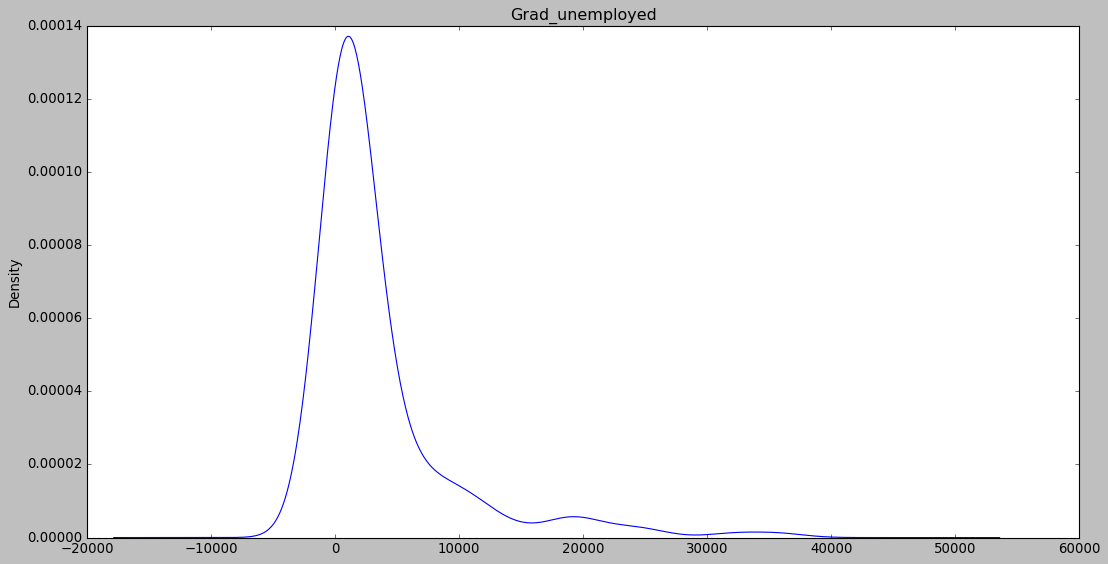

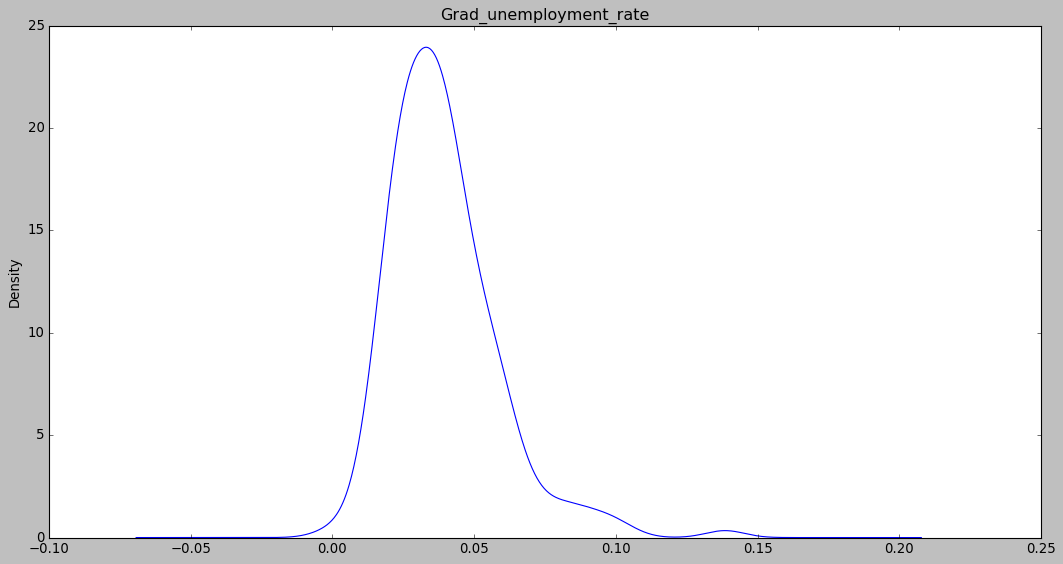

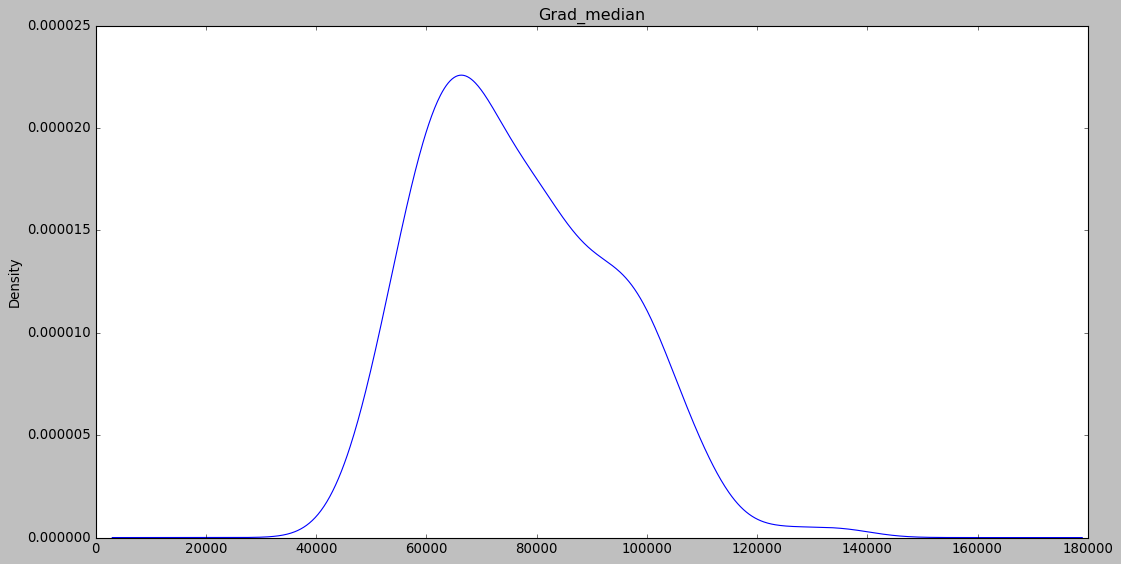

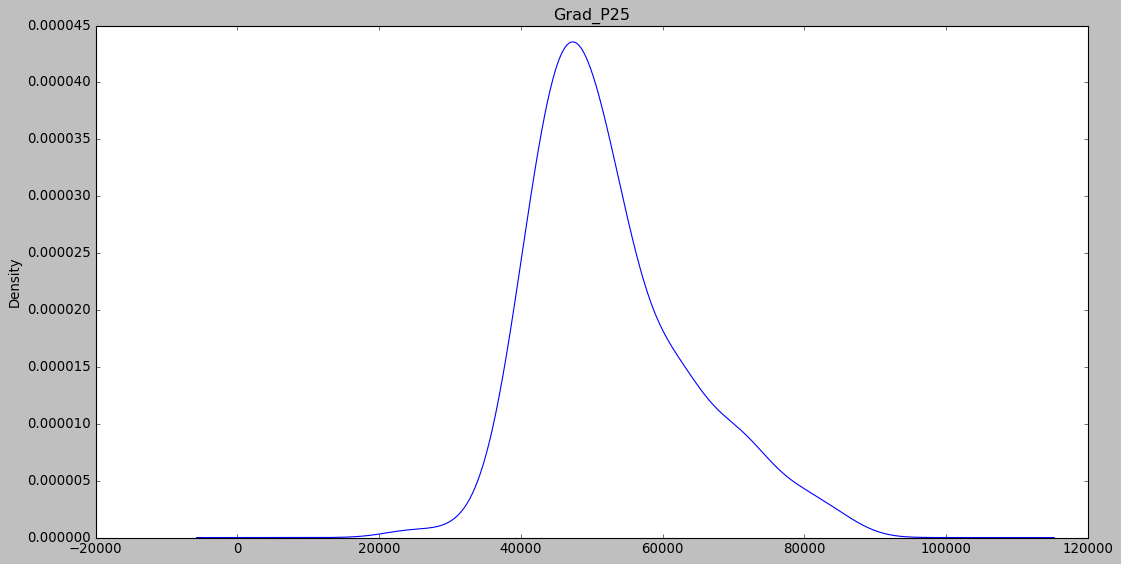

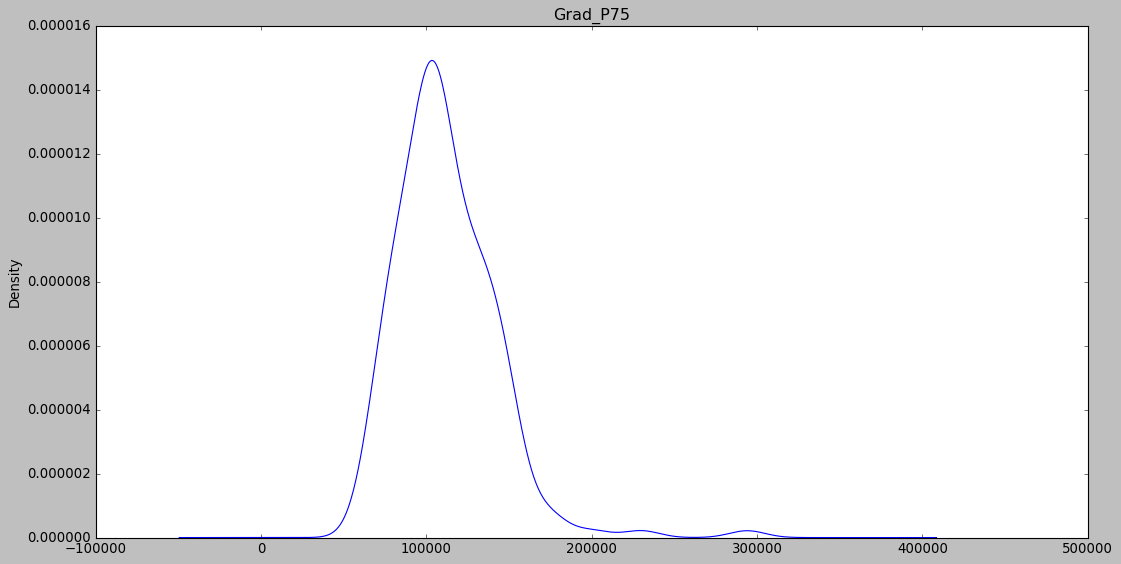

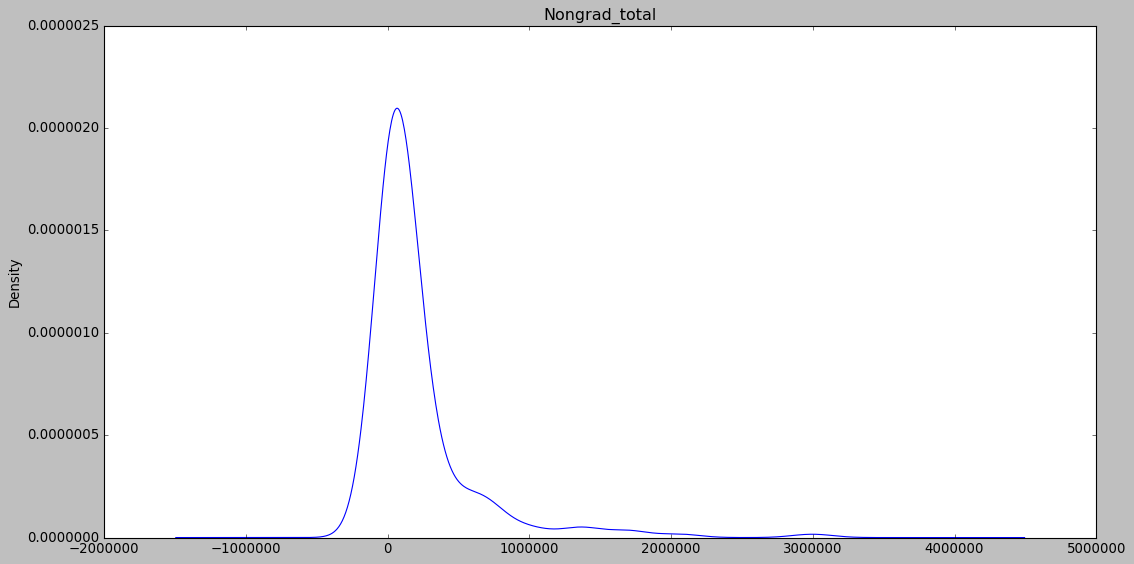

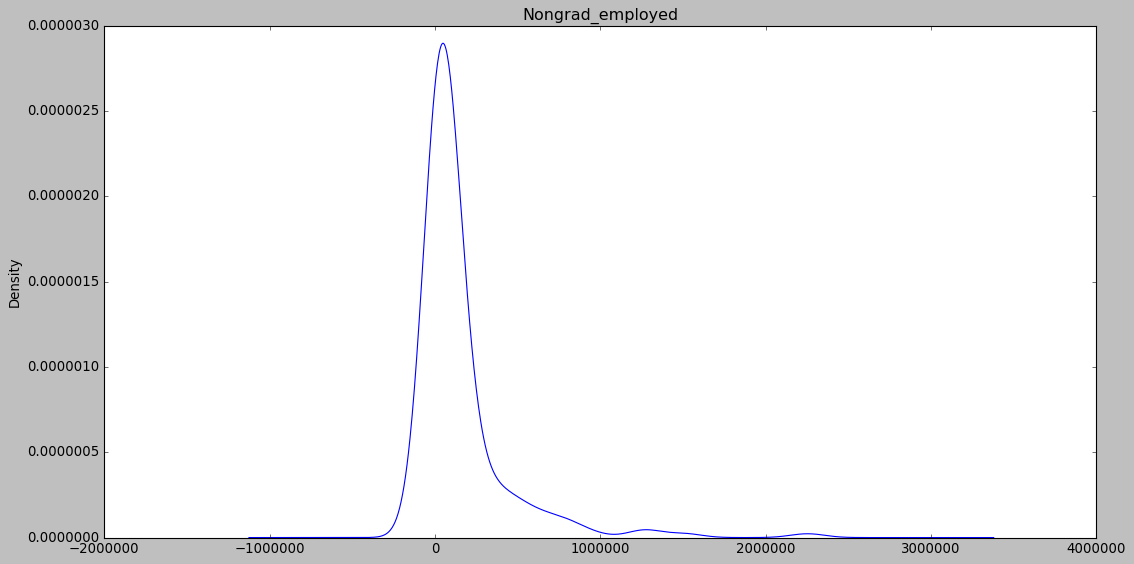

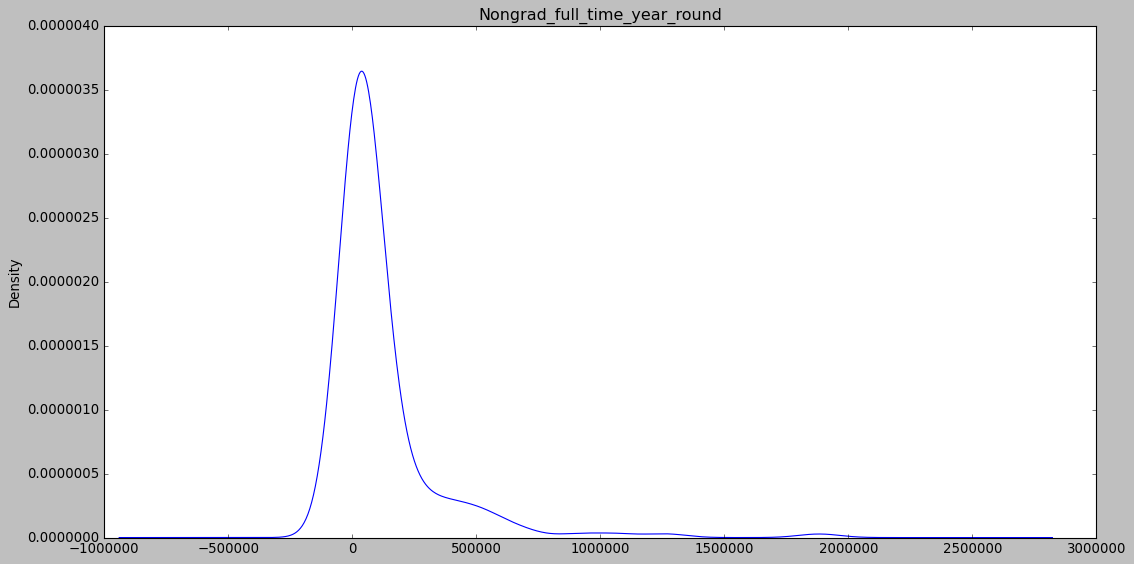

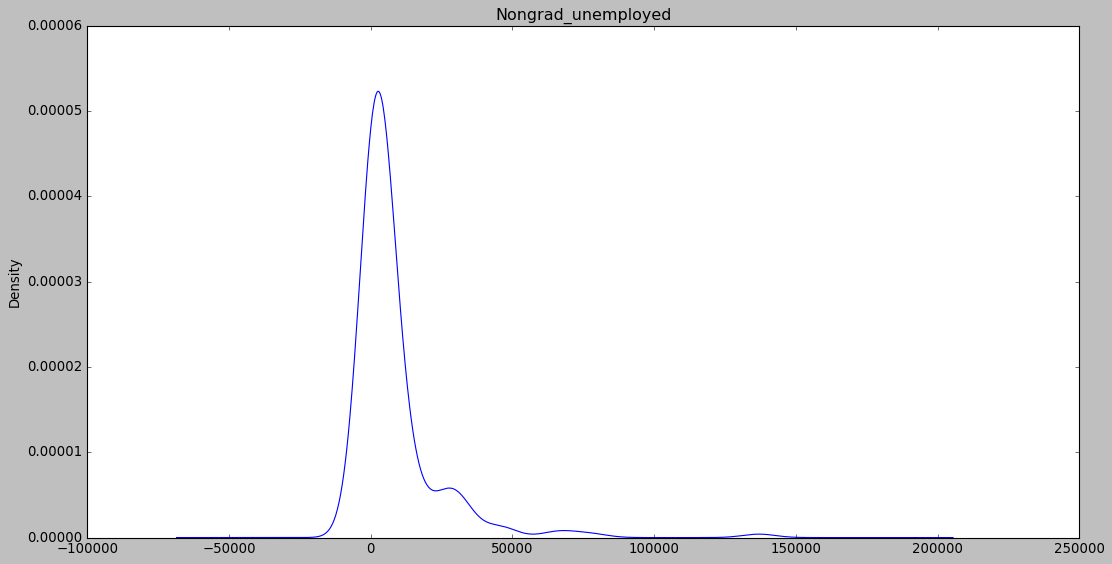

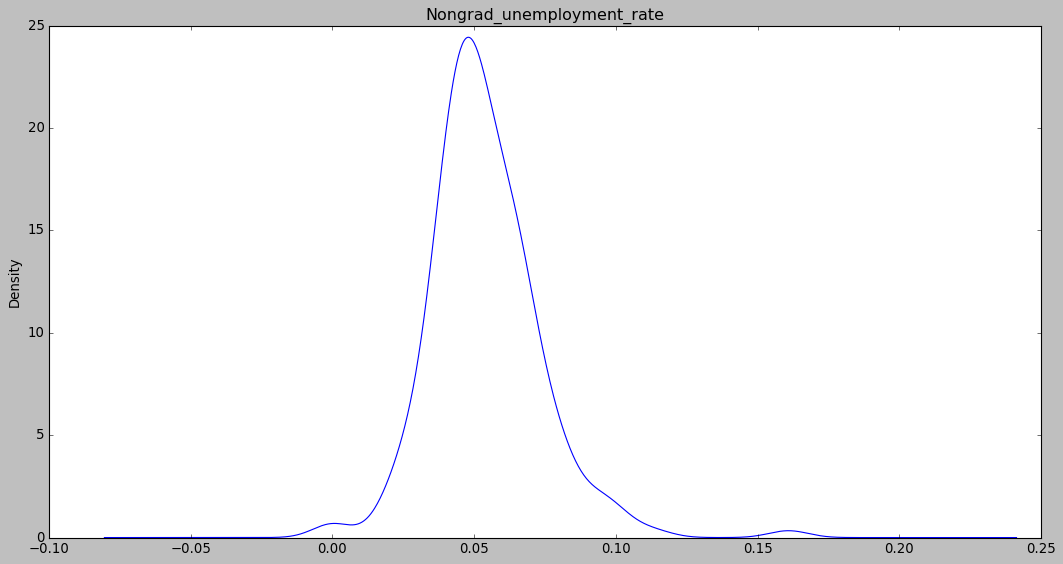

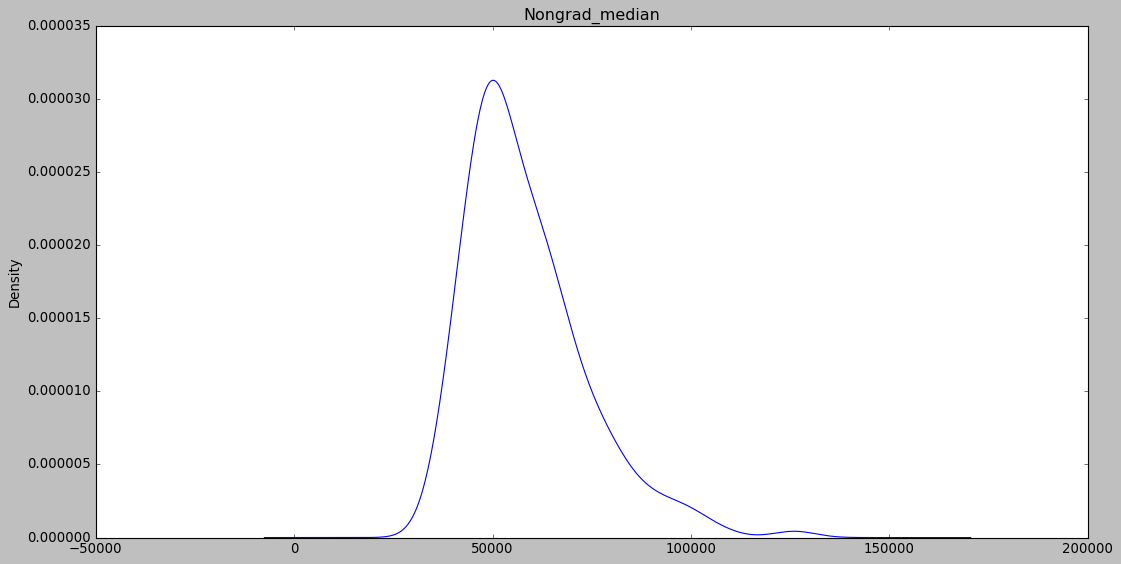

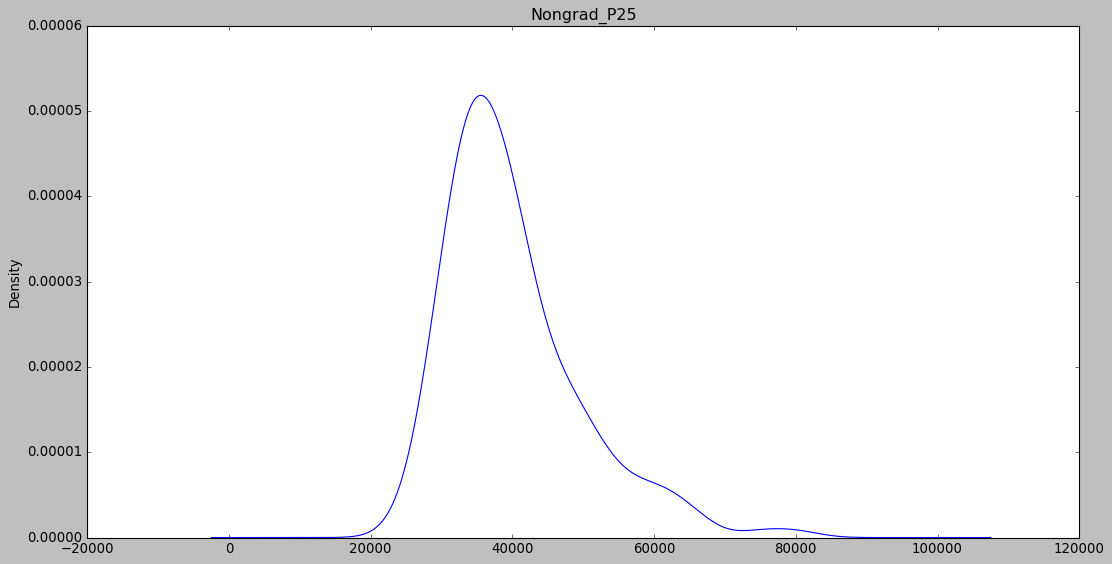

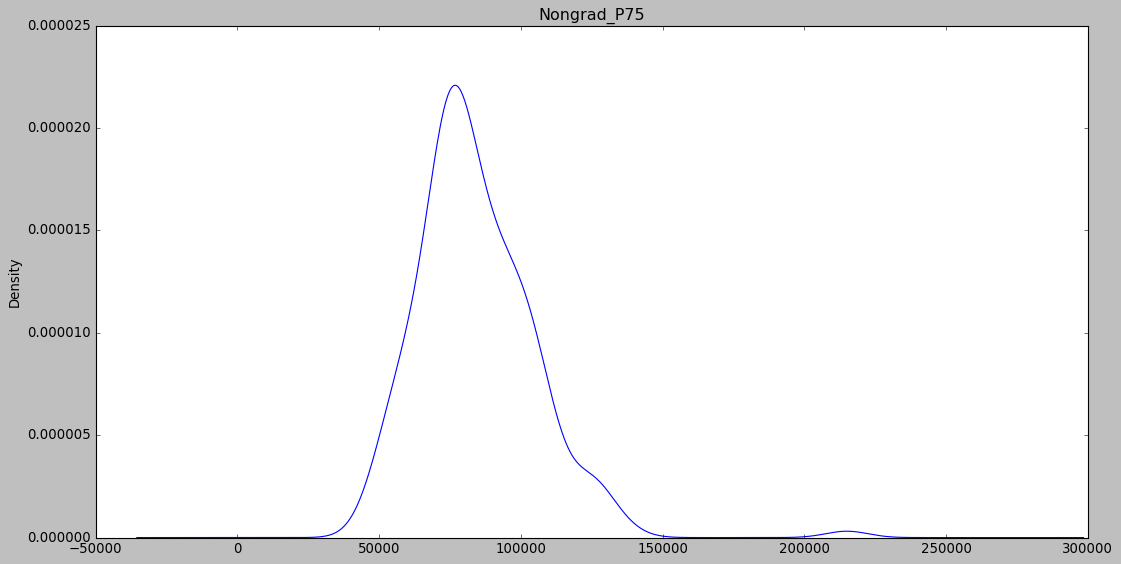

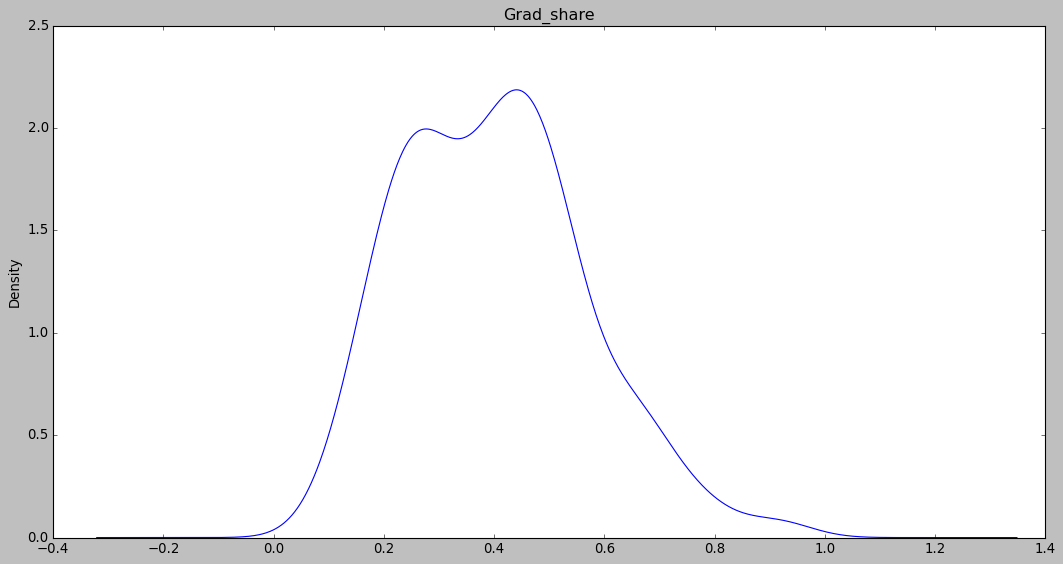

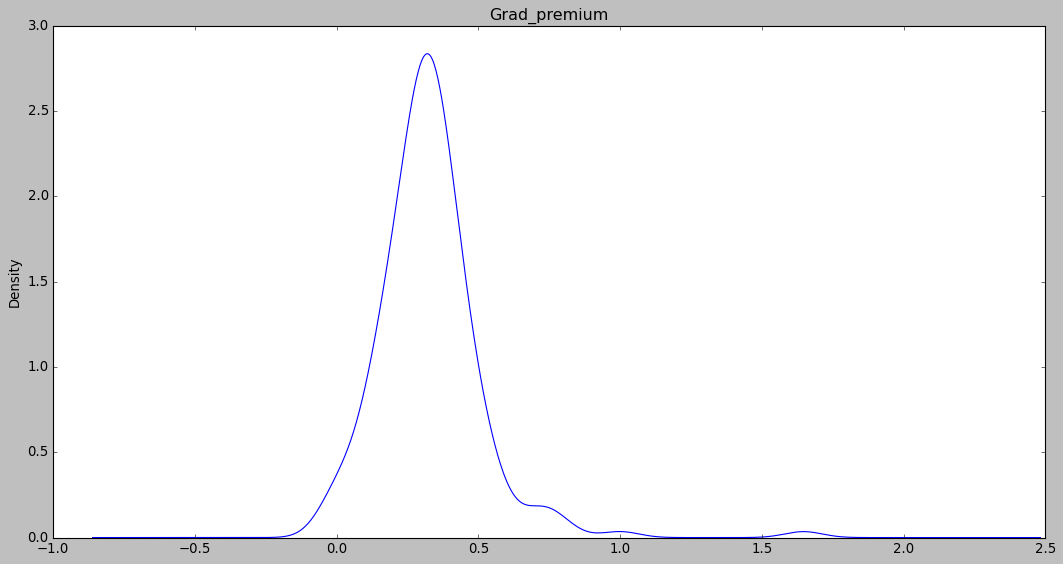

In [14]:
# distribution of major categories, grad students
for column in grad_students.columns:
    if grad_students[column].dtype in ['float64','int64']:
        grad_students[column].plot.kde(figsize=(16,8),title=column)
        plt.show()

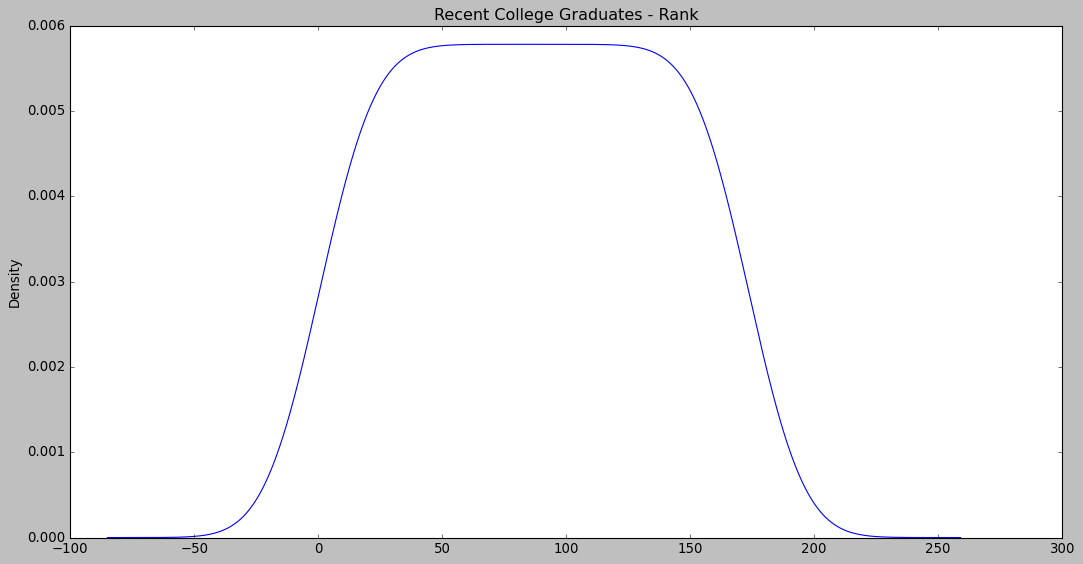

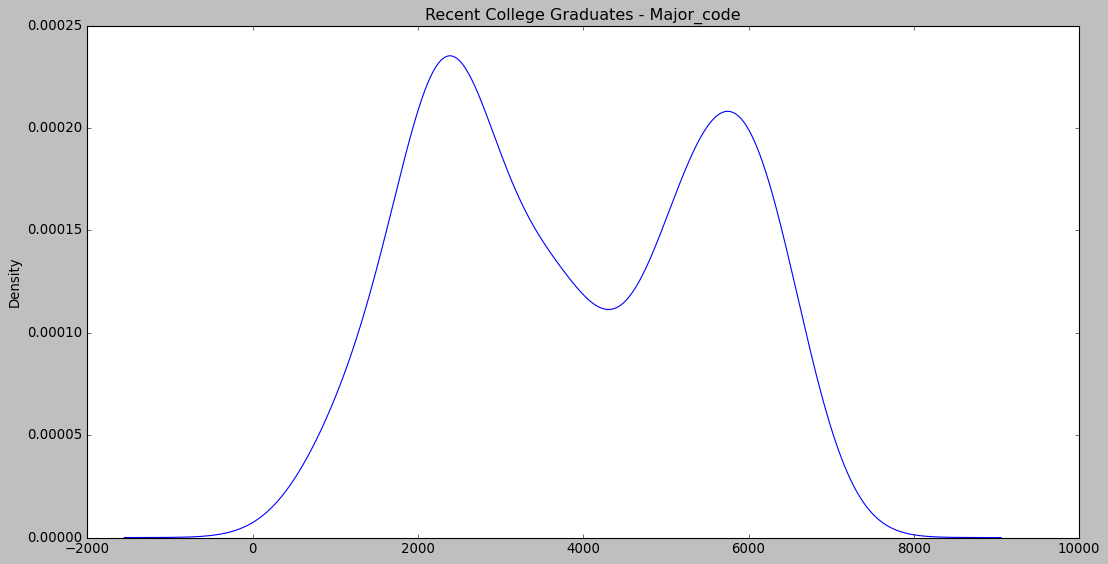

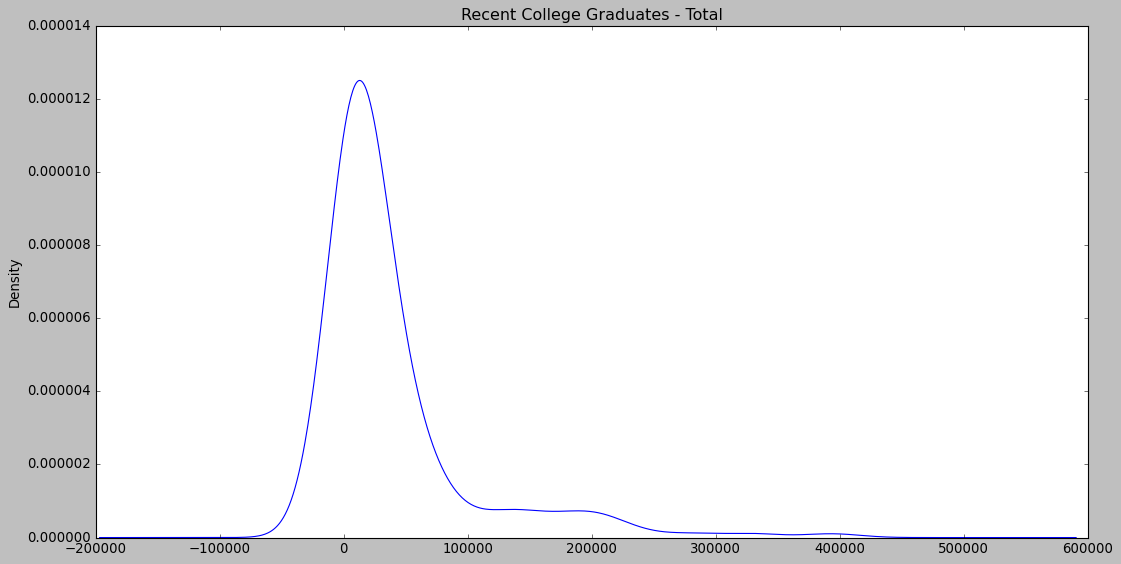

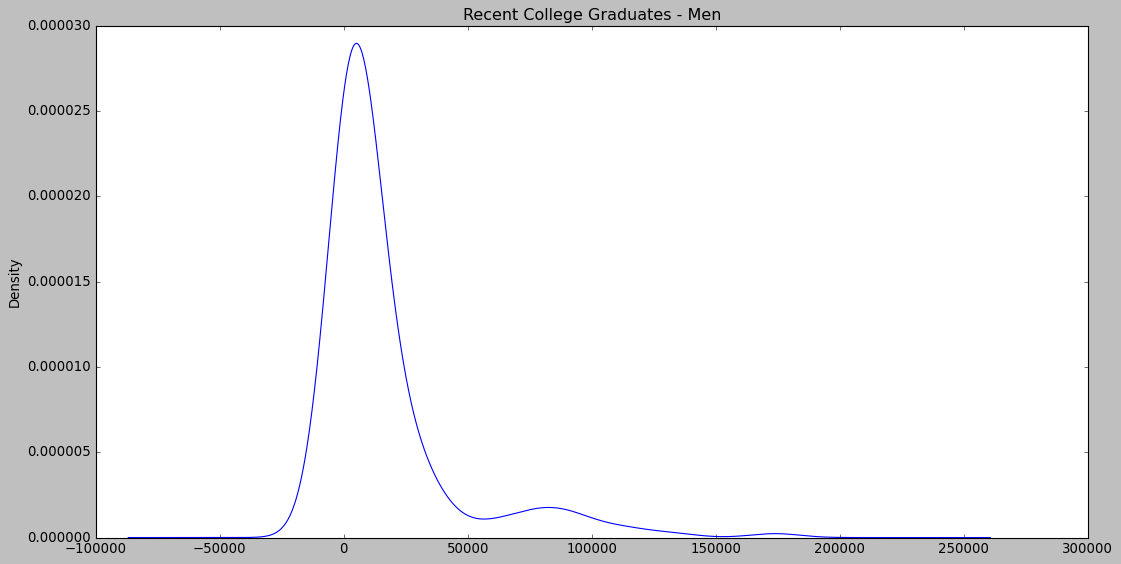

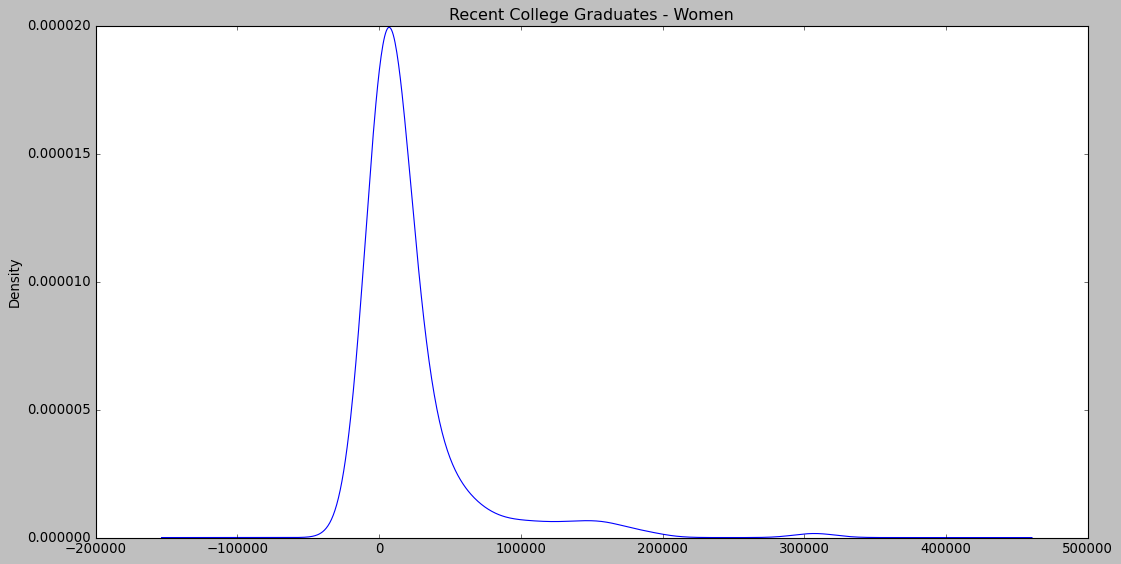

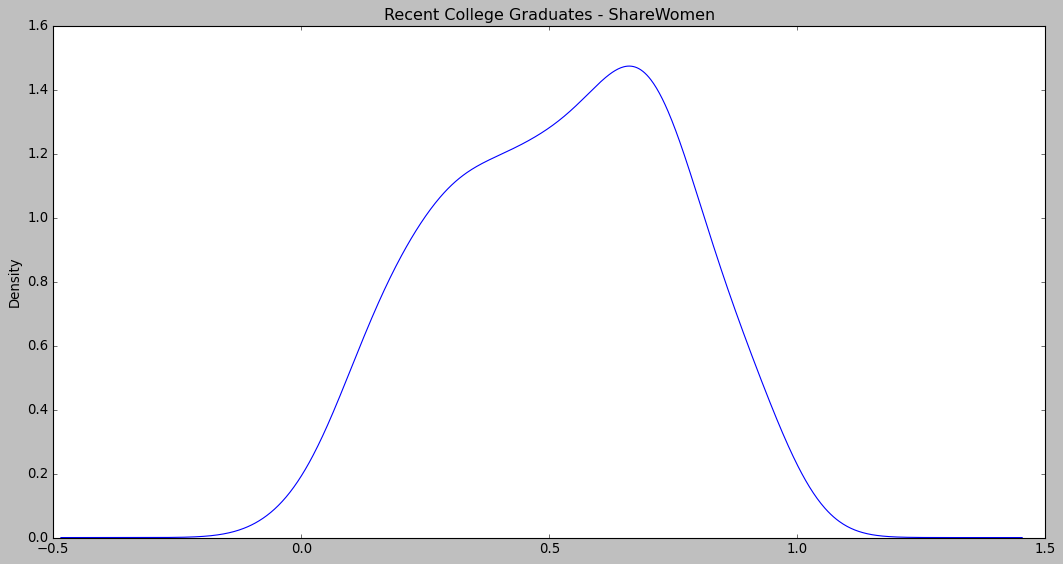

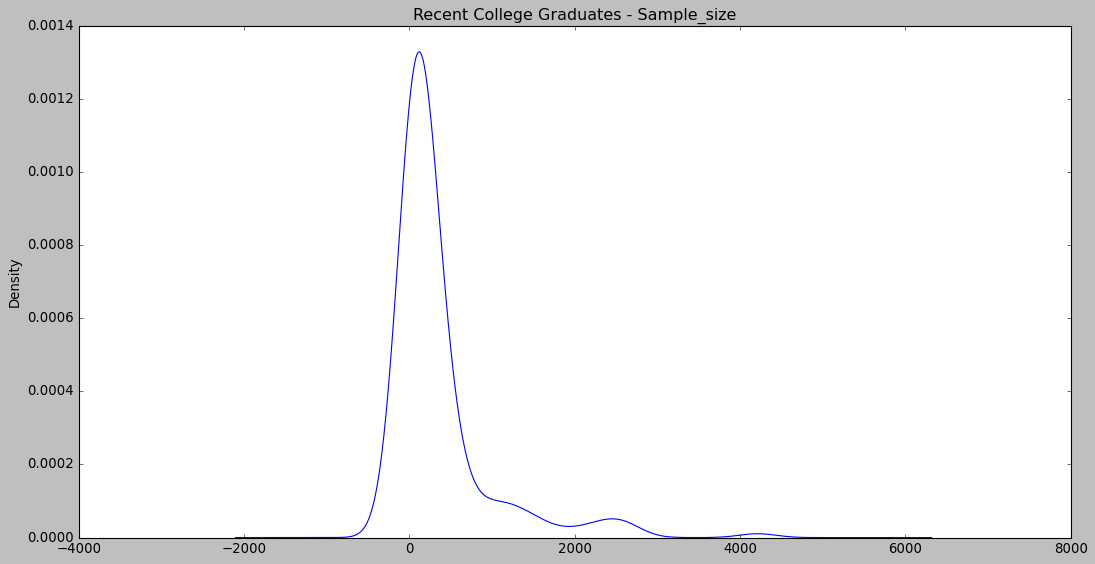

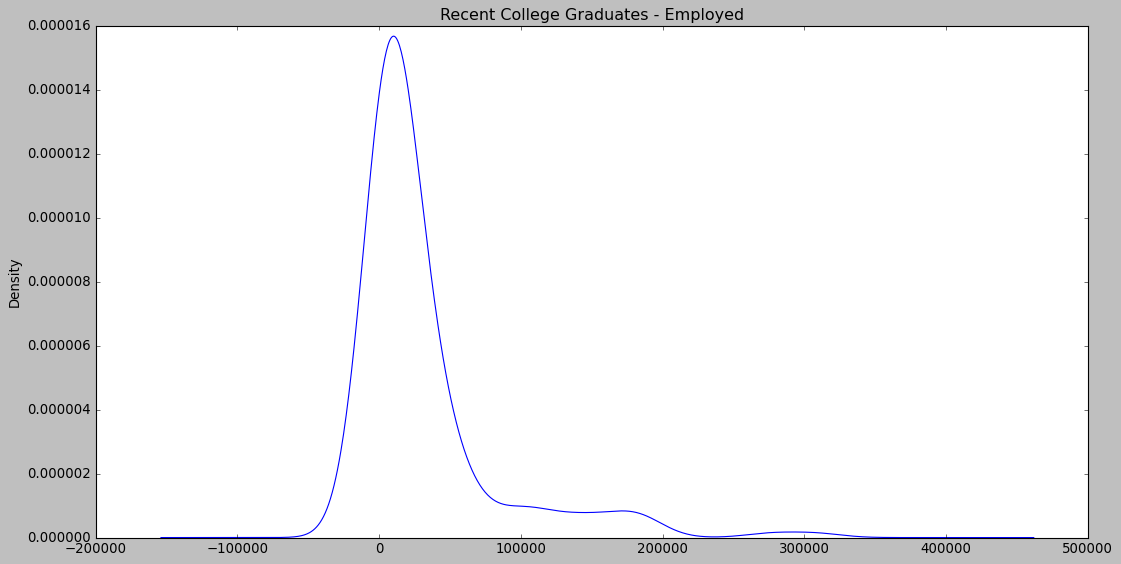

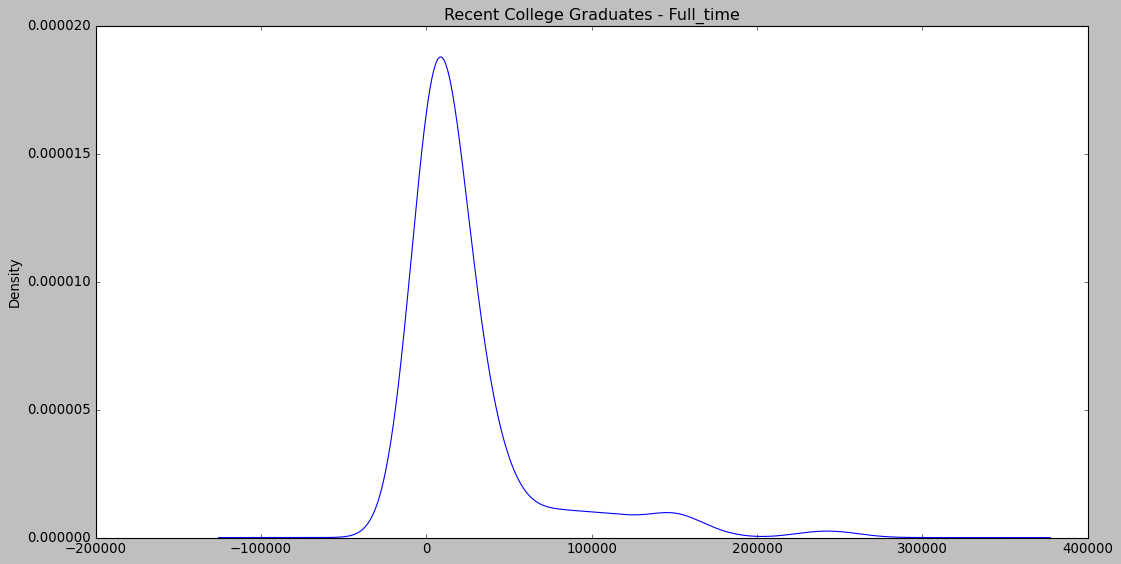

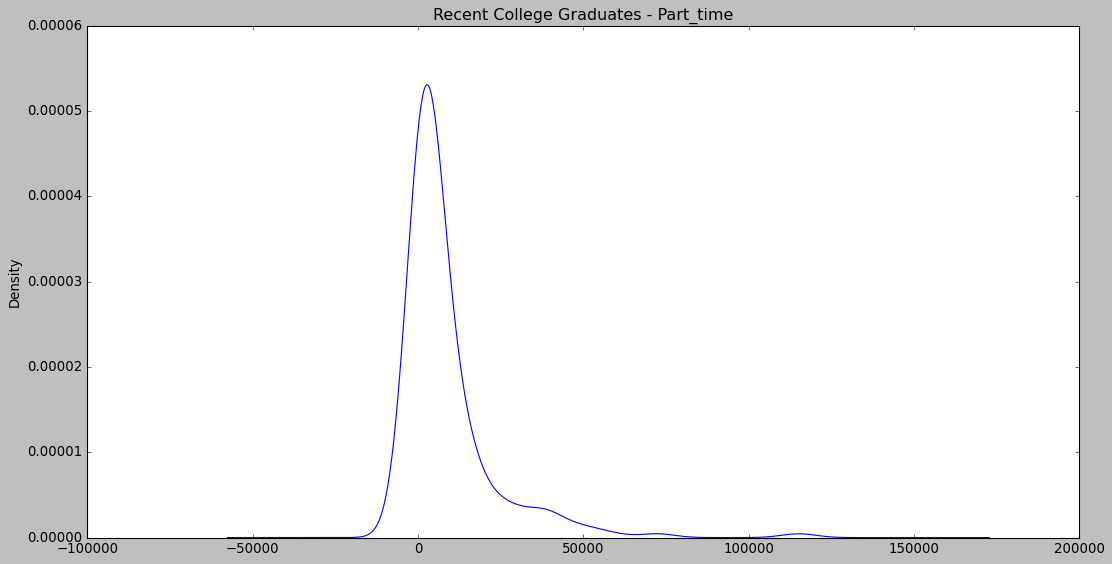

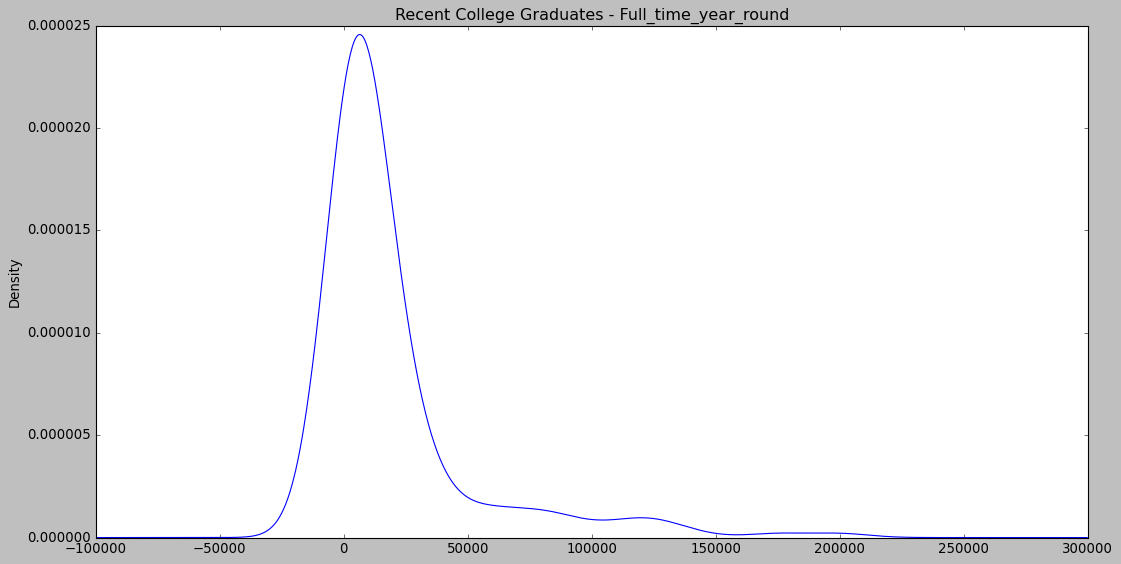

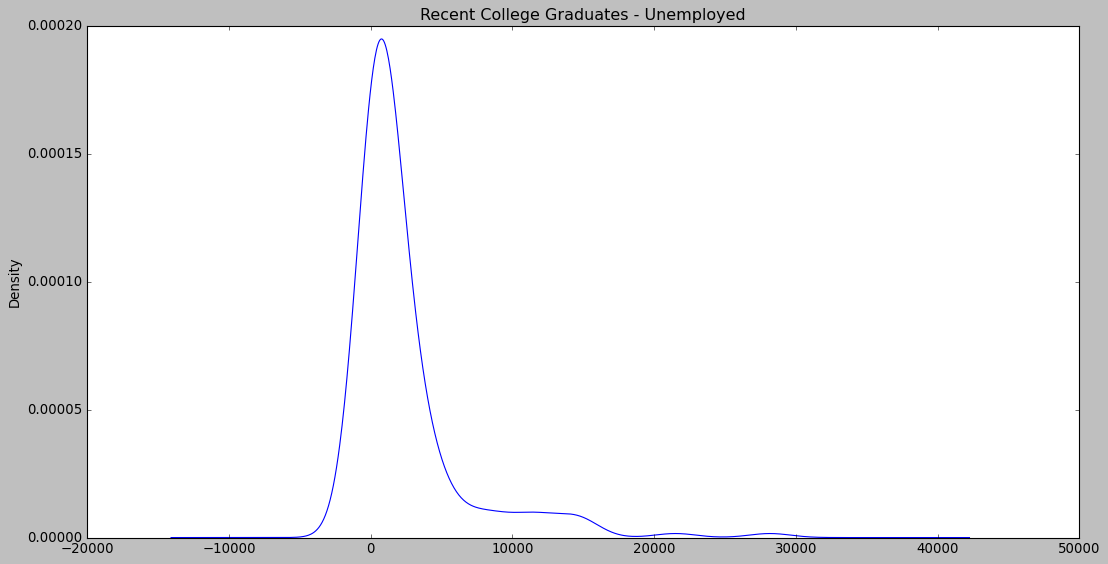

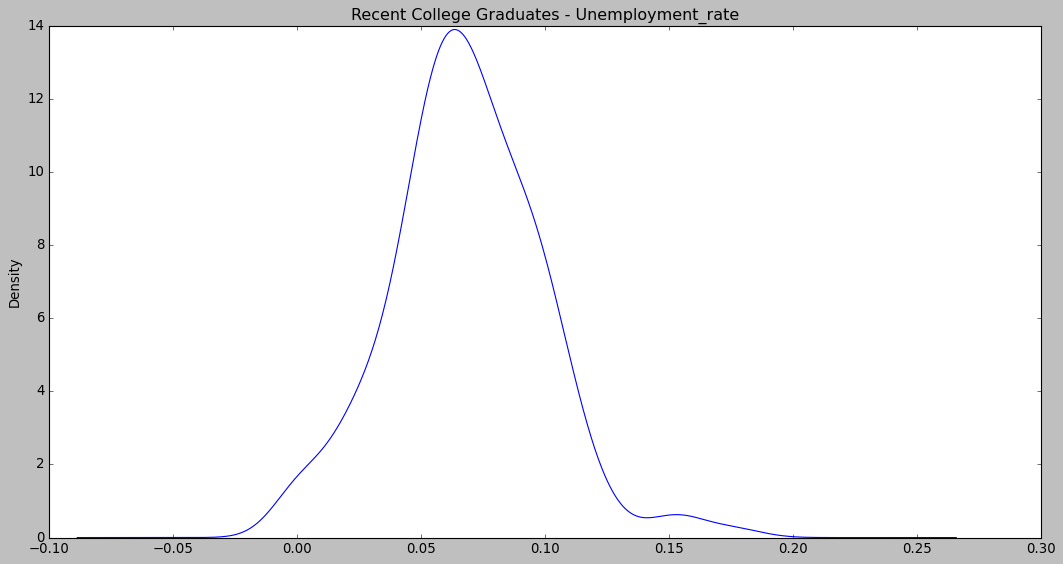

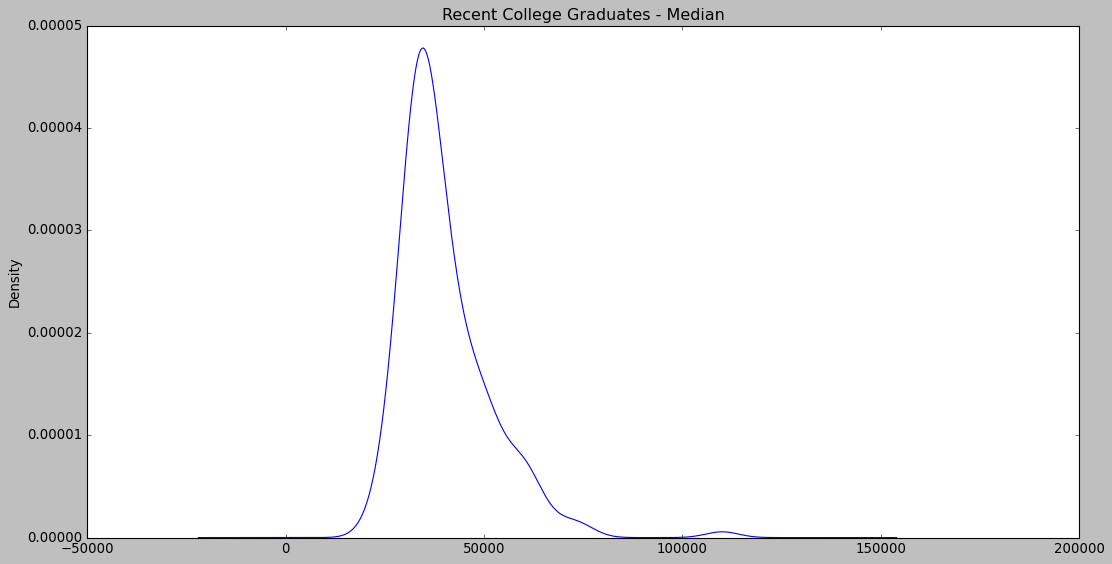

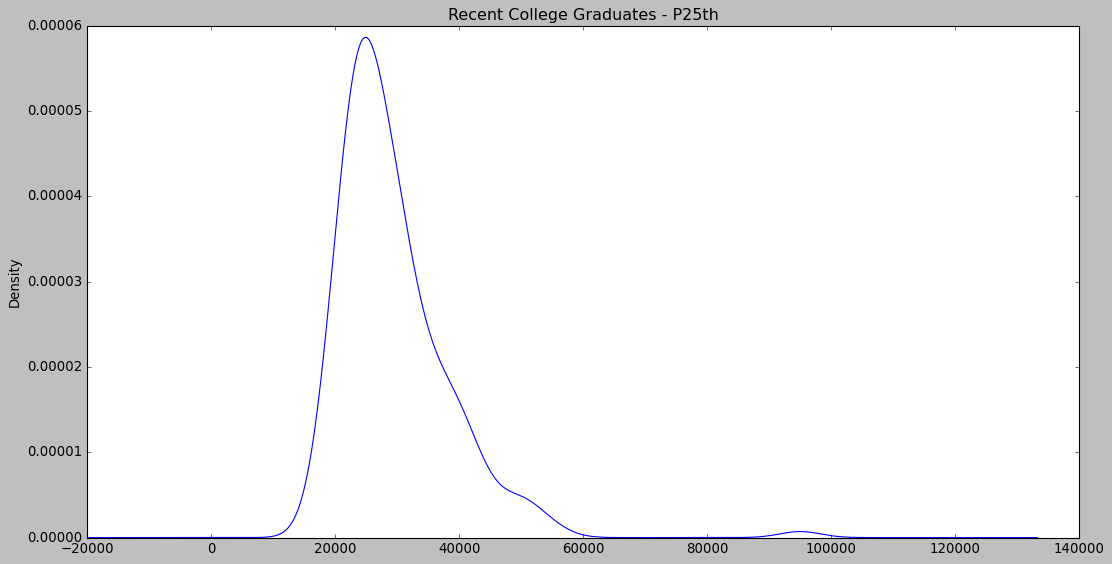

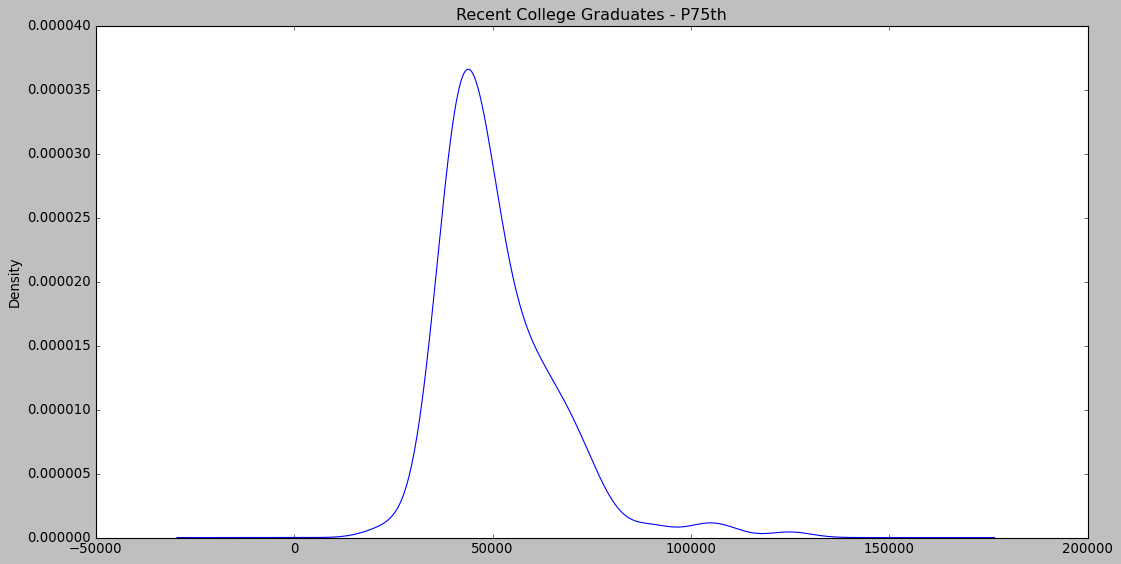

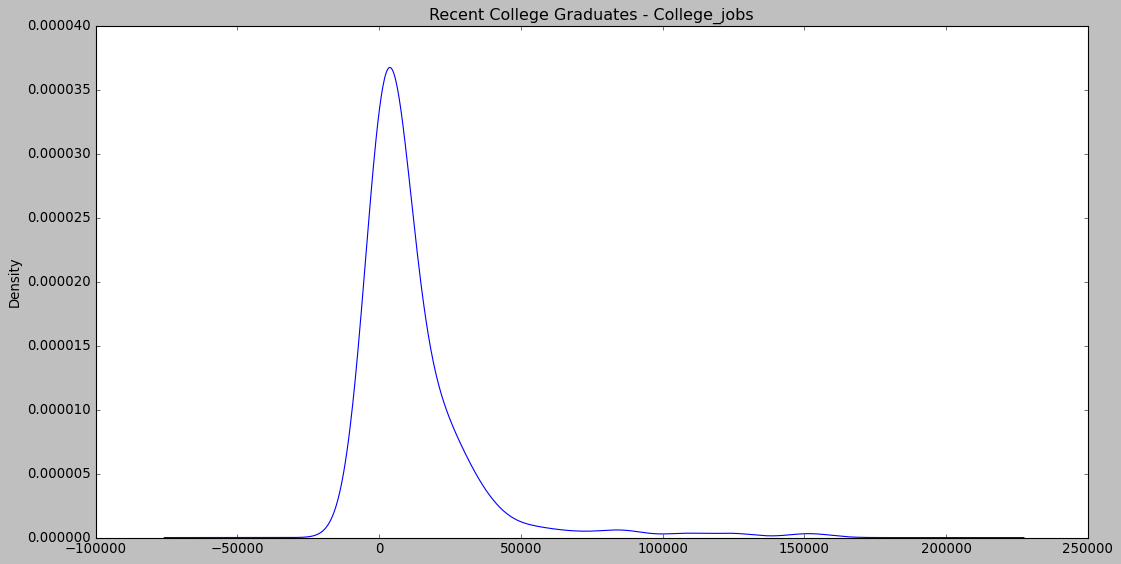

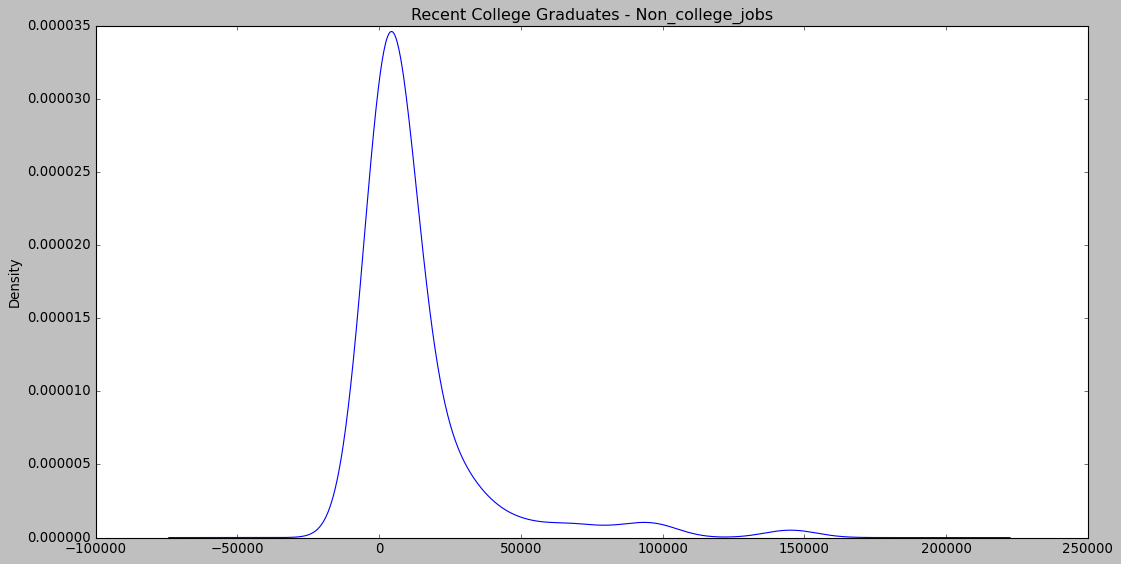

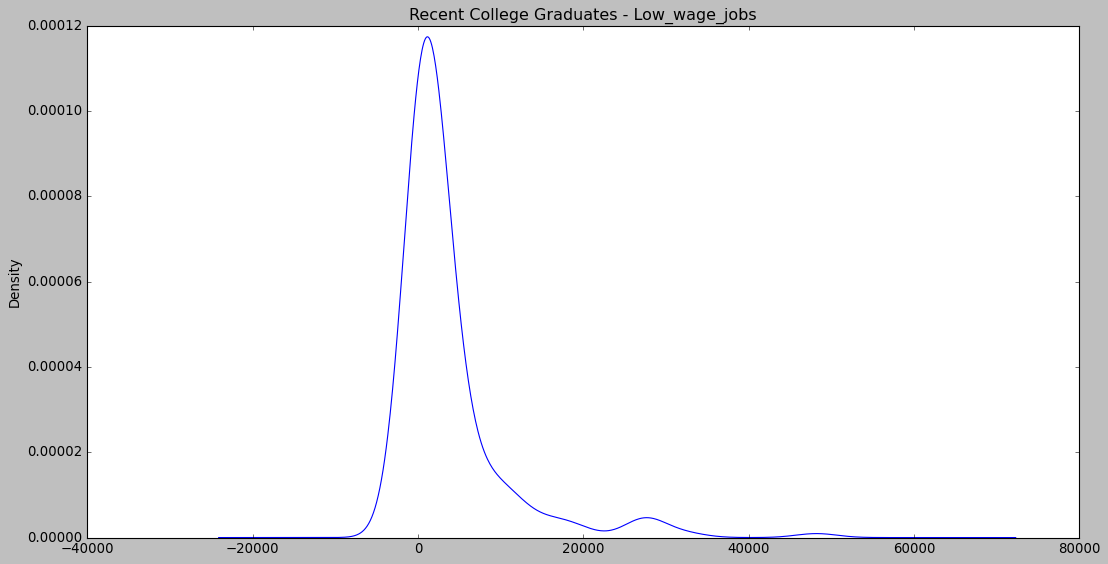

In [15]:
# distribution of major categories, recent grad students
for column in recent_grads.columns:
    if recent_grads[column].dtype in ['float64','int64']:
        recent_grads[column].plot.kde(figsize=(16,8),title="{} - {}".format("Recent College Graduates", column))
        plt.show()

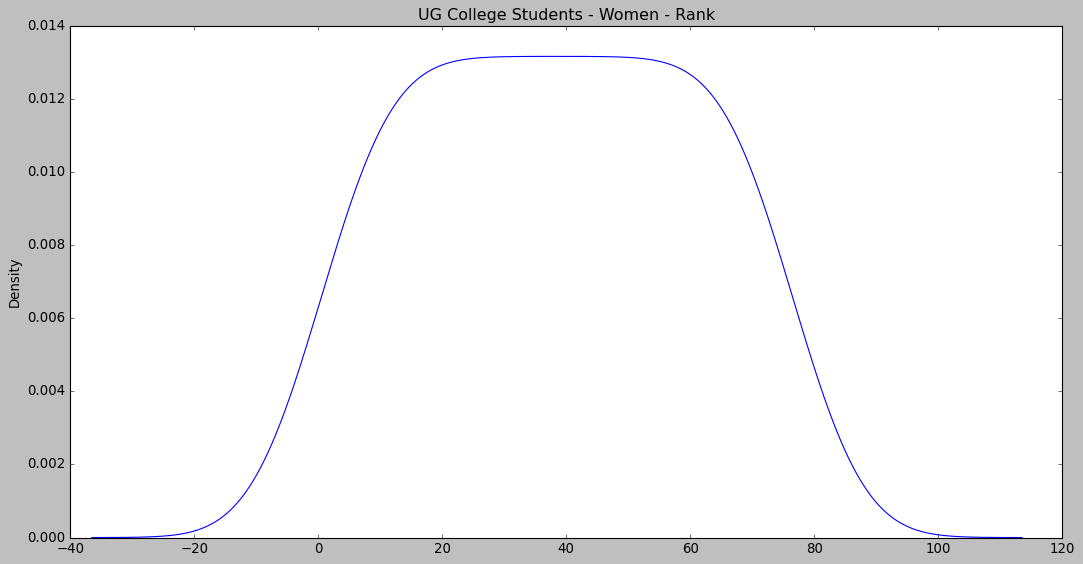

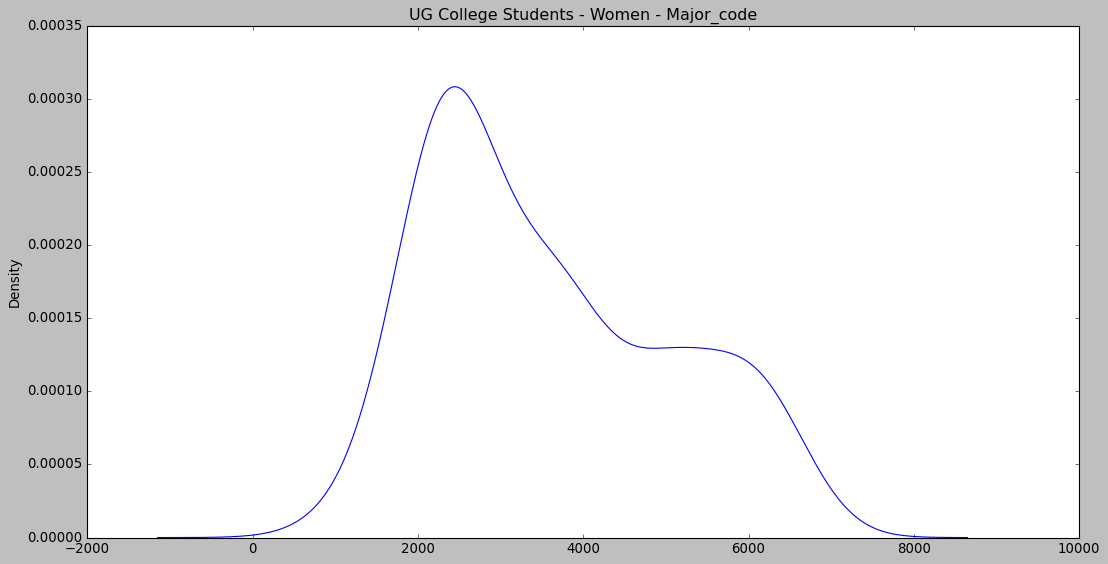

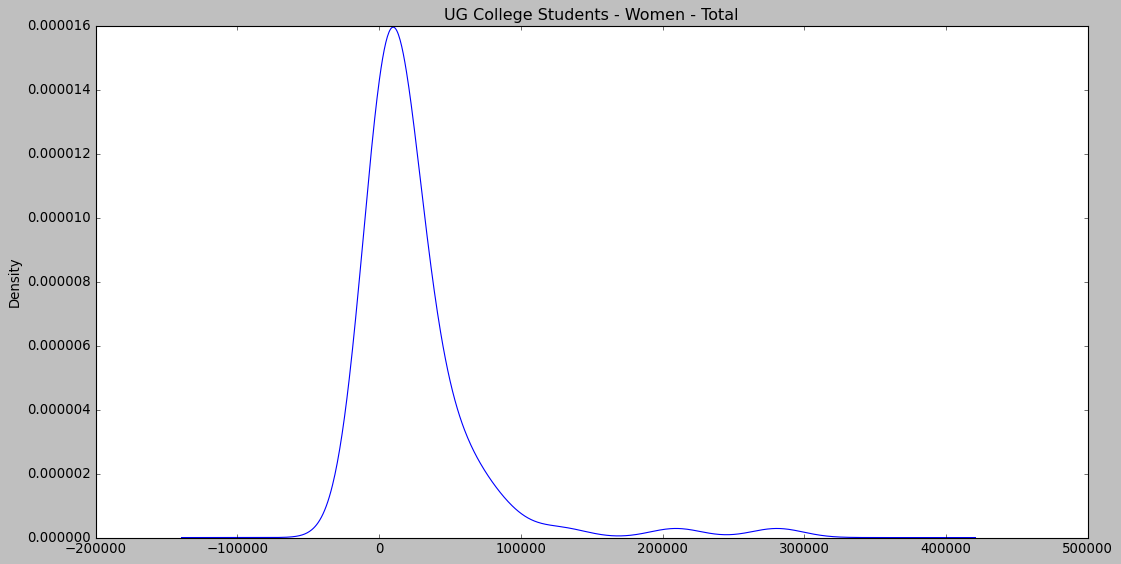

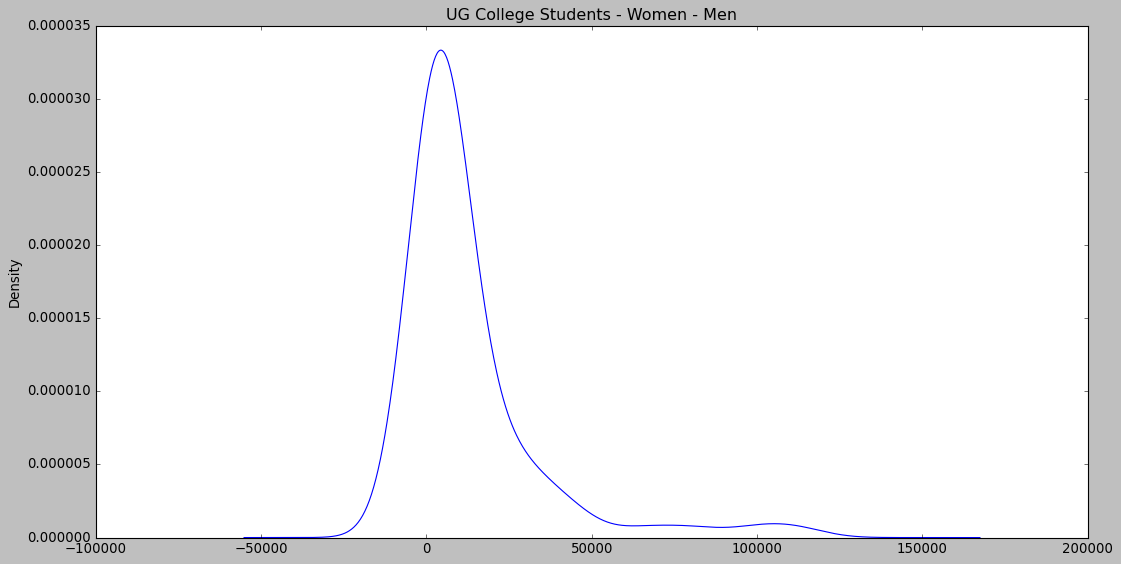

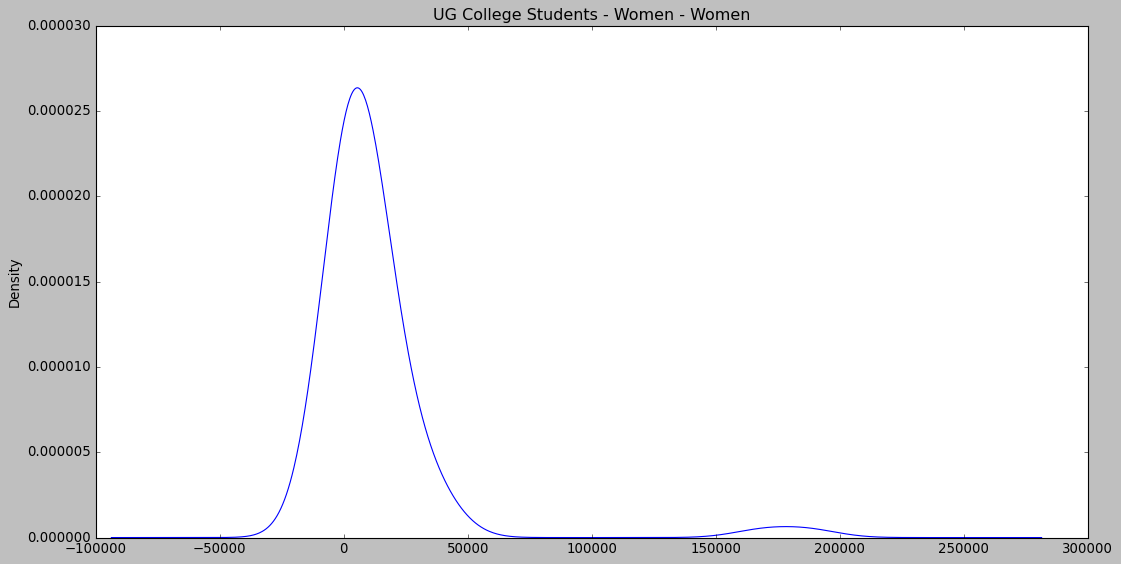

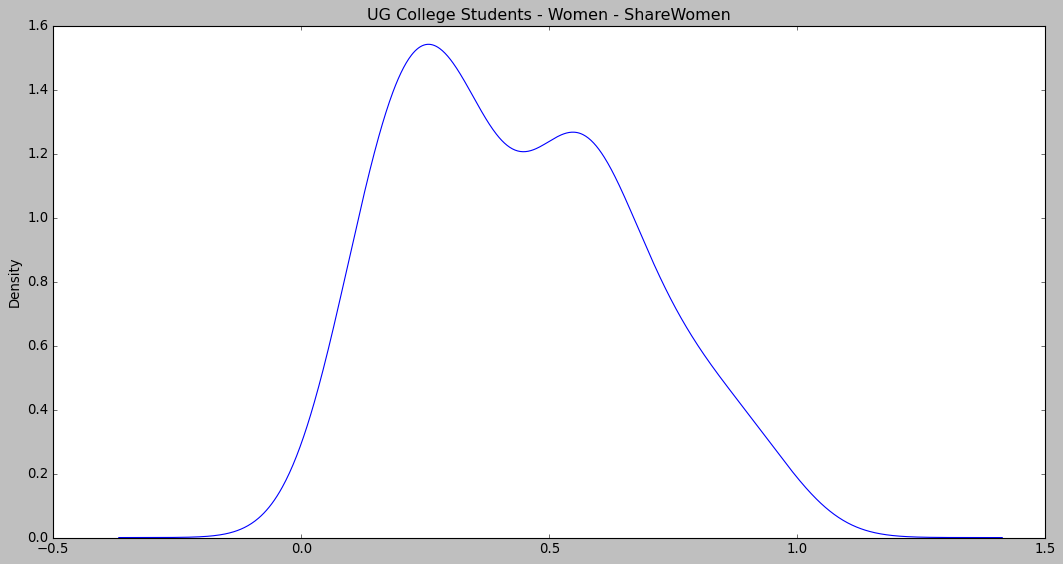

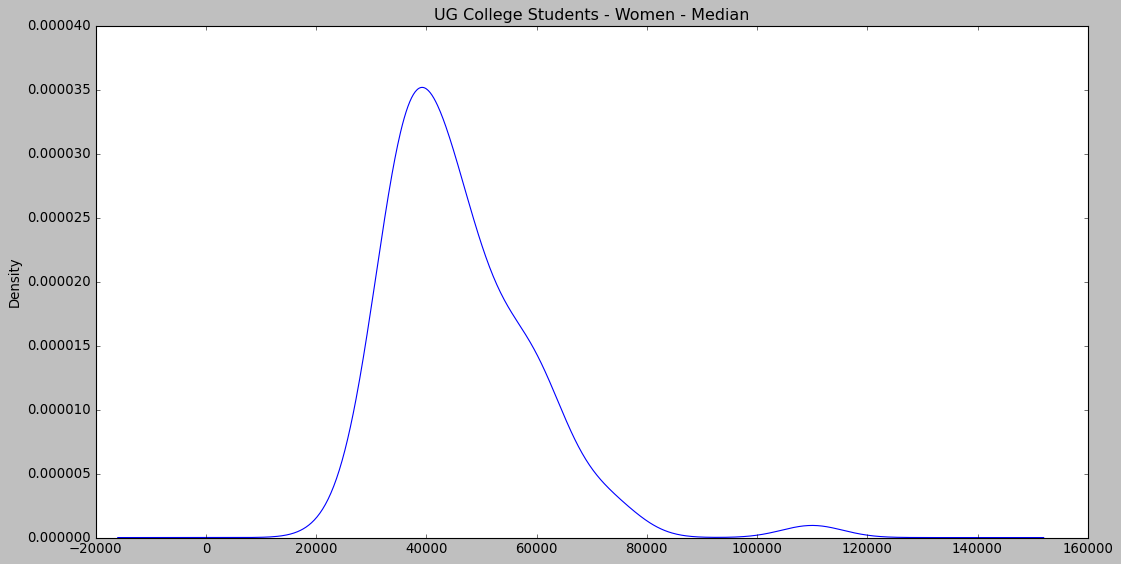

In [16]:
# distribution of major categories, recent grad students
for column in women_stem.columns:
    if women_stem[column].dtype in ['float64','int64']:
        women_stem[column].plot.kde(figsize=(16,8),title="{} - {}".format("UG College Students - Women", column))
        plt.show()

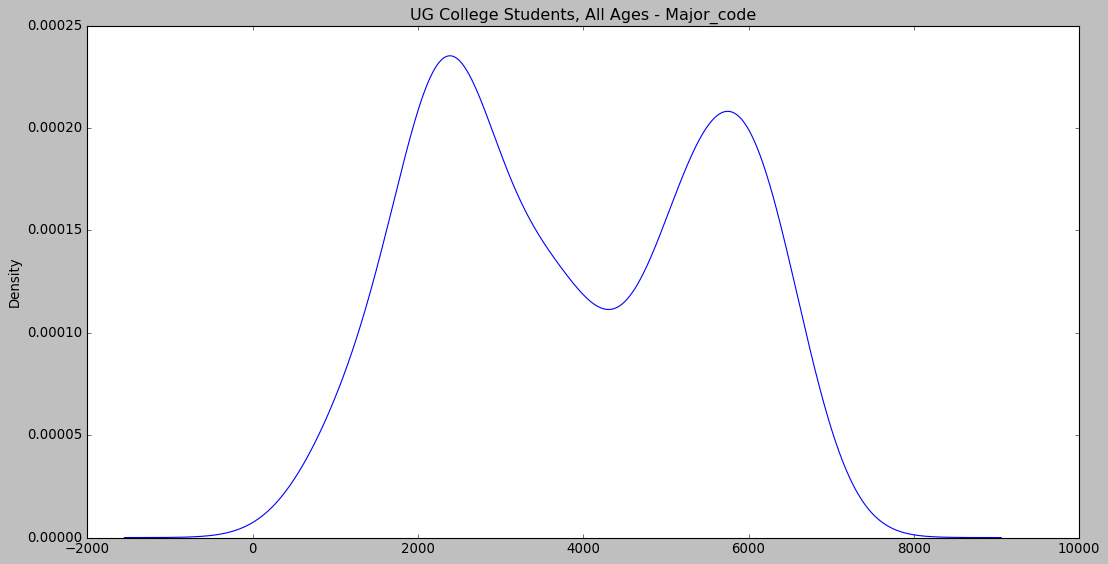

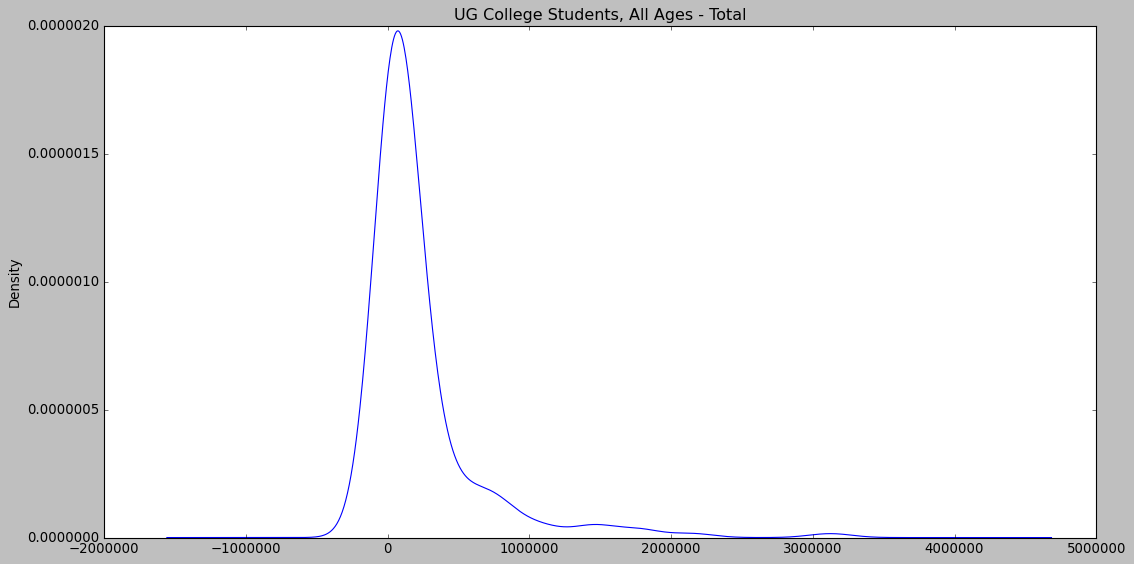

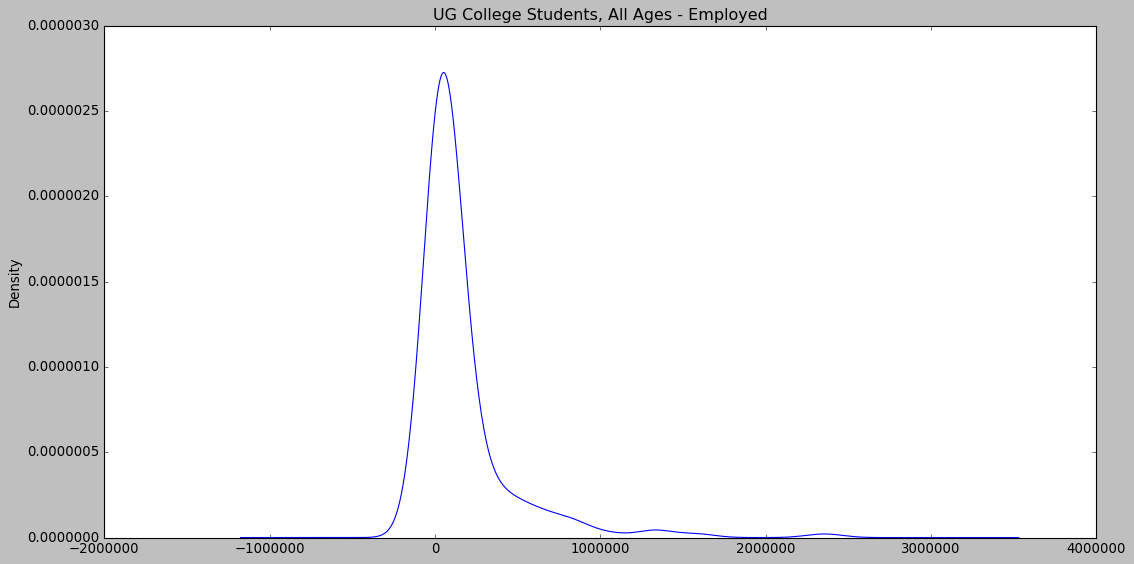

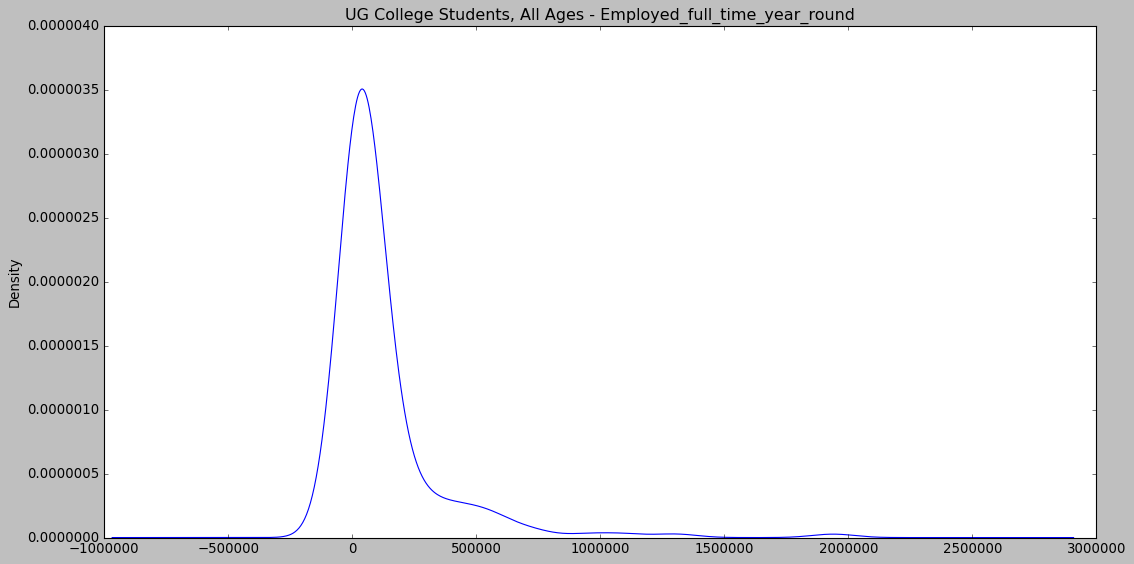

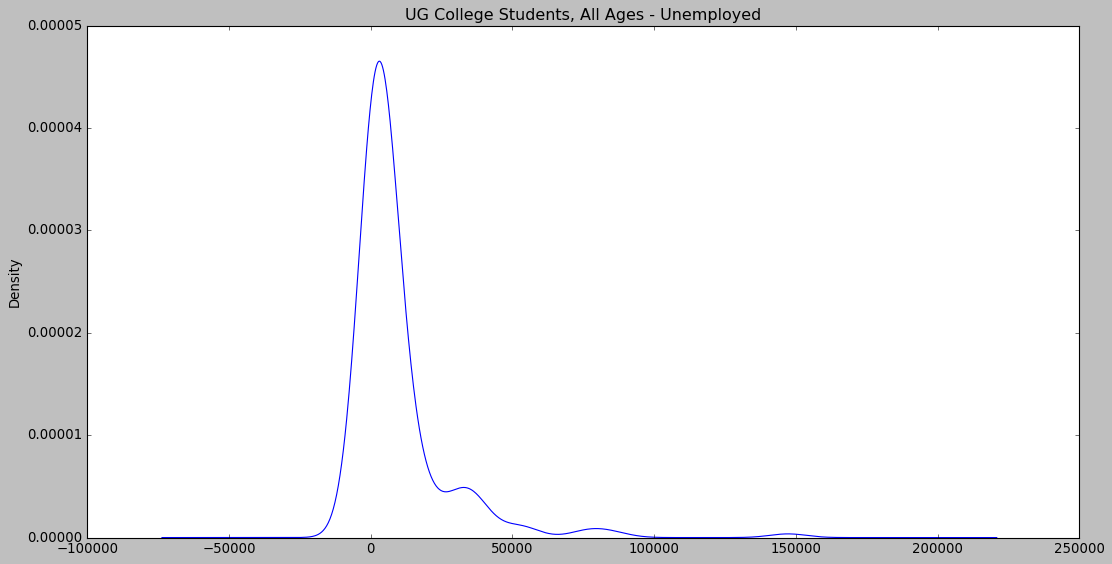

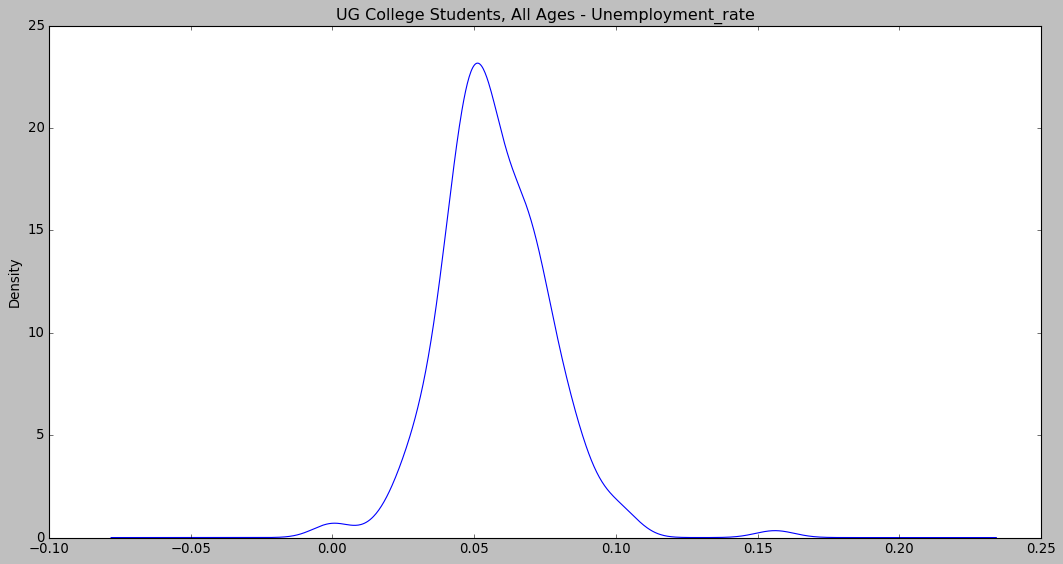

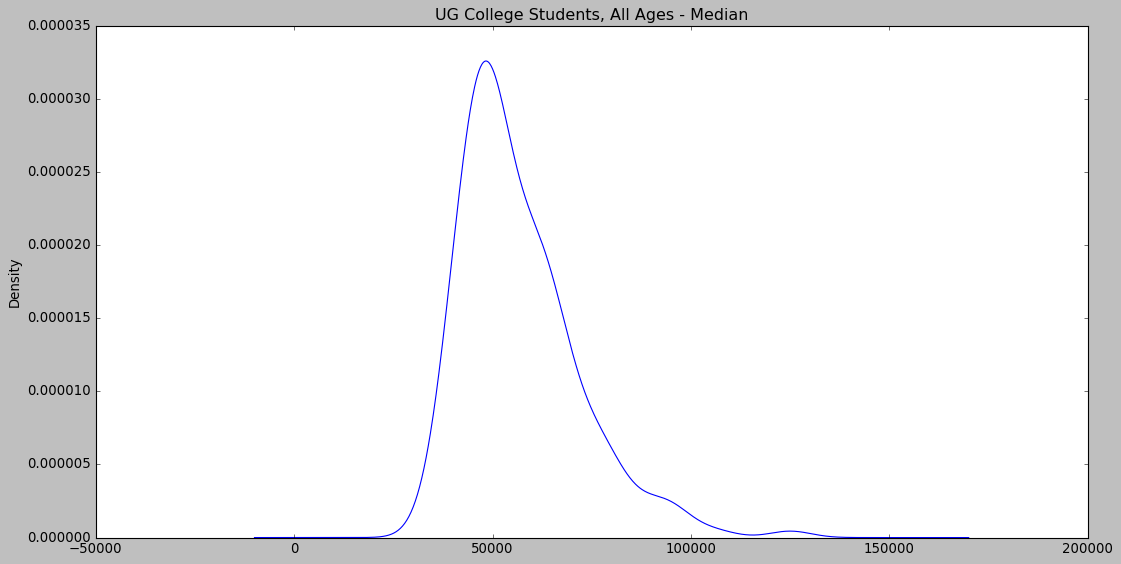

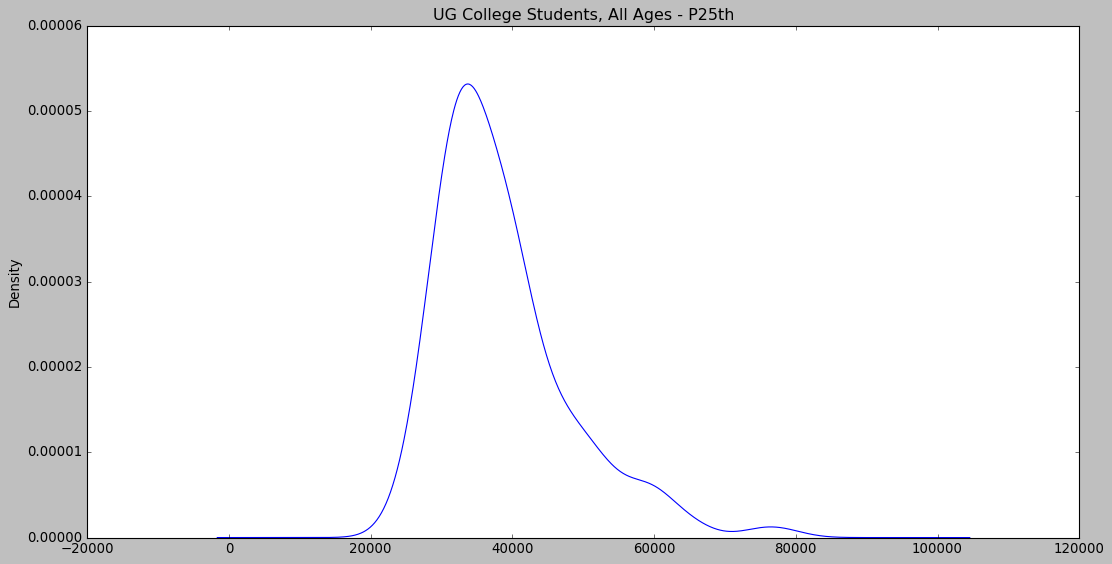

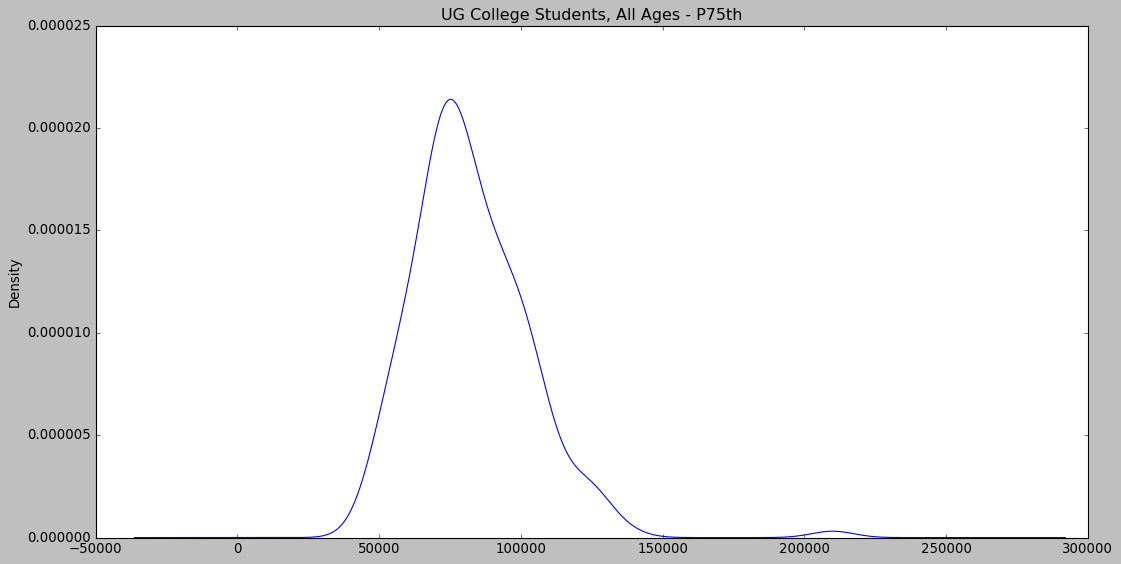

In [17]:
# distribution of major categories, recent grad students
for column in all_ages.columns:
    if all_ages[column].dtype in ['float64','int64']:
        all_ages[column].plot.kde(figsize=(16,8),title="{} - {}".format("UG College Students, All Ages", column))
        plt.show()

After exploring these sets, I decided that I want my model to:
1. Predict the likelihood that a user with a given profile will lean towards a certain major
2. Predict their post college career prospects without a graduate degree
3. Predict their post college career prospects with a graduate degree

I will start constructing the model.

In [18]:
# First, convert all object types to category types
#print(college_majors_dmgrph.dtypes.index)
for columnName, columnData in college_majors_dmgrph.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        college_majors_dmgrph[columnName] = college_majors_dmgrph[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
for columnName, columnData in college_majors.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        college_majors[columnName] = college_majors[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
for columnName, columnData in majors_list.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        majors_list[columnName] = majors_list[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
for columnName, columnData in all_ages.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        all_ages[columnName] = all_ages[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
for columnName, columnData in women_stem.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        women_stem[columnName] = women_stem[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
for columnName, columnData in recent_grads.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        recent_grads[columnName] = recent_grads[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
for columnName, columnData in grad_students.dtypes.iteritems():
    #print('Column Name: ', columnName)
    #print('Column Contents : ', columnData)
    if columnData == 'object':
        #print(columnName, "obj")
        grad_students[columnName] = grad_students[columnName].astype('category')
        #print(college_majors_dmgrph.dtypes)
print(college_majors_dmgrph.dtypes)
print(college_majors.dtypes)
print(majors_list.dtypes)
print(all_ages.dtypes)
print(women_stem.dtypes)
print(recent_grads.dtypes)
print(grad_students.dtypes)

Rank                       int64
Major_code                 int64
Major                   category
Total                    float64
Men                      float64
Women                    float64
Major_category          category
ShareWomen               float64
Sample_size                int64
Employed                   int64
Full_time                  int64
Part_time                  int64
Full_time_year_round       int64
Unemployed                 int64
Unemployment_rate        float64
Median                     int64
P25th                      int64
P75th                      int64
College_jobs               int64
Non_college_jobs           int64
Low_wage_jobs              int64
dtype: object
Rank                       int64
Major_code                 int64
Major                   category
Total                    float64
Men                      float64
Women                    float64
Major_category          category
ShareWomen               float64
Sample_size                in

#### Model and prediction development, trial 1: K-Neighbors Classifier with a Multi-Output Regressor
I want the model to learn with NLU what a user's interests are and who they are, and create a match score with results.
https://towardsdatascience.com/keyword-extraction-process-in-python-with-natural-language-processing-nlp-d769a9069d5c
https://medium.com/mlearning-ai/machine-learning-project-with-linear-regression-algorithm-b433d770fefd

UPDATE (01/16/23) - In thinking about this more, I actually think I would like to take a slightly diferent approach using the data sets that I have.

In [19]:
# organize training and testing data
cmd_X = college_majors_dmgrph.drop(["Major", "Major_category", "Major_code"], axis=1)
cmd_Y = college_majors_dmgrph[["Major_code"]]
print(cmd_X.shape, cmd_Y.shape)
cm_X = college_majors.drop(["Major", "Major_category", "Major_code"], axis=1)
cm_Y = college_majors[["Major_code"]]
print(cm_X.shape, cm_Y.shape)
aa_X = all_ages.drop(["Major", "Major_category", "Major_code"], axis=1)
aa_Y = all_ages[["Major_code"]]
print(aa_X.shape, aa_Y.shape)
ws_X = women_stem.drop(["Major", "Major_category", "Major_code"], axis=1)
ws_Y = women_stem[["Major_code"]]
print(ws_X.shape, ws_Y.shape)
rg_X = recent_grads.drop(["Major", "Major_category", "Major_code"], axis=1)
rg_Y = recent_grads[["Major_code"]]
print(rg_X.shape, rg_Y.shape)
gs_X = grad_students.drop(["Major", "Major_category", "Major_code"], axis=1)
gs_Y = grad_students[["Major_code"]]
print(gs_X.shape, gs_Y.shape)

(173, 18) (173, 1)
(173, 18) (173, 1)
(173, 8) (173, 1)
(76, 6) (76, 1)
(173, 18) (173, 1)
(173, 19) (173, 1)


In [20]:
# Split-out validation dataset
X_train_cmd, X_validation_cmd, Y_train_cmd, Y_validation_cmd = train_test_split(cmd_X, cmd_Y, test_size=0.20, random_state=1)
X_train_cm, X_validation_cm, Y_train_cm, Y_validation_cm = train_test_split(cm_X, cm_Y, test_size=0.20, random_state=1)
X_train_aa, X_validation_aa, Y_train_aa, Y_validation_aa = train_test_split(aa_X, aa_Y, test_size=0.20, random_state=1)
X_train_ws, X_validation_ws, Y_train_ws, Y_validation_ws = train_test_split(ws_X, ws_Y, test_size=0.20, random_state=1)
X_train_rg, X_validation_rg, Y_train_rg, Y_validation_rg = train_test_split(rg_X, rg_Y, test_size=0.20, random_state=1)
X_train_gs, X_validation_gs, Y_train_gs, Y_validation_gs = train_test_split(gs_X, gs_Y, test_size=0.20, random_state=1)
datasets = dict()
datasets["cmd"] = [cmd_X, cmd_Y, X_train_cmd, X_validation_cmd, Y_train_cmd, Y_validation_cmd]
datasets["cm"] = [cm_X, cm_Y, X_train_cm, X_validation_cm, Y_train_cm, Y_validation_cm]
datasets["aa"] = [aa_X, aa_Y, X_train_aa, X_validation_aa, Y_train_aa, Y_validation_aa]
datasets["ws"] = [ws_X, ws_Y, X_train_ws, X_validation_ws, Y_train_ws, Y_validation_ws]
datasets["rg"] = [rg_X, rg_Y, X_train_rg, X_validation_rg, Y_train_rg, Y_validation_rg]
datasets["gs"] = [gs_X, gs_Y, X_train_gs, X_validation_gs, Y_train_gs, Y_validation_gs]

In [21]:
# evaluate each model for each dataset in turn
data_eval = dict()
for k, v in datasets.items():
    print("=========== {} model analysis ===========".format(k).upper())
    print(v[2].shape, v[3].shape, v[4].shape, v[5].shape)
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    knn = KNeighborsClassifier()
    classifier = MultiOutputRegressor(knn, n_jobs=-1)
    classifier.fit(v[2],v[4])
    predictions = classifier.predict(v[3])
    print("Prediction: \n", predictions)
    score = classifier.score(v[3],v[5])
    print("Score: \n", score)
    report = classification_report(v[5], predictions, zero_division=1)
    print("Report: \n", report)
    data_eval[k] = [score, predictions, report]

=========== CMD MODEL ANALYSIS ===========
(138, 18) (35, 18) (138, 1) (35, 1)
Prediction: 
 [[3301]
 [4101]
 [2403]
 [1302]
 [2106]
 [1401]
 [1903]
 [1104]
 [1101]
 [1199]
 [2402]
 [2404]
 [1101]
 [1401]
 [2311]
 [1102]
 [4001]
 [2102]
 [3301]
 [2403]
 [2105]
 [1302]
 [2309]
 [2301]
 [3301]
 [1100]
 [2403]
 [1104]
 [2404]
 [1105]
 [1301]
 [2603]
 [1301]
 [2415]
 [1902]]
Score: 
 -1.261493428566058
Report: 
               precision    recall  f1-score   support

        1100       0.00      1.00      0.00       0.0
        1101       0.00      1.00      0.00       0.0
        1102       0.00      1.00      0.00       0.0
        1103       1.00      0.00      0.00       1.0
        1104       0.00      1.00      0.00       0.0
        1105       0.00      1.00      0.00       0.0
        1106       1.00      0.00      0.00       1.0
        1199       0.00      1.00      0.00       0.0
        1301       0.00      1.00      0.00       0.0
        1302       0.00      1.00      0.00    

For the datasets I used, the model I selected (K Neighbors Classifier with Multi Output Regressor) had some fascinating test result. First, I'll refer to the definitions of the metrics calculated:
- Precision: Percentage of correct positive predictions relative to total positive predictions.
- Recall: Percentage of correct positive predictions relative to total actual positives.
- F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
`F1 Score: 2 * (Precision * Recall) / (Precision + Recall)`

The macro average is the arithmetic mean of the individual class related to precision, memory, and f1 score. We use macro average scores when we need to treat all classes equally to evaluate the overall performance of the classifier against the most common class labels.

One challenge that I faced here was that there weren't many models that I could fit to to get the result I was looking for, which was mapping all the other data to a major code. For now, I'm going with the one I got to work. As I fine tune the mechanics of my model, I can open myself up to more options.

With that being said, I will be looking at the macro average.

Let me explain: I built a model for each dataset that can take general data on demographics and ecoonomic outcomes, and predict what major I'm referring too. The codes are unique to the majors. This is my "Draft 1," and I will refine the model to achive my goal of major profiling.

##### Graduate studies, and Women students datasets, macro averages
- Precision: Out of all the majors that the model predicted would have the economic outcomes and the background statistics provided, an average of **62%** of majors matched those descriptions. 
- Recall: Out of all the majors with corresponding background statistics (out of the 62%), an average of just **38%** correctly matched their major code with the statistics, given that they identified a match in the first place.
- F1 Score: With an F1 score of zero, the first assumption would be that the model does a poor job of predicting whether or not players will get drafted, from a mathematical perspective. However, the metric in this case does not tell the full story. By nature, the model's mapping into major codes at the individual level is absolute (it either matches (1) or doesn't (0)). This means that the F1 Score can only be 0 or 1 here. Therefore, I'll will disregard analyzing that metric due to instability.

##### All ages dataset, macro averages
- Precision: Out of all the majors that the model predicted would have the economic outcomes and the background statistics provided, an average of **60%** of majors matched those descriptions. 
- Recall: Out of all the majors with corresponding background statistics (out of the 60%), an average of just **40%** correctly matched their major code with the statistics, given that they identified a match in the first place.
- F1 Score: With an F1 score of zero, the first assumption would be that the model does a poor job of predicting whether or not players will get drafted, from a mathematical perspective. However, the metric in this case does not tell the full story. By nature, the model's mapping into major codes at the individual level is absolute (it either matches (1) or doesn't (0)). This means that the F1 Score can only be 0 or 1 here. Therefore, I'll will disregard analyzing that metric due to instability.

##### Recent graduates, College Major demographics and College Major datasets, macro averages
- Precision: Out of all the majors that the model predicted would have the economic outcomes and the background statistics provided, an average of **58%** of majors matched those descriptions. 
- Recall: Out of all the majors with corresponding background statistics (i.e out of the 58%), an average of just **42%** correctly matched their major code with the statistics, given that they identified a match in the first place.
- F1 Score: With an F1 score of zero, the first assumption would be that the model does a poor job of predicting whether or not players will get drafted, from a mathematical perspective. However, the metric in this case does not tell the full story. By nature, the model's mapping into major codes at the individual level is absolute (it either matches (1) or doesn't (0)). This means that the F1 Score can only be 0 or 1 here. Therefore, I'll will disregard analyzing that metric due to instability.

Overall, the model is weak. In addition to the factors mentioned above, the coefficient of determination of the predictions for the models built on each dataset is negative, meaning the the chosen model fits worse than a horizontal line. I will definitely need to try to build a new model. Maybe if I fine tune the definition of the model that I am building, and then change my approach, I can build a better model.

#### Model and prediction development, trial 2: Major Profiling
For this trial run, I have a new plan.
1. I will need to get a database of (anonymized) potential students and their profile.
2. I will need a model to take the profile as input.
3. The model needs to connect user->demographics->major.

For the dataset, I chose the following:
Students Data Analysis - https://www.kaggle.com/datasets/erqizhou/students-data-analysis?resource=download

It is a well prepared data set which contains many features that will be helpful to me as a build my model. 

I'll summarize the file documentation here:
| Label      | Type of Data | Description |
| ----------- | ----------- | ----------- |
| ID      | Basic/Demographics       | unique, stend id reference       |
| class   | Basic/Demographics        | categorical, initially students were divided into 2 classes, yet teachers suspect that of different classes students may performance significant differently.        |
| gender      | Basic/Demographics       | categorical       |
| race   | Basic/Demographics        | categorical, censored        |
| GPA      | Basic/Demographics       | real numbers, float       |
| Algebra   | Maths Scores        | real numbers, Advanced Algebra        |
| Calculus1   | Maths Scores        | real numbers        |
| Calculus2   | Maths Scores        | real numbers        |
| Statistics   | Maths Scores        | real numbers        |
| Probability   | Maths Scores        | real numbers        |
| from1   | Background        | students' home locations        |
| from2   | Background        | a probably bad indicator for preference on mathematics        |
| from3   | Background        | how did students apply for this university (undergraduate)        |
| from4   | Background        | a probably bad indicator for family background. 0 with more wealth, 4 with more poverty        |
| 0   | Indicator (y)        | one fails to apply for the graduate school, who may apply again or search jobs in the future        |
| 1   | Indicator (y)        | success, inland        |
| 2   | Indicator (y)        | success, abroad        |

In [22]:
# importing Kaggle data set of anonymized students
students = pd.read_csv("{}/ref_data/students_data.csv".format(path))
students

ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
0    1141     A    male     1  73.47       64         81         87   
1    1142     A  female     1  71.22       57         50         51   
2    1143     A  female     2  74.56       47         48         71   
3    1144     A  female     1  72.89       46         72         38   
4    1145     A  female     1  70.11       49         45         63   
..    ...   ...     ...   ...    ...      ...        ...        ...   
100  1241     A  female     1  88.34       87         83         92   
101  1242     B    male     1  89.84       98         77         95   
102  1243     B    male     1  88.82       83         80         91   
103  1244     A    male     1  86.60       92         82         91   
104  1245     A    male     1  93.71       93         97         99   

     Statistics  Probability  Measure  Functional_analysis from1 from2 from3  \
0            60           74       71                   60     A     A     A   
1            51           55       62                   61     B     A     A   
2            60           61       68                   64     C     A     A   
3            60           29       54                   51     D     A     A   
4            60           66       66                   61     E     A     A   
..          ...          ...      ...                  ...   ...   ...   ...   
100          98           93       86                   90     M     B     A   
101          98           96       88                  100     A     B     A   
102          98           93       95                   71     T     B     A   
103          99           94       82                   78     S     B     A   
104         100           97       90                   90     K     B     A   

     from4  y  
0        3  0  
1        2  0  
2        0  1  
3        0  0  
4        0  0  
..     ... ..  
100      0  1  
101      0  1  
102      0  2  
103      0  2  
104      0  2  

[105 rows x 17 columns]

In [23]:
print("Student types:")
print(students.dtypes)
print("Student Data Nulls:")
print(students.isnull().sum())

Student types:
ID                       int64
class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object
Student Data Nulls:
ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0

This data looks is pretty clean, so I can jump into exploring and interacting with it, with the end goal of building the first half of my model pretty soon. First, I do have to map the classes to numerical values for calculation reasons. Let's define the following key:
| class | Numerical Value |
| ----- | ----- |
| None, NaN | -1 |
| A | 0 |
| B | 1 |
| ... | ... |
| Z | 25 |

I also have to map gender:
| gender | Numerical Value |
| ----- | ----- |
| male | 1 |
| female | 2 |

In [24]:
# mapping
class_key = dict()
val = 0
from string import ascii_uppercase
for letter in ascii_uppercase:
    class_key[letter] = val
    val = val + 1
class_key["AA"] = 26
class_key["AB"] = 27
class_key[None] = -1
class_key[float('nan')] = -1
students['class'] = students['class'].map(class_key)
students['from1'] = students['from1'].map(class_key)
students['from2'] = students['from2'].map(class_key)
students['from3'] = students['from3'].map(class_key)
students['gender'] = students['gender'].map({"male":1, "female":2})
students

ID  class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
0    1141      0       1     1  73.47       64         81         87   
1    1142      0       2     1  71.22       57         50         51   
2    1143      0       2     2  74.56       47         48         71   
3    1144      0       2     1  72.89       46         72         38   
4    1145      0       2     1  70.11       49         45         63   
..    ...    ...     ...   ...    ...      ...        ...        ...   
100  1241      0       2     1  88.34       87         83         92   
101  1242      1       1     1  89.84       98         77         95   
102  1243      1       1     1  88.82       83         80         91   
103  1244      0       1     1  86.60       92         82         91   
104  1245      0       1     1  93.71       93         97         99   

     Statistics  Probability  Measure  Functional_analysis  from1  from2  \
0            60           74       71                   60      0      0   
1            51           55       62                   61      1      0   
2            60           61       68                   64      2      0   
3            60           29       54                   51      3      0   
4            60           66       66                   61      4      0   
..          ...          ...      ...                  ...    ...    ...   
100          98           93       86                   90     12      1   
101          98           96       88                  100      0      1   
102          98           93       95                   71     19      1   
103          99           94       82                   78     18      1   
104         100           97       90                   90     10      1   

     from3  from4  y  
0        0      3  0  
1        0      2  0  
2        0      0  1  
3        0      0  0  
4        0      0  0  
..     ...    ... ..  
100      0      0  1  
101      0      0  1  
102      0      0  2  
103      0      0  2  
104      0      0  2  

[105 rows x 17 columns]

In [25]:
print("Student Data Nulls:")
print(students.isnull().sum())

Student Data Nulls:
ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0
dtype: int64


In order to make a fair comparison, I will compare to my first method.

In [26]:
# Method 1, but improved from my mistakes:
students_X = students.drop(["y"], axis=1)
students_Y = students[["y"]]
X_train_students, X_validation_students, Y_train_students, Y_validation_students = train_test_split(students_X, students_Y, test_size=0.20, random_state=1)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    print("{}:".format(name))
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    classifier = MultiOutputRegressor(model, n_jobs=-1)
    classifier.fit(X_train_students,Y_train_students)
    predictions_stu = classifier.predict(X_validation_students)
    print("Prediction: \n", predictions_stu)
    report_stu = classification_report(Y_validation_students, predictions_stu, zero_division=1)
    print("Report: \n", report_stu)
    cv_results = cross_val_score(model, students_X, students_Y.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR:
Prediction: 
 [[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [1]
 [0]]
Report: 
               precision    recall  f1-score   support

           0       0.36      0.44      0.40         9
           1       0.40      0.33      0.36         6
           2       0.40      0.33      0.36         6

    accuracy                           0.38        21
   macro avg       0.39      0.37      0.38        21
weighted avg       0.38      0.38      0.38        21

LR: 0.497273 (0.190608)
LDA:
Prediction: 
 [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]]
Report: 
               precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.20      0.17      0.18         6
           2       0.29      0.33      0.31         6

    accuracy                           0.33        21
   macro avg       0.31      0.31      0.31        21


Now that I have a better idea of how to work with my data, my results look a lot better. I have a model with higher accuracy rates. I will apply this methodology to fix the datasets from trial 1 to make a 2 part model.

**SVM was the least inaccurate. So, that is the one to go with.**

### Final Model Development 
Now, I am going to build a new SVM model that uses the student data as input, and then returns the major that the student is likely to have pursued. To do this, I really only need the following data sets:
1. `grad_students` dataset
2. `students` dataset

This time, I need to make sure to properly prepare the `grad_students` dataset for model usage.

In [27]:
grad_students

Major_code                                       Major  \
0          5601                       CONSTRUCTION SERVICES   
1          6004           COMMERCIAL ART AND GRAPHIC DESIGN   
2          6211                      HOSPITALITY MANAGEMENT   
3          2201      COSMETOLOGY SERVICES AND CULINARY ARTS   
4          2001                  COMMUNICATION TECHNOLOGIES   
..          ...                                         ...   
168        5203                       COUNSELING PSYCHOLOGY   
169        5202                         CLINICAL PSYCHOLOGY   
170        6106     HEALTH AND MEDICAL PREPARATORY PROGRAMS   
171        2303                   SCHOOL STUDENT COUNSELING   
172        2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION   

                          Major_category  Grad_total  Grad_sample_size  \
0    Industrial Arts & Consumer Services        9173               200   
1                                   Arts       53864               882   
2                               Business       24417               437   
3    Industrial Arts & Consumer Services        5411                72   
4                Computers & Mathematics        9109               171   
..                                   ...         ...               ...   
168             Psychology & Social Work       51812               724   
169             Psychology & Social Work       22716               355   
170                               Health      114971              1766   
171                            Education       19841               260   
172                            Education       54159               841   

     Grad_employed  Grad_full_time_year_round  Grad_unemployed  \
0             7098                       6511              681   
1            40492                      29553             2482   
2            18368                      14784             1465   
3             3590                       2701              316   
4             7512                       5622              466   
..             ...                        ...              ...   
168          38468                      28808             1420   
169          16612                      12022              782   
170          78132                      58825             1732   
171          11313                       8130              613   
172          34142                      26850              582   

     Grad_unemployment_rate  Grad_median  ...  Nongrad_total  \
0                  0.087543      75000.0  ...          86062   
1                  0.057756      60000.0  ...         461977   
2                  0.073867      65000.0  ...         179335   
3                  0.080901      47000.0  ...          37575   
4                  0.058411      57000.0  ...          53819   
..                      ...          ...  ...            ...   
168                0.035600      50000.0  ...          16781   
169                0.044958      70000.0  ...           6519   
170                0.021687     135000.0  ...          26320   
171                0.051400      56000.0  ...           2232   
172                0.016761      65000.0  ...           4003   

     Nongrad_employed  Nongrad_full_time_year_round  Nongrad_unemployed  \
0               73607                         62435                3928   
1              347166                        250596               25484   
2              145597                        113579                7409   
3               29738                         23249                1661   
4               43163                         34231                3389   
..                ...                           ...                 ...   
168             12377                          8502                 835   
169              4368                          3033                 357   
170             16221                         12185                1012   
171              1328                          

In [28]:
print(grad_students.dtypes)

Major_code                         int64
Major                           category
Major_category                  category
Grad_total                         int64
Grad_sample_size                   int64
Grad_employed                      int64
Grad_full_time_year_round          int64
Grad_unemployed                    int64
Grad_unemployment_rate           float64
Grad_median                      float64
Grad_P25                           int64
Grad_P75                         float64
Nongrad_total                      int64
Nongrad_employed                   int64
Nongrad_full_time_year_round       int64
Nongrad_unemployed                 int64
Nongrad_unemployment_rate        float64
Nongrad_median                   float64
Nongrad_P25                        int64
Nongrad_P75                      float64
Grad_share                       float64
Grad_premium                     float64
dtype: object


This is the model roadmap:

`Student data -> went to grad school boolean -> recent grad employment rate (counting grad school as a form of employment) -> major`

I realize my assumption ignores the fact that employment rate can also mean full-time job rather than degree work; this is an oversimplification that I feel is okay for the scope of the project, as the data's professed focus is grad school entry.

In [29]:
grad_students["Grad_rate"] = grad_students["Grad_total"]/(grad_students["Grad_total"]+grad_students["Nongrad_total"])
# new dataset
model_maker = students.copy()
model_maker

ID  class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
0    1141      0       1     1  73.47       64         81         87   
1    1142      0       2     1  71.22       57         50         51   
2    1143      0       2     2  74.56       47         48         71   
3    1144      0       2     1  72.89       46         72         38   
4    1145      0       2     1  70.11       49         45         63   
..    ...    ...     ...   ...    ...      ...        ...        ...   
100  1241      0       2     1  88.34       87         83         92   
101  1242      1       1     1  89.84       98         77         95   
102  1243      1       1     1  88.82       83         80         91   
103  1244      0       1     1  86.60       92         82         91   
104  1245      0       1     1  93.71       93         97         99   

     Statistics  Probability  Measure  Functional_analysis  from1  from2  \
0            60           74       71                   60      0      0   
1            51           55       62                   61      1      0   
2            60           61       68                   64      2      0   
3            60           29       54                   51      3      0   
4            60           66       66                   61      4      0   
..          ...          ...      ...                  ...    ...    ...   
100          98           93       86                   90     12      1   
101          98           96       88                  100      0      1   
102          98           93       95                   71     19      1   
103          99           94       82                   78     18      1   
104         100           97       90                   90     10      1   

     from3  from4  y  
0        0      3  0  
1        0      2  0  
2        0      0  1  
3        0      0  0  
4        0      0  0  
..     ...    ... ..  
100      0      0  1  
101      0      0  1  
102      0      0  2  
103      0      0  2  
104      0      0  2  

[105 rows x 17 columns]

In [30]:
# This is my X and Y
import random
rgrad_students_X = model_maker.copy() # the student
for i in range(len(grad_students)-len(model_maker)):
    row = [1245+i, random.randint(0, 1), random.randint(1, 2), random.randint(1, 2), random.uniform(0, 100), random.randrange(0, 100, 1), random.randrange(0, 100, 1), random.randrange(0, 100, 1), random.randrange(0, 100, 1), random.randrange(0, 100, 1), random.randrange(0, 100, 1), random.randrange(0, 100, 1), random.randrange(0, 28, 1), random.randint(0, 1), random.randrange(0, 28, 1), random.randrange(0, 4, 1), random.randint(0, 1)]
    rgrad_students_X = rgrad_students_X.append(pd.Series(row, index=rgrad_students_X.columns[:len(row)]), ignore_index=True)
model_maker["Grad_rate"] = model_maker["y"].map({0:0, 1:1, 2:1}) # likelihood 
rgrad_students_X["Grad_rate"] = rgrad_students_X["y"].map({0:0, 1:1, 2:1}) # likelihood 
rgrad_students_Y = grad_students[["Major_code"]] # major code

/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_18495/2587481303.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rgrad_students_X = rgrad_students_X.append(pd.Series(row, index=rgrad_students_X.columns[:len(row)]), ignore_index=True)
/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_18495/2587481303.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rgrad_students_X = rgrad_students_X.append(pd.Series(row, index=rgrad_students_X.columns[:len(row)]), ignore_index=True)
/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_18495/2587481303.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rgrad_students_X = rgrad_students_X.append(pd.Series(row, index=rgrad_students_X.columns[:len(row)]), ignor

In [31]:
print(rgrad_students_X.dtypes)
rgrad_students_X

ID                     float64
class                  float64
gender                 float64
race                   float64
GPA                    float64
Algebra                float64
Calculus1              float64
Calculus2              float64
Statistics             float64
Probability            float64
Measure                float64
Functional_analysis    float64
from1                  float64
from2                  float64
from3                  float64
from4                  float64
y                      float64
Grad_rate                int64
dtype: object


ID  class  gender  race        GPA  Algebra  Calculus1  Calculus2  \
0    1141.0    0.0     1.0   1.0  73.470000     64.0       81.0       87.0   
1    1142.0    0.0     2.0   1.0  71.220000     57.0       50.0       51.0   
2    1143.0    0.0     2.0   2.0  74.560000     47.0       48.0       71.0   
3    1144.0    0.0     2.0   1.0  72.890000     46.0       72.0       38.0   
4    1145.0    0.0     2.0   1.0  70.110000     49.0       45.0       63.0   
..      ...    ...     ...   ...        ...      ...        ...        ...   
168  1308.0    0.0     2.0   2.0   3.282082     20.0       80.0       13.0   
169  1309.0    0.0     1.0   1.0  51.965549     73.0       27.0       77.0   
170  1310.0    0.0     1.0   1.0  71.464204     55.0       79.0       31.0   
171  1311.0    1.0     2.0   2.0   3.926244     53.0       86.0       64.0   
172  1312.0    0.0     2.0   2.0   7.731070     26.0       74.0       30.0   

     Statistics  Probability  Measure  Functional_analysis  from1  from2  \
0          60.0         74.0     71.0                 60.0    0.0    0.0   
1          51.0         55.0     62.0                 61.0    1.0    0.0   
2          60.0         61.0     68.0                 64.0    2.0    0.0   
3          60.0         29.0     54.0                 51.0    3.0    0.0   
4          60.0         66.0     66.0                 61.0    4.0    0.0   
..          ...          ...      ...                  ...    ...    ...   
168        66.0         97.0      6.0                 53.0   27.0    1.0   
169        78.0         19.0     79.0                 93.0    9.0    1.0   
170        20.0         27.0     61.0                 57.0   27.0    0.0   
171        89.0         88.0     13.0                 40.0   10.0    0.0   
172        78.0         37.0     49.0                 17.0    8.0    1.0   

     from3  from4    y  Grad_rate  
0      0.0    3.0  0.0          0  
1      0.0    2.0  0.0          0  
2      0.0    0.0  1.0          1  
3      0.0    0.0  0.0          0  
4      0.0    0.0  0.0          0  
..     ...    ...  ...        ...  
168   22.0    1.0  1.0          1  
169   16.0    1.0  0.0          0  
170    8.0    1.0  1.0          1  
171   12.0    3.0  0.0          0  
172    0.0    0.0  0.0          0  

[173 rows x 18 columns]

In [32]:
print(rgrad_students_Y.dtypes)
rgrad_students_Y["Major_code"] = rgrad_students_Y["Major_code"].astype('int64')
print(rgrad_students_Y.dtypes)
rgrad_students_Y

Major_code    int64
dtype: object
Major_code    int64
dtype: object


/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_18495/3132285721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgrad_students_Y["Major_code"] = rgrad_students_Y["Major_code"].astype('int64')


Major_code
0          5601
1          6004
2          6211
3          2201
4          2001
..          ...
168        5203
169        5202
170        6106
171        2303
172        2301

[173 rows x 1 columns]

In [34]:
X_train_rgrad, X_validation_rgrad, Y_train_rgrad, Y_validation_rgrad = train_test_split(rgrad_students_X.values, rgrad_students_Y.values, test_size=0.20, random_state=1)
kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
classifier = MultiOutputRegressor(SVC(gamma='auto'), n_jobs=-1)
classifier.fit(X_train_rgrad,Y_train_rgrad)
predictions_rg = classifier.predict(X_validation_rgrad)
print("Prediction: \n", predictions_rg)
print("Accuracy Score: \n", accuracy_score(Y_validation_rgrad, predictions_rg))
report_rg = classification_report(Y_validation_rgrad, predictions_rg, zero_division=1)
print("Report: \n", report_rg)

Prediction: 
 [[6199]
 [2305]
 [2503]
 [3202]
 [6209]
 [5505]
 [3701]
 [2503]
 [5404]
 [5505]
 [1903]
 [6211]
 [2300]
 [2105]
 [6100]
 [5404]
 [3702]
 [2105]
 [5005]
 [6203]
 [2419]
 [1104]
 [6403]
 [2414]
 [6105]
 [1104]
 [6007]
 [6107]
 [1904]
 [2310]
 [1501]
 [3607]
 [3702]
 [6004]
 [6100]]
Accuracy Score: 
 0.0
Report: 
               precision    recall  f1-score   support

        1100       1.00      0.00      0.00       1.0
        1104       0.00      1.00      0.00       0.0
        1105       1.00      0.00      0.00       1.0
        1106       1.00      0.00      0.00       1.0
        1303       1.00      0.00      0.00       1.0
        1501       0.00      1.00      0.00       0.0
        1901       1.00      0.00      0.00       1.0
        1903       0.00      1.00      0.00       0.0
        1904       0.00      1.00      0.00       0.0
        2001       1.00      0.00      0.00       1.0
        2105       0.00      1.00      0.00       0.0
        2300       0.00 

### Takeaways & Conclusion
This was mainly a project for me to have a playground in basic Machine Learning, to a project that I enjoy.